**First, I start by importing the libraries.**





In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import kstest
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV


# Data Preprocessing:

*   Load the data into a suitable data structure
*   Handle any missing values. Looking at your data, it seems there are '?' values which represent missing data. You may want to replace these with NaN values.
*  Check for any categorical variables that need to be encoded numerically for machine learning algorithms


In [ ]:
# Load the dataset
#cancer_data = pd.read_csv("/kaggle/input/cervical-cancer-dataset/cervical-cancer_csv.csv")
cancer_data = pd.read_csv("cervical-cancer_csv.csv")

In [ ]:
print(cancer_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 835 non-null    int64  
 1   Number of sexual partners           810 non-null    float64
 2   First sexual intercourse            828 non-null    float64
 3   Num of pregnancies                  779 non-null    float64
 4   Smokes                              822 non-null    float64
 5   Smokes (years)                      822 non-null    float64
 6   Smokes (packs/year)                 822 non-null    float64
 7   Hormonal Contraceptives             732 non-null    float64
 8   Hormonal Contraceptives (years)     732 non-null    float64
 9   IUD                                 723 non-null    float64
 10  IUD (years)                         723 non-null    float64
 11  STDs                                735 non-n

In [ ]:
cancer_data.head()

Age  Number of sexual partners  First sexual intercourse  \
0   18                        4.0                      15.0   
1   15                        1.0                      14.0   
2   34                        1.0                       NaN   
3   52                        5.0                      16.0   
4   46                        3.0                      21.0   

   Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
0                 1.0     0.0             0.0                  0.0   
1                 1.0     0.0             0.0                  0.0   
2                 1.0     0.0             0.0                  0.0   
3                 4.0     1.0            37.0                 37.0   
4                 4.0     0.0             0.0                  0.0   

   Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  ...  \
0                      0.0                              0.0  0.0  ...   
1                      0.0                              0.0  0.0  ...   
2                      0.0                              0.0  0.0  ...   
3                      1.0                              3.0  0.0  ...   
4                      1.0                             15.0  0.0  ...   

   STDs: Time since first diagnosis  STDs: Time since last diagnosis  \
0                               NaN                              NaN   
1                               NaN                              NaN   
2                               NaN                              NaN   
3                               NaN                              NaN   
4                               NaN                              NaN   

   Dx:Cancer  Dx:CIN  Dx:HPV  Dx  Hinselmann  Schiller  Cytology  Biopsy  
0          0       0       0   0           0         0         0       0  
1          0       0       0   0           0         0         0       0  
2          0       0       0   0           0         0         0       0  
3          1       0       1   0           0         0         0       0  
4          0       0       0   0           0         0         0       0  

[5 rows x 36 columns]

Missing data is filled with ?, we convert them to a nominal value

In [ ]:
# "?" Replacing missing values ​​represented by the sign with NaN
cancer_data.replace("?", np.nan, inplace=True)

In [ ]:
# First, I start by checking the number and percentage of missing values
missing_values_count = cancer_data.isnull().sum()
missing_values_percentage = (missing_values_count / len(cancer_data)) * 100
missing_values_summary = pd.DataFrame({'Number of Missing Values': missing_values_count, 'Percentage of Missing Values': missing_values_percentage})
print("Summary of Missing Values:")
print(missing_values_summary)

Summary of Missing Values:
                                    Number of Missing Values  \
Age                                                        0   
Number of sexual partners                                 25   
First sexual intercourse                                   7   
Num of pregnancies                                        56   
Smokes                                                    13   
Smokes (years)                                            13   
Smokes (packs/year)                                       13   
Hormonal Contraceptives                                  103   
Hormonal Contraceptives (years)                          103   
IUD                                                      112   
IUD (years)                                              112   
STDs                                                     100   
STDs (number)                                            100   
STDs:condylomatosis                                      100   
STDs:cervical

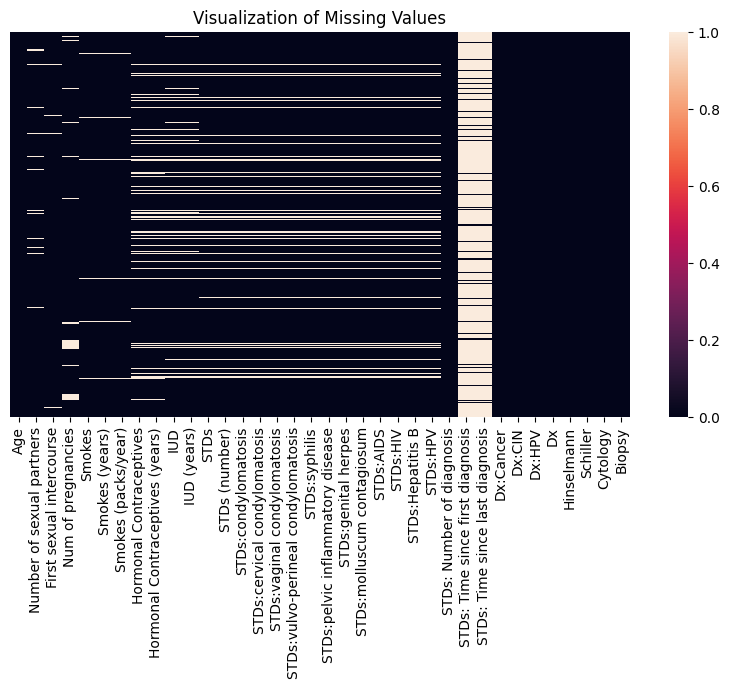

In [ ]:
#let's visualize this
plt.figure(figsize=(10,5))
sns.heatmap(cancer_data.isnull(),yticklabels= False)
plt.title("Visualization of Missing Values")
plt.show()

**I drop STDs: Time since first diagnosis and STDs: Time since last diagnosis variables because there are too many missing values.**

In [ ]:
cancer_data= cancer_data.drop(columns=['STDs: Time since first diagnosis','STDs: Time since last diagnosis'])

The next step is to **fill in the missing values**.


  I was going to use Iterative Imputer, but I didn't need it, the line of efficiency was not very large and the median mode and filling method was sufficient for my machine learning methods and I achieved the accuracy I wanted.

In [ ]:
numerical_columns = cancer_data.select_dtypes(include=np.number).columns
categorical_columns = cancer_data.select_dtypes(include='object').columns

# Filling missing values in numeric variables with median
for column in numerical_columns:
    median_value = cancer_data[column].median()
    cancer_data.loc[:, column] = cancer_data[column].fillna(median_value)

# Filling missing values in categorical variables with mode
for column in categorical_columns:
    mode_value = cancer_data[column].mode()[0]
    cancer_data.loc[:, column] = cancer_data[column].fillna(mode_value)

# Finally, convert all data to numeric values
cancer_data = cancer_data.apply(pd.to_numeric)

In [ ]:
#checking for missing values
missing_values_count = cancer_data.isnull().sum()
print("Eksik Değerlerin Sayısı:", missing_values_count)

Eksik Değerlerin Sayısı: Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV       

****Well, now that our data is cleaned, we can get to know our data set more closely****

# Exploratory Data Analysis — EDA


*   Explore the distribution of each feature.
*   Analyze correlations between features and the target variable (cervical cancer diagnosis).
*   Visualize relationships between variables to understand the data better


In [ ]:
cancer_data.describe()

Age  Number of sexual partners  First sexual intercourse  \
count  835.000000                 835.000000                835.000000   
mean    27.023952                   2.535329                 17.020359   
std      8.482986                   1.654044                  2.805154   
min     13.000000                   1.000000                 10.000000   
25%     21.000000                   2.000000                 15.000000   
50%     26.000000                   2.000000                 17.000000   
75%     32.000000                   3.000000                 18.000000   
max     84.000000                  28.000000                 32.000000   

       Num of pregnancies      Smokes  Smokes (years)  Smokes (packs/year)  \
count          835.000000  835.000000      835.000000           835.000000   
mean             2.283832    0.147305        1.234329             0.458571   
std              1.408152    0.354623        4.111264             2.239363   
min              0.000000    0.000000        0.000000             0.000000   
25%              1.000000    0.000000        0.000000             0.000000   
50%              2.000000    0.000000        0.000000             0.000000   
75%              3.000000    0.000000        0.000000             0.000000   
max             11.000000    1.000000       37.000000            37.000000   

       Hormonal Contraceptives  Hormonal Contraceptives (years)         IUD  \
count               835.000000                       835.000000  835.000000   
mean                  0.694611                         2.080520    0.099401   
std                   0.460848                         3.601364    0.299379   
min                   0.000000                         0.000000    0.000000   
25%                   0.000000                         0.000000    0.000000   
50%                   1.000000                         0.500000    0.000000   
75%                   1.000000                         3.000000    0.000000   
max                   1.000000                        30.000000    1.000000   

       ...    STDs:HPV  STDs: Number of diagnosis   Dx:Cancer      Dx:CIN  \
count  ...  835.000000                 835.000000  835.000000  835.000000   
mean   ...    0.002395                   0.089820    0.021557    0.010778   
std    ...    0.048912                   0.306335    0.145319    0.103320   
min    ...    0.000000                   0.000000    0.000000    0.000000   
25%    ...    0.000000                   0.000000    0.000000    0.000000   
50%    ...    0.000000                   0.000000    0.000000    0.000000   
75%    ...    0.000000                   0.000000    0.000000    0.000000   
max    ...    1.000000                   3.000000    1.000000    1.000000   

           Dx:HPV          Dx  Hinselmann    Schiller    Cytology      Biopsy  
count  835.000000  835.000000  835.000000  835.000000  835.000000  835.000000  
mean     0.021557    0.028743    0.041916    0.087425    0.051497    0.064671  
std      0.145319    0.167182    0.200518    0.282626    0.221142    0.246091  
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000  

[8 rows x 34 columns]

The standard deviation of the age parameter gave a high value, so we will need to look for outliers in the following steps.

In [ ]:
cancer_data= cancer_data.drop(columns=['STDs:cervical condylomatosis','STDs:AIDS'])

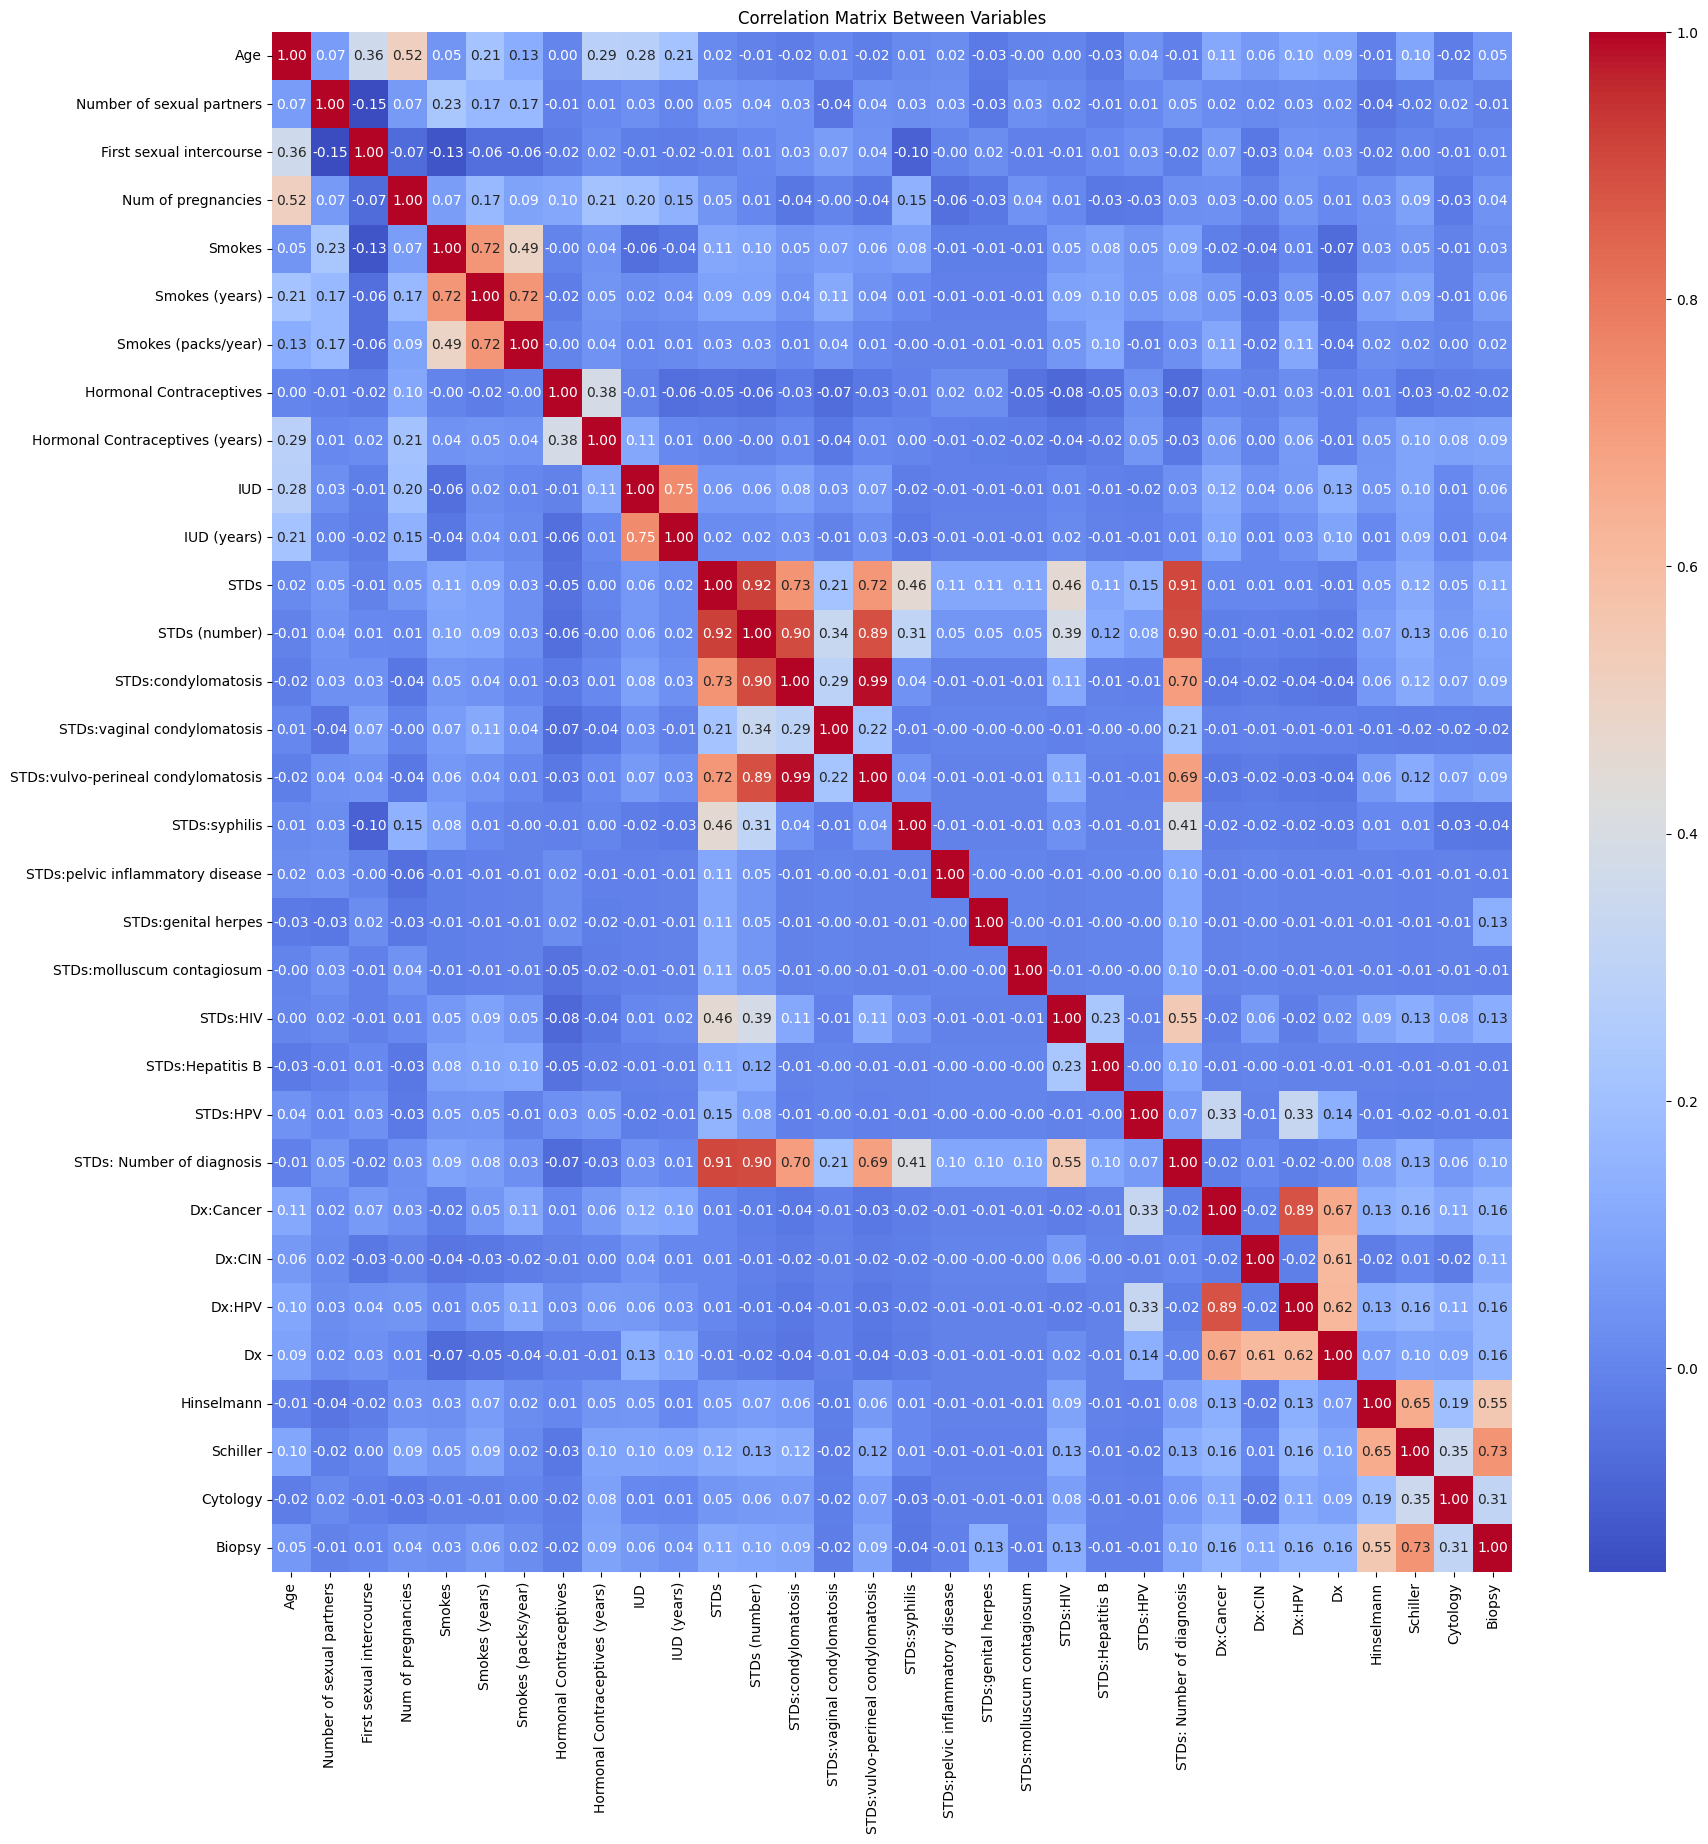

In [ ]:
# When examining relationships between variables, I will use the correlation matrix
# Creating a correlation table to be used to fill in missing values
correlation_matrix = cancer_data.corr()

# I visualize the correlation matrix so I can analyze it in more detail
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# with annot=true parameter, numerical values ​​are added to the cells of the matrix.
# cmap parameter determines the color gradation of the correlation coefficients
plt.title("Correlation Matrix Between Variables")
plt.show()

This matrix shows the correlation or influence between all features in the dataset. Values ​​closest to 1 (red) indicate almost perfect correlation, values ​​closest to 0 (blue) indicate almost no correlation, and negative values ​​(darkest) indicate inverse correlation.


As you can see, there is a diagonal strip of values ​​that are colored red and appear to be perfectly correlated, because the same features are aligned on the x and y axes, and the same features are perfectly correlated with each other.

Age and number of pregnancies are related, with older women having more pregnancies on average.

There is also a high correlation between cigarettes, cigarettes (year) and cigarettes (packs/year), as long-term smokers also smoke more packs per year.

The STD column is highly associated with STDs: condylomatosis suggests that this is a common STD

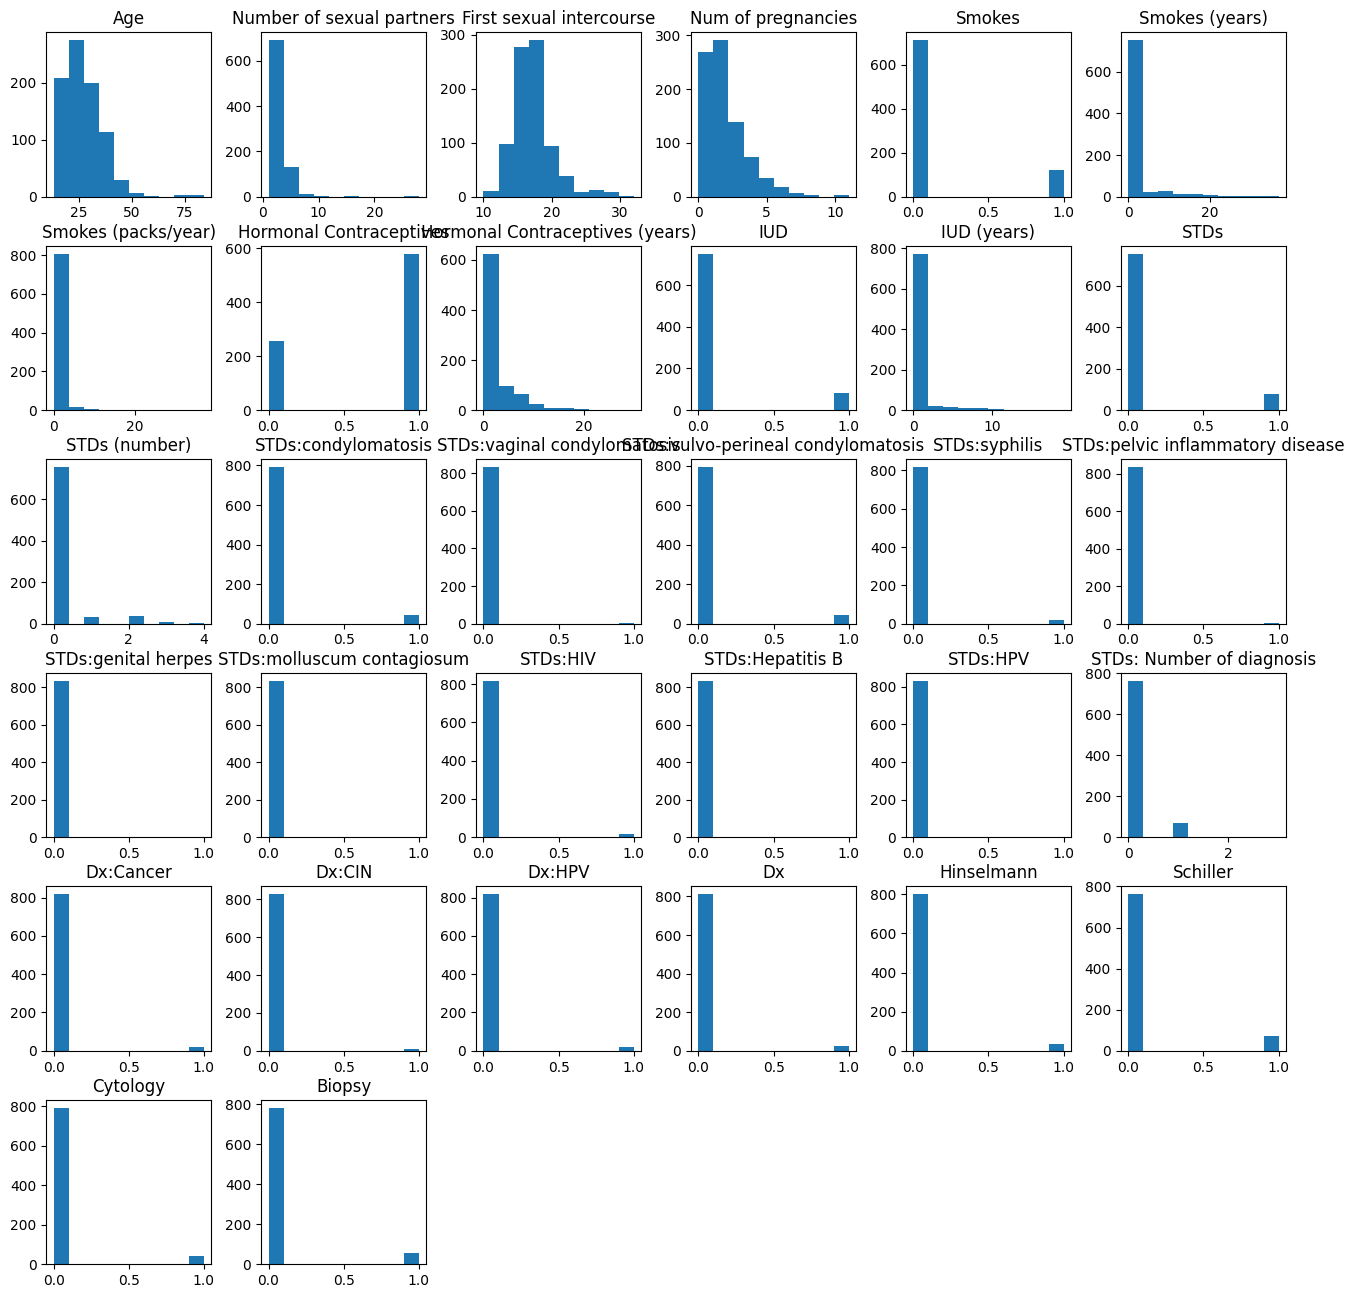

In [ ]:
cancer_data.hist(grid=False,
             figsize=(16,16))

plt.show()

#Let's look at the distribution of the parameters within themselves

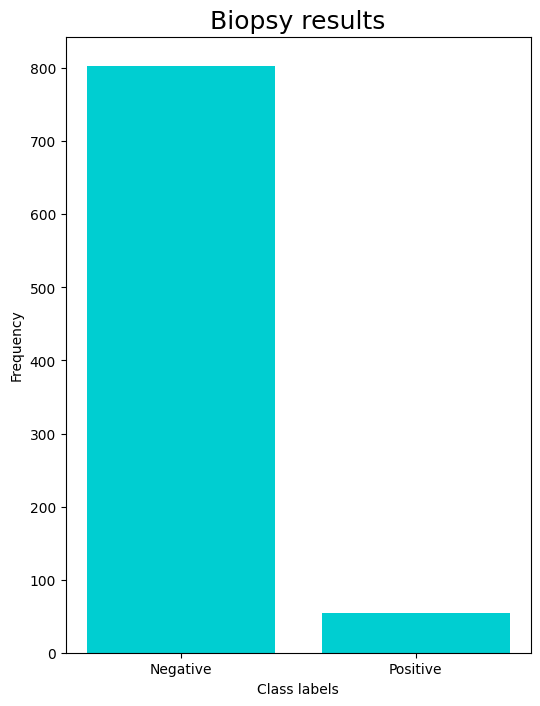

In [ ]:
plt.figure(figsize = (6, 8))
plt.title('Biopsy results', fontsize = 18)
plt.bar(['Negative', 'Positive'], [803,55], color = 'darkturquoise')
plt.xlabel('Class labels')
plt.ylabel('Frequency')
plt.show()

#Let's see our unbalanced data set visually

In [ ]:
#I wanted to evaluate patients diagnosed with cancer separately.

# Separating groups with positive and negative biopsy results
biopsy_positive = cancer_data[cancer_data['Biopsy'] == 1]
biopsy_negative = cancer_data[cancer_data['Biopsy'] == 0]


biopsy_positive_summary = biopsy_positive.describe()
print(biopsy_positive_summary)

             Age  Number of sexual partners  First sexual intercourse  \
count  54.000000                  54.000000                 54.000000   
mean   28.777778                   2.481481                 17.111111   
std     8.905514                   1.269984                  2.603819   
min    16.000000                   1.000000                 11.000000   
25%    21.000000                   2.000000                 16.000000   
50%    28.000000                   2.000000                 17.000000   
75%    34.750000                   3.000000                 18.000000   
max    52.000000                   6.000000                 29.000000   

       Num of pregnancies     Smokes  Smokes (years)  Smokes (packs/year)  \
count           54.000000  54.000000       54.000000            54.000000   
mean             2.500000   0.185185        2.190129             0.665059   
std              1.240055   0.392095        6.273011             2.283468   
min              0.000000   0.0000

Age: The mean age of these patients is 28.58 years with a standard deviation of 8.74. The youngest patient is 16 years old, while the oldest patient is 50 years old.

Number of Sexual Partners: The mean number of sexual partners is 2.51 with a standard deviation of 1.27. While there are patients with at least 1 sexual partner, there are also patients with a maximum of 6 sexual partners.

Smoking Habit: 18.18% of these patients smoke. On average, patients who smoked smoked for 2.15 years and consumed an average of 0.65 packs of cigarettes per year.

Hormonal Contraceptive Use and IUD Use: Most of these patients (65.45%) used hormonal contraceptives. Additionally, 16.36% used IUD.

Cancer Diagnosis and Other Diagnoses: 10.91% of these patients were diagnosed with cancer. Additionally, 12.73% had HPV virus and 10.91% had other HPV-related diagnoses.

***This is the data on sick people whose biopsy results are positive. Now let's look at the differences between people who are sick and those who are not and try to analyze them..***

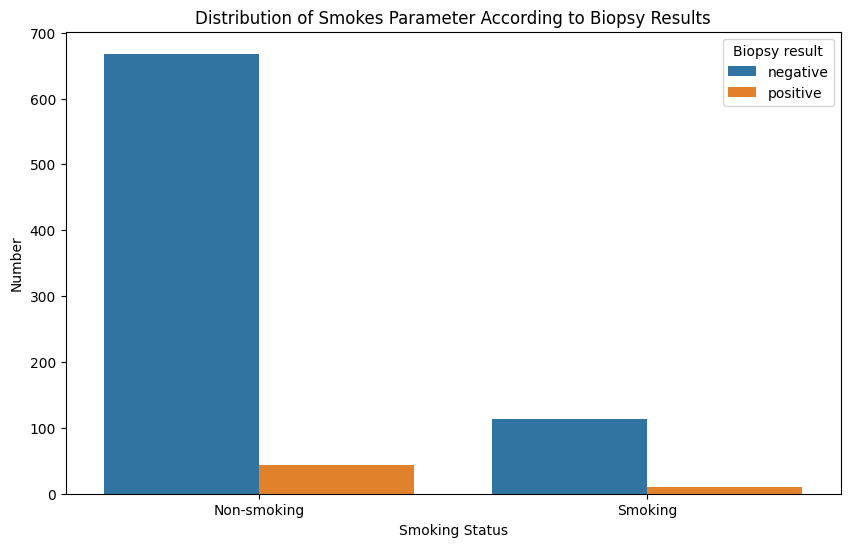

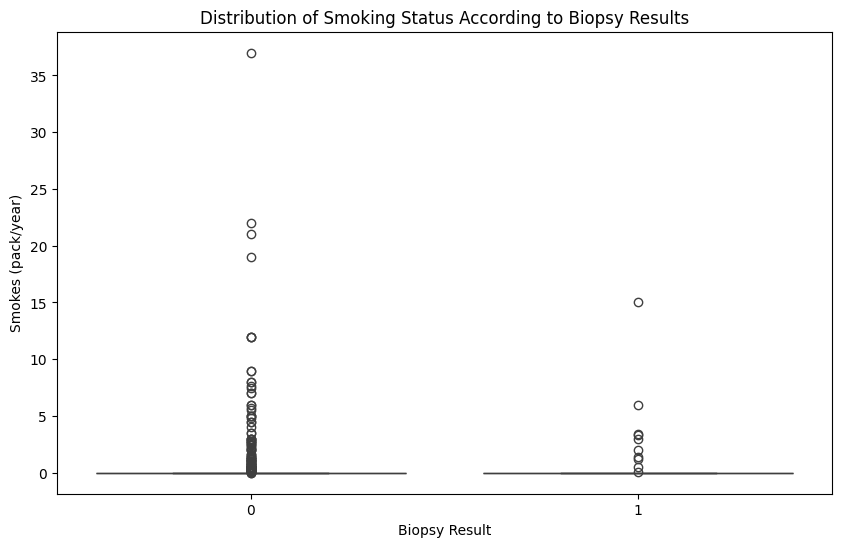

Smoking Status Statistics of the Group with Positive Biopsy Result:
count    54.000000
mean      0.665059
std       2.283468
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max      15.000000
Name: Smokes (packs/year), dtype: float64

Biopsy Result Negative Group Smoking Status Statistics:
count    781.000000
mean       0.444294
std        2.237066
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       37.000000
Name: Smokes (packs/year), dtype: float64


In [ ]:
# Smokes parameter distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Smokes', hue='Biopsy', data=cancer_data)
plt.title('Distribution of Smokes Parameter According to Biopsy Results')
plt.xlabel('Smoking Status')
plt.ylabel('Number')
plt.xticks([0, 1], ['Non-smoking', 'Smoking'])
plt.legend(title='Biopsy result', labels=['negative', 'positive'])
plt.show()

# Visualization of the relationship between the Smokes parameter and the biopsy result
plt.figure(figsize=(10, 6))
sns.boxplot(x='Biopsy', y='Smokes (packs/year)', data=cancer_data)
plt.title('Distribution of Smoking Status According to Biopsy Results')
plt.xlabel('Biopsy Result')
plt.ylabel('Smokes (pack/year)')
plt.show()

# Smokes parameter statistical summaries of groups with positive and negative biopsy results
biopsy_positive_smokes_summary = biopsy_positive['Smokes (packs/year)'].describe()
biopsy_negative_smokes_summary = biopsy_negative['Smokes (packs/year)'].describe()

print("Smoking Status Statistics of the Group with Positive Biopsy Result:")
print(biopsy_positive_smokes_summary)
print("\nBiopsy Result Negative Group Smoking Status Statistics:")
print(biopsy_negative_smokes_summary)



The average smoking status value of the participants in the group with a positive biopsy result was higher than that of the participants in the group with a negative biopsy result. This may suggest that smoking may increase the likelihood of a positive biopsy result.


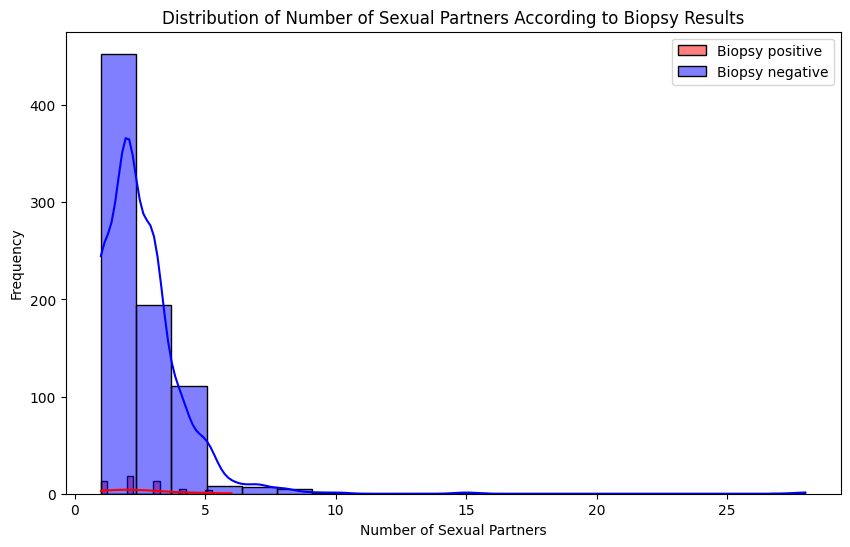

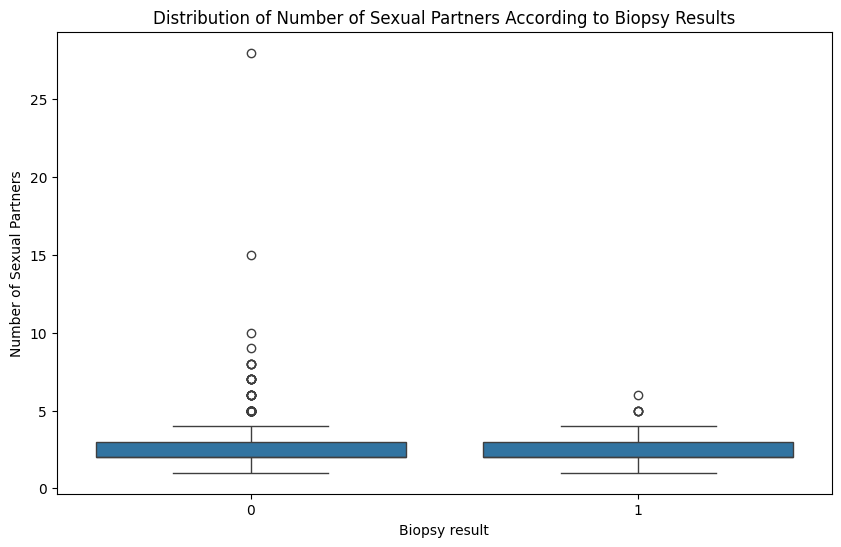

Statistics on the Number of Sexual Partners in the Group with Positive Biopsy Result:
count    54.000000
mean      2.481481
std       1.269984
min       1.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       6.000000
Name: Number of sexual partners, dtype: float64

Statistics of the Number of Sexual Partners in the Group with Negative Biopsy Result:
count    781.000000
mean       2.539052
std        1.677933
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       28.000000
Name: Number of sexual partners, dtype: float64


In [ ]:
# Distribution of the number of sexual partners
plt.figure(figsize=(10, 6))
sns.histplot(biopsy_positive['Number of sexual partners'], bins=20, kde=True, color='red', label='Biopsy positive')
sns.histplot(biopsy_negative['Number of sexual partners'], bins=20, kde=True, color='blue', label='Biopsy negative')
plt.title('Distribution of Number of Sexual Partners According to Biopsy Results')
plt.xlabel('Number of Sexual Partners')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Visualization of the relationship between the number of sexual partners and the biopsy result
plt.figure(figsize=(10, 6))
sns.boxplot(x='Biopsy', y='Number of sexual partners', data=cancer_data)
plt.title('Distribution of Number of Sexual Partners According to Biopsy Results')
plt.xlabel('Biopsy result')
plt.ylabel('Number of Sexual Partners')
plt.show()

# Statistical summaries of the number of sexual partners of the groups with positive and negative biopsy results
biopsy_positive_partner_summary = biopsy_positive['Number of sexual partners'].describe()
biopsy_negative_partner_summary = biopsy_negative['Number of sexual partners'].describe()

print("Statistics on the Number of Sexual Partners in the Group with Positive Biopsy Result:")
print(biopsy_positive_partner_summary)
print("\nStatistics of the Number of Sexual Partners in the Group with Negative Biopsy Result:")
print(biopsy_negative_partner_summary)


There does not seem to be a big difference in the Number of Sexual Partners. It seems difficult to make an inference from here.

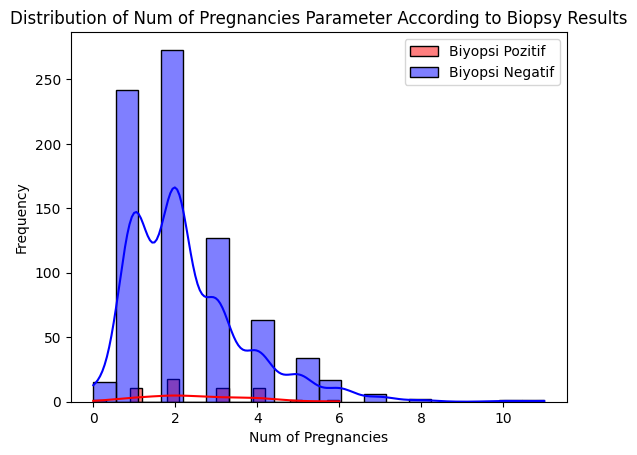

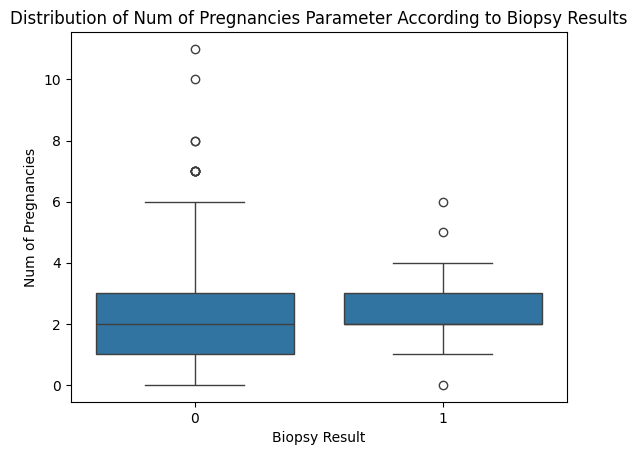

Positive Biopsy Result Group Num of Pregnancies Statistics:
count    54.000000
mean      2.500000
std       1.240055
min       0.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       6.000000
Name: Num of pregnancies, dtype: float64

Biopsy Result Negative Group Num of Pregnancies Statistics:
count    781.000000
mean       2.268886
std        1.418528
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       11.000000
Name: Num of pregnancies, dtype: float64


In [ ]:
# Distribution of the Num of pregnancies parameterplt.figure(figsize=(10, 6))
sns.histplot(biopsy_positive['Num of pregnancies'], bins=20, kde=True, color='red', label='Biyopsi Pozitif')
sns.histplot(biopsy_negative['Num of pregnancies'], bins=20, kde=True, color='blue', label='Biyopsi Negatif')
plt.title('Distribution of Num of Pregnancies Parameter According to Biopsy Results')
plt.xlabel('Num of Pregnancies')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Visualization of the relationship between the Num of pregnancies parameter and the biopsy resultplt.figure(figsize=(10, 6))
sns.boxplot(x='Biopsy', y='Num of pregnancies', data=cancer_data)
plt.title('Distribution of Num of Pregnancies Parameter According to Biopsy Results')
plt.xlabel('Biopsy Result')
plt.ylabel('Num of Pregnancies')
plt.show()

# Statistical summaries of Num of pregnancies parameter of groups with positive and negative biopsy results
biopsy_positive_pregnancies_summary = biopsy_positive['Num of pregnancies'].describe()
biopsy_negative_pregnancies_summary = biopsy_negative['Num of pregnancies'].describe()

print("Positive Biopsy Result Group Num of Pregnancies Statistics:")
print(biopsy_positive_pregnancies_summary)
print("\nBiopsy Result Negative Group Num of Pregnancies Statistics:")
print(biopsy_negative_pregnancies_summary)

There is **no significant difference** in the mean values ​​in terms of the number of pregnancies between the two groups. However, the average number of pregnancies was slightly higher in the group with positive biopsy results. This indicates that the number of pregnancies may have an impact on the biopsy result.

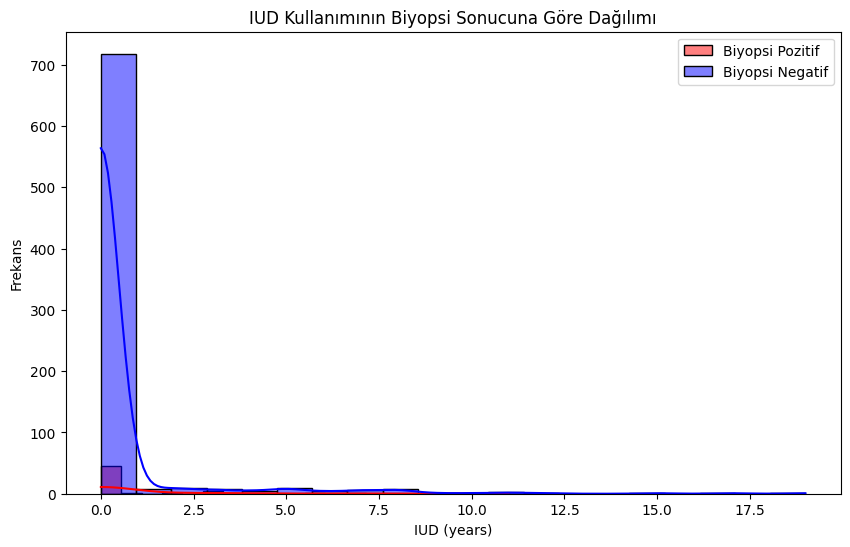

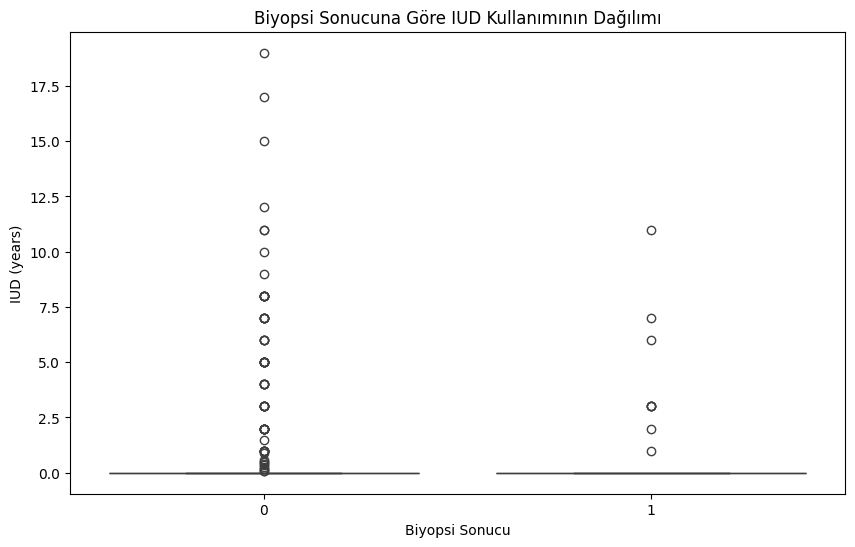

IUD Usage Statistics in the Group with Positive Biopsy Results:
count    54.000000
mean      0.722222
std       2.031977
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max      11.000000
Name: IUD (years), dtype: float64

Biopsy Result Negative Group IUD Usage Statistics:
count    781.000000
mean       0.438502
std        1.823334
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       19.000000
Name: IUD (years), dtype: float64


In [ ]:
# Distribution of IUD use
plt.figure(figsize=(10, 6))
sns.histplot(biopsy_positive['IUD (years)'], bins=20, kde=True, color='red', label='Biyopsi Pozitif')
sns.histplot(biopsy_negative['IUD (years)'], bins=20, kde=True, color='blue', label='Biyopsi Negatif')
plt.title('IUD Kullanımının Biyopsi Sonucuna Göre Dağılımı')
plt.xlabel('IUD (years)')
plt.ylabel('Frekans')
plt.legend()
plt.show()

# Visualization of the relationship between IUD use and biopsy result
plt.figure(figsize=(10, 6))
sns.boxplot(x='Biopsy', y='IUD (years)', data=cancer_data)
plt.title('Biyopsi Sonucuna Göre IUD Kullanımının Dağılımı')
plt.xlabel('Biyopsi Sonucu')
plt.ylabel('IUD (years)')
plt.show()

# Statistical summaries of IUD use in groups with positive and negative biopsy results
biopsy_positive_iud_summary = biopsy_positive['IUD (years)'].describe()
biopsy_negative_iud_summary = biopsy_negative['IUD (years)'].describe()

print("IUD Usage Statistics in the Group with Positive Biopsy Results:")
print(biopsy_positive_iud_summary)
print("\nBiopsy Result Negative Group IUD Usage Statistics:")
print(biopsy_negative_iud_summary)

While the average IUD usage duration of people in the group with a positive biopsy result was approximately 0.71 years (approximately 8.5 months), the average IUD usage duration of people in the group with a negative biopsy result was approximately 0.43 years (approximately 5 months).

However, looking at the standard deviation values, we can see that the duration of IUD use was quite variable in both groups. In particular, the standard deviation is higher in the group with a positive biopsy result, indicating that the duration of IUD use has a wider range in this group.

Additionally, the maximum duration of IUD use was 11 years in the positive group and 19 years in the negative group. This indicates that IUD use was associated with longer durations in the negative group.

Based on these data, it can be said that there are significant differences in IUD use between the group with a positive biopsy result and the group with a negative biopsy result. However, further research into the causes and clinical significance of these differences may be required.

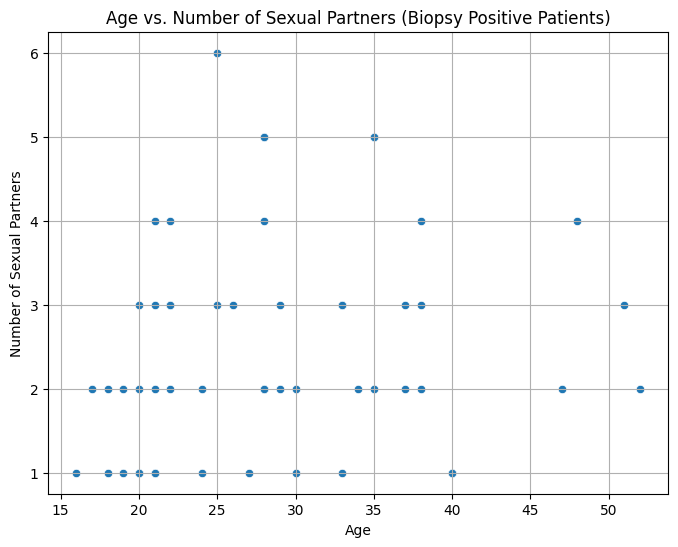

Pearson Korelasyon Katsayısı (Biopsy Positive Patients): 0.17479791466603808
p-değeri (Biopsy Positive Patients): 0.20615806853763977


In [ ]:
# Select relevant columns from the dataset of patients with biopsy value 1
age_positive = biopsy_positive['Age']
sexual_partners_positive = biopsy_positive['Number of sexual partners']

# Draw a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=age_positive, y=sexual_partners_positive)
plt.title('Age vs. Number of Sexual Partners (Biopsy Positive Patients)')
plt.xlabel('Age')
plt.ylabel('Number of Sexual Partners')
plt.grid(True)
plt.show()

# Calculating the correlation coefficient
correlation_coefficient_positive, p_value_positive = pearsonr(age_positive, sexual_partners_positive)
print("Pearson Korelasyon Katsayısı (Biopsy Positive Patients):", correlation_coefficient_positive)
print("p-değeri (Biopsy Positive Patients):", p_value_positive)


***Now it's time to detect outliers***

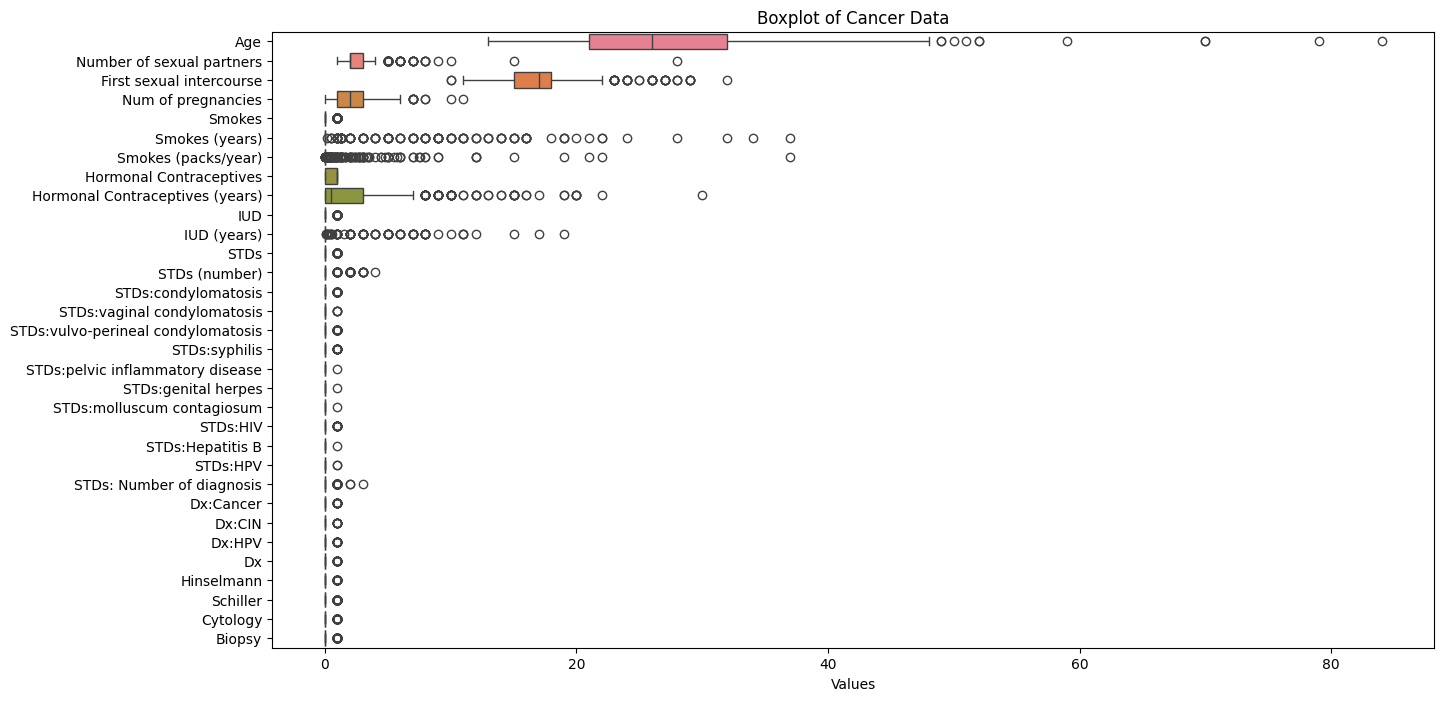

In [ ]:
#Let's check for outliers with #box plot
plt.figure(figsize=(15, 8))
sns.boxplot(data=cancer_data, orient="h")
plt.title("Boxplot of Cancer Data")
plt.xlabel("Values")
plt.show()

In [ ]:
def detect_outliers(df, columns, method='zscore', threshold=3):
    outliers = {}
    for column in columns:
        if column not in df.columns:
            print(f"Column '{column}' does not exist in the DataFrame.")
            continue
        if method == 'zscore':
            z_scores = (df[column] - df[column].mean()) / df[column].std()
            outliers[column] = df[(z_scores > threshold) | (z_scores < -threshold)][column]
        elif method == 'iqr':
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers

# Check column names
print("Available columns:", cancer_data.columns)

# Detect outliers
outliers = detect_outliers(cancer_data, numerical_columns, method='zscore', threshold=3)
print(outliers)

Available columns: Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Cytology', 'Biopsy'],
      dtype='object')
Column 'STDs:cervical condylomatosis' does not exist in the DataFrame.
Column 'STDs:AIDS' does not exist in the DataFrame.
{'Age': 631    59
646    79
647    84
655    70
661    70
Name: Age, dtype: int64, 'Number of sexual partners': 185    15.0
189     8.0
192    10.0
256     8.0
4

In [ ]:
print(cancer_data['Age'].describe())

count    835.000000
mean      27.023952
std        8.482986
min       13.000000
25%       21.000000
50%       26.000000
75%       32.000000
max       84.000000
Name: Age, dtype: float64


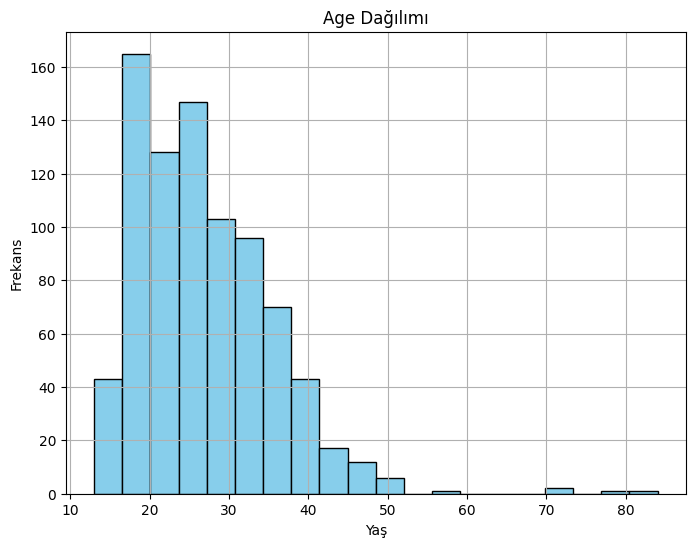

In [ ]:
# Plot the histogram of the Age variable and take a closer look
plt.figure(figsize=(8, 6))
plt.hist(cancer_data['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Dağılımı')
plt.xlabel('Yaş')
plt.ylabel('Frekans')
plt.grid(True)
plt.show()

In [ ]:
# Checking whether the age variable has a normal distribution
ks_statistic, ks_p_value = kstest(cancer_data['Age'], 'norm')

print("Kolmogorov-Smirnov Test Statistics:", ks_statistic)
print("Kolmogorov-Smirnov Test p-value:", ks_p_value)

Kolmogorov-Smirnov Test Statistics: 1.0
Kolmogorov-Smirnov Test p-value: 0.0


The Kolmogorov-Smirnov (KS) test is used to evaluate how similar the data distribution of a particular variable is to a normal distribution. This test measures the difference between the sample distribution and a reference normal distribution.

Here, we check whether the "Age" variable in the cancer_data dataset has a normal distribution using the kstest function. KS statistics and p-value results show us how well the "Age" variable fits the normal distribution and how significant this fit is.

This type of analysis is performed to understand the distributions of variables in the data set and to evaluate whether these distributions are suitable for statistical analysis. In particular, variables that are close to normal distribution can increase the reliability of parametric statistical tests.


According to the Kolmogorov-Smirnov test statistic (1.0) and p-value (0.0), we can say that the "Age" variable does not have a normal distribution. The p-value (0.0) is usually smaller than the specified alpha level (usually 0.05), indicating rejection of the null hypothesis and the conclusion that the data set is not normally distributed.

In [ ]:
def replace_outliers_iqr(df, column):

    # First quartile value (Q1) and third quartile value (Q3) are calculated
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Interquartile range (IQR) is calculated
    IQR = Q3 - Q1

    # Lower and upper limits are determined
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Outliers are pulled up to these limits
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    return df[column]

# Aykırı değerleri sınır değerlerle değiştirme
cancer_data['Age'] = replace_outliers_iqr(cancer_data, 'Age')

In [ ]:
print(cancer_data['Age'].describe())

count    835.000000
mean      26.866467
std        7.826649
min       13.000000
25%       21.000000
50%       26.000000
75%       32.000000
max       48.500000
Name: Age, dtype: float64


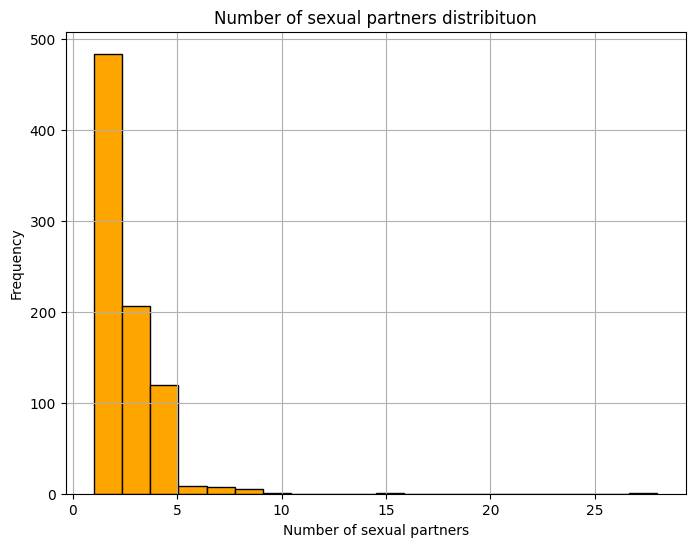

Kolmogorov-Smirnov Test Statistics: 0.8413447460685429
Kolmogorov-Smirnov Test p-value: 0.0
count    835.000000
mean       2.535329
std        1.654044
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       28.000000
Name: Number of sexual partners, dtype: float64


In [ ]:
# Draw the histogram of the "Number of sexual partners" feature
plt.figure(figsize=(8, 6))
plt.hist(cancer_data['Number of sexual partners'], bins=20, color='orange', edgecolor='black')
plt.title('Number of sexual partners distribituon')
plt.xlabel('Number of sexual partners')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Kolmogorov-Smirnov test
ks_statistic, ks_p_value = kstest(cancer_data['Number of sexual partners'], 'norm')

print("Kolmogorov-Smirnov Test Statistics:", ks_statistic)
print("Kolmogorov-Smirnov Test p-value:", ks_p_value)

print(cancer_data['Number of sexual partners'].describe())

In [ ]:
# Replace outliers with breakpoint
cancer_data['Number of sexual partners'] = replace_outliers_iqr(cancer_data, 'Number of sexual partners')
print(cancer_data['Number of sexual partners'].describe())

count    835.000000
mean       2.402395
std        1.091605
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.500000
Name: Number of sexual partners, dtype: float64


In [ ]:
print(cancer_data['First sexual intercourse'].describe())

# Kolmogorov-Smirnov test
ks_statistic, ks_p_value = kstest(cancer_data['First sexual intercourse'], 'norm')

print("Kolmogorov-Smirnov Testi İstatistiği:", ks_statistic)
print("Kolmogorov-Smirnov Testi p-değeri:", ks_p_value)

count    835.000000
mean      17.020359
std        2.805154
min       10.000000
25%       15.000000
50%       17.000000
75%       18.000000
max       32.000000
Name: First sexual intercourse, dtype: float64
Kolmogorov-Smirnov Testi İstatistiği: 1.0
Kolmogorov-Smirnov Testi p-değeri: 0.0


In [ ]:
cancer_data['First sexual intercourse'] = replace_outliers_iqr(cancer_data, 'First sexual intercourse')
print(cancer_data['First sexual intercourse'].describe())

count    835.000000
mean      16.867665
std        2.321216
min       10.500000
25%       15.000000
50%       17.000000
75%       18.000000
max       22.500000
Name: First sexual intercourse, dtype: float64


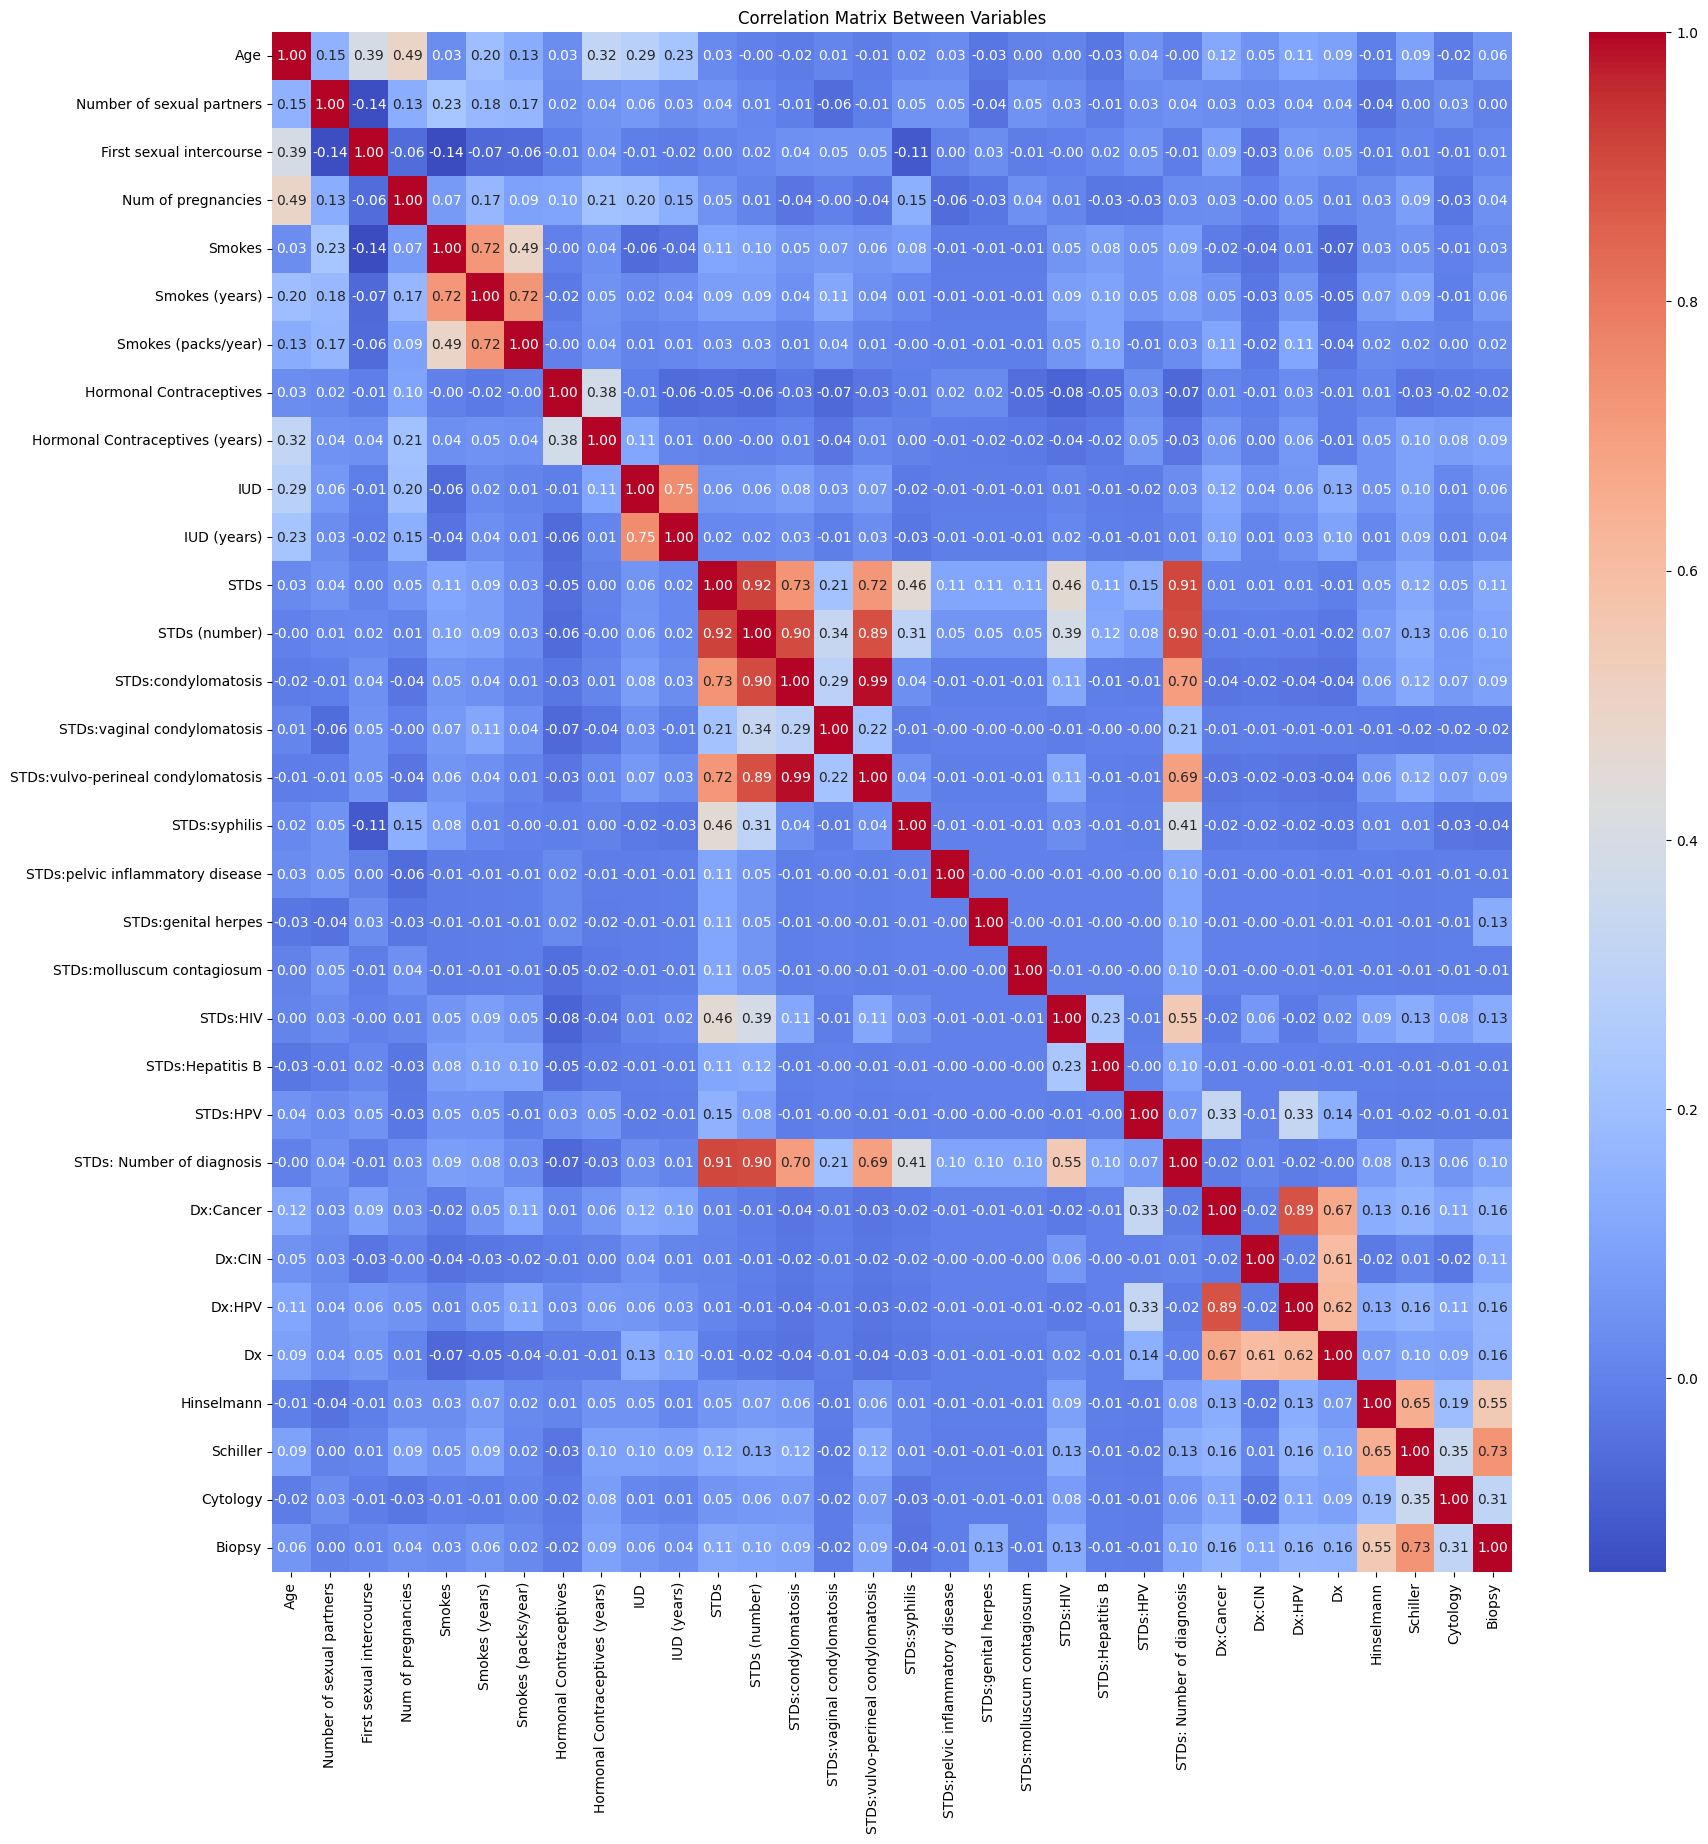

In [ ]:
# When examining relationships between variables, I will use the correlation matrix
# Creating a correlation table to be used to fill in missing values
correlation_matrix = cancer_data.corr()

# I visualize the correlation matrix so I can analyze it in more detail
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# with annot=true parameter, numerical values ​​are added to the cells of the matrix.
# cmap parameter determines the color gradation of the correlation coefficients
plt.title("Correlation Matrix Between Variables")
plt.show()

# Modelling

In [ ]:
def train_knn(X_train, X_test, y_train, y_test):
    # Create the KNN model (looking at 5 neighbors)
    knn_model = KNeighborsClassifier(n_neighbors=5)
    # Model training
    knn_model.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred = knn_model.predict(X_test)
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print("KNN Accuracy:", accuracy)
    print("KNN Classification Report:")
    print(classification_report(y_test, y_pred))
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    # Visualize the confusion matrix
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title("KNN Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

In [ ]:
def train_ann(X_train, X_test, y_train, y_test):
    # Definition and training of Artificial Neural Network (ANN) model
    ann_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
    ann_model.fit(X_train, y_train)

    # Prediction on the test dataset
    y_pred = ann_model.predict(X_test)

    # Calculation and printing of accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("ANN Accuracy:", accuracy)

    # Printing the classification report
    print("ANN Classification Report:")
    print(classification_report(y_test, y_pred))

    # Creating and visualizing the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title("ANN Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

In [ ]:
def train_svm(X_train, X_test, y_train, y_test):
    # Initialize the SVM classifier with a linear kernel and a fixed random state for reproducibility
    svm_model = SVC(kernel='linear', random_state=42)

    # Fit the model using the training data
    svm_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = svm_model.predict(X_test)

    # Calculate and print the accuracy of the model on the test data
    accuracy = accuracy_score(y_test, y_pred)
    print("SVM Accuracy:", accuracy)

    # Print a detailed classification report
    print("SVM Classification Report:")
    print(classification_report(y_test, y_pred))

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix using a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title("SVM Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

In [ ]:
def train_random_forest(X_train, X_test, y_train, y_test):
    # Initialize the Random Forest classifier with a fixed random state for reproducibility
    rf_model = RandomForestClassifier(random_state=42)

    # Fit the model using the training data
    rf_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = rf_model.predict(X_test)

    # Calculate and print the accuracy of the model on the test data
    accuracy = accuracy_score(y_test, y_pred)
    print("Random Forest Accuracy:", accuracy)

    # Print a detailed classification report
    print("Random Forest Classification Report:")
    print(classification_report(y_test, y_pred))

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix using a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title("Random Forest Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

In [ ]:
def train_xgboost_with_gridsearch(X_train, X_test, y_train, y_test):
    # Define the parameter grid for hyperparameter tuning
    param_grid = {
        'learning_rate': [0.05, 0.1, 0.2],  # Learning rate values to try
        'max_depth': [3, 5, 7],             # Maximum depth of the trees
        'n_estimators': [50, 100, 200]      # Number of boosting rounds
    }

    # Initialize the XGBoost classifier
    xgb_model = xgb.XGBClassifier()

    # Set up the grid search with cross-validation
    grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

    # Fit the model to the training data using grid search
    grid_search.fit(X_train, y_train)

    # Print the best parameters and best score from the grid search
    print("Best Parameters:", grid_search.best_params_)
    print("Best Score:", grid_search.best_score_)

    # Retrieve the best model from grid search
    best_model = grid_search.best_estimator_

    # Predict the labels for the test data
    y_pred = best_model.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    print("XGBoost Accuracy:", accuracy)

    # Print the classification report
    print("XGBoost Classification Report:")
    print(classification_report(y_test, y_pred))

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title("XGBoost Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

In [ ]:
# Extract the 'Biopsy' column as the target variable
target_df = cancer_data['Biopsy']

# Drop the 'Biopsy' column to get the input features
input_df = cancer_data.drop(columns=['Biopsy'])

# Convert the input data to a NumPy array and cast it to 'float32' data type
X = np.array(input_df).astype('float32')

# Convert the target data to a NumPy array and cast it to 'float32' data type
y = np.array(target_df).astype('float32')

# Apply SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset
# SMOTE increases the samples of the minority class to achieve a balanced distribution
smote = SMOTE(random_state=42)  # Initialize SMOTE with a fixed random seed for reproducibility
X_resampled, y_resampled = smote.fit_resample(X, y)  # Generate a balanced dataset with SMOTE

# Split the dataset into training and testing sets
# Allocate 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
# 'random_state=42' ensures reproducibility of the random split

ANN Accuracy: 0.9744408945686901
ANN Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98       164
         1.0       0.97      0.98      0.97       149

    accuracy                           0.97       313
   macro avg       0.97      0.97      0.97       313
weighted avg       0.97      0.97      0.97       313



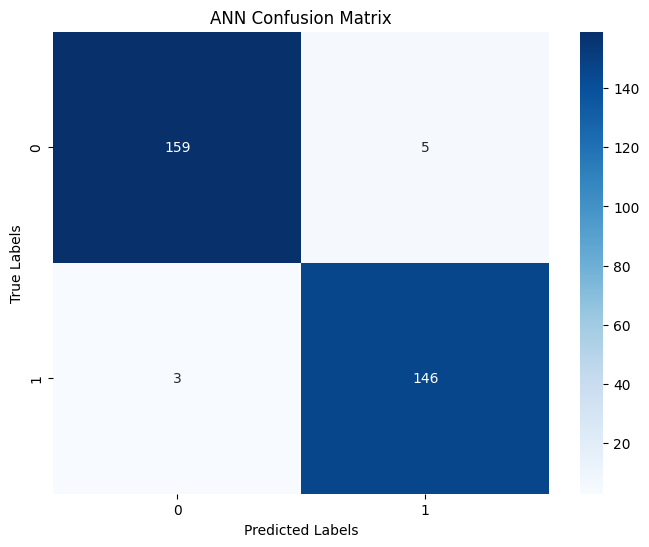

KNN Accuracy: 0.9041533546325878
KNN Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.82      0.90       164
         1.0       0.84      0.99      0.91       149

    accuracy                           0.90       313
   macro avg       0.91      0.91      0.90       313
weighted avg       0.92      0.90      0.90       313



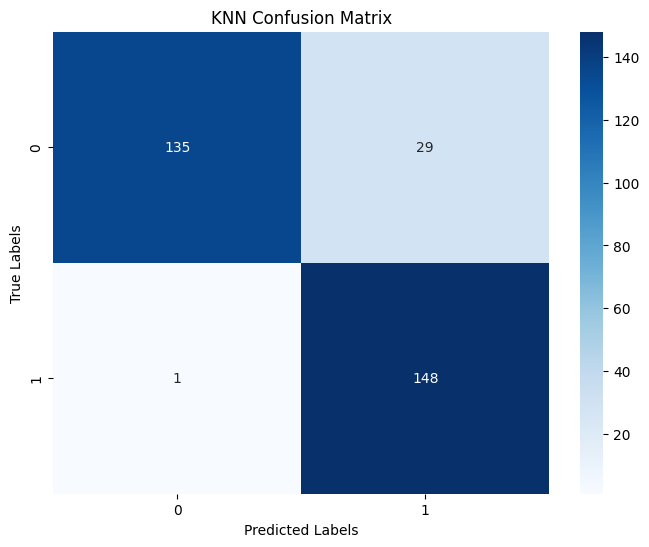

SVM Accuracy: 0.9648562300319489
SVM Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97       164
         1.0       0.96      0.97      0.96       149

    accuracy                           0.96       313
   macro avg       0.96      0.96      0.96       313
weighted avg       0.96      0.96      0.96       313



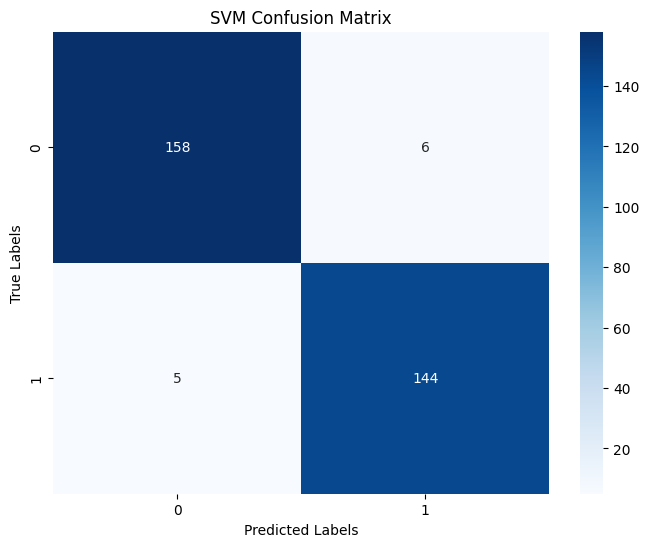

Random Forest Accuracy: 0.9840255591054313
Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       164
         1.0       0.97      0.99      0.98       149

    accuracy                           0.98       313
   macro avg       0.98      0.98      0.98       313
weighted avg       0.98      0.98      0.98       313



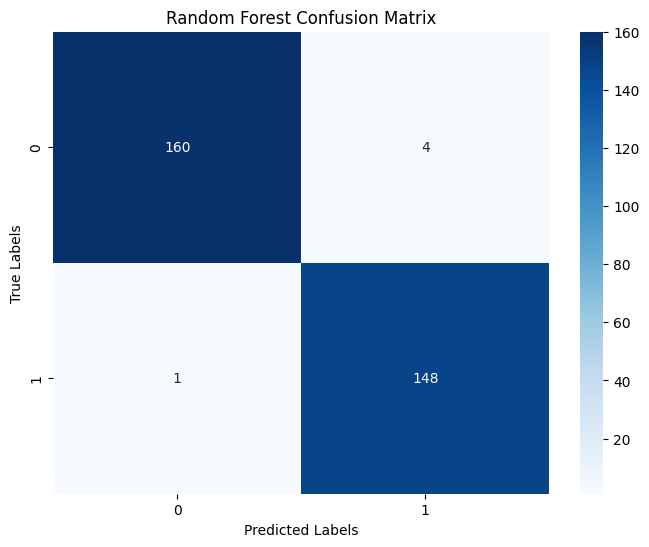

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Best Score: 0.9815858851380433
XGBoost Accuracy: 0.9648562300319489
XGBoost Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       164
         1.0       0.97      0.95      0.96       149

    accuracy                           0.96       313
   macro avg       0.97      0.96      0.96       313
weighted avg       0.96      0.96      0.96       313



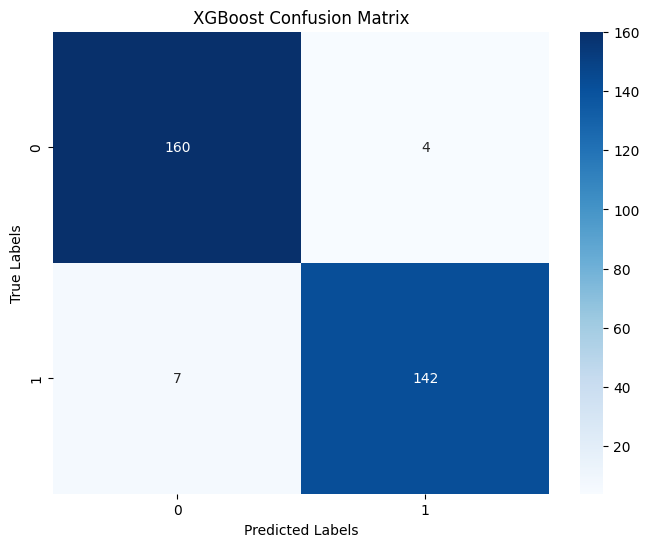

In [ ]:
# Train and evaluate models
train_ann(X_train, X_test, y_train, y_test)
train_knn(X_train, X_test, y_train, y_test)
train_svm(X_train, X_test, y_train, y_test)
train_random_forest(X_train, X_test, y_train, y_test)
train_xgboost_with_gridsearch(X_train, X_test, y_train, y_test)


If your cervical cancer dataset is *tabular and not very large*, you may get better results with:

*   Autoencoder + XGBoost
*   TabTransformer
*   LightGBM/CatBoost










**Autoencoder + XGBoost**

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Fitting 3 folds for each of 27 candidates, totalling 81 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:59:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
Best Score: 0.9327441892639734
XGBoost Accuracy: 0.939297124600639
XGBoost Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94       164
         1.0       0.92      0.96      0.94       149

    accuracy                           0.94       313
   macro avg       0.94      0.94      0.94       313
weighted avg       0.94      0.94      0.94       313



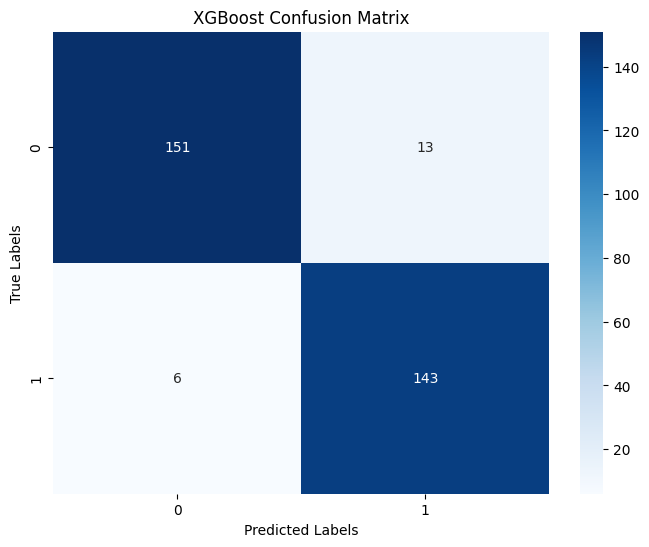

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import regularizers
import xgboost as xgb

# === 1. Preprocessing ===

# Extract the target variable and features
target_df = cancer_data['Biopsy']
input_df = cancer_data.drop(columns=['Biopsy'])

X = np.array(input_df).astype('float32')
y = np.array(target_df).astype('float32')

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# === 2. Build Autoencoder ===

input_dim = X_train.shape[1]
encoding_dim = 10  # Latent space size (can be tuned)

input_layer = Input(shape=(input_dim,))
encoded = Dense(32, activation='relu')(input_layer)
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(1e-5))(encoded)
decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the Autoencoder
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=32,
                shuffle=True,
                validation_split=0.2,
                verbose=0)

# Use encoder part to transform features
encoder = Model(inputs=input_layer, outputs=encoded)

X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

# === 3. Train XGBoost with GridSearch ===

def train_xgboost_with_gridsearch(X_train, X_test, y_train, y_test):
    param_grid = {
        'learning_rate': [0.05, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'n_estimators': [50, 100, 200]
    }

    xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)

    print("Best Parameters:", grid_search.best_params_)
    print("Best Score:", grid_search.best_score_)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print("XGBoost Accuracy:", accuracy)
    print("XGBoost Classification Report:")
    print(classification_report(y_test, y_pred))

    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title("XGBoost Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

# Run training with encoded data
train_xgboost_with_gridsearch(X_train_encoded, X_test_encoded, y_train, y_test)


**LightGBM**

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[LightGBM] [Info] Number of positive: 632, number of negative: 617
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000454 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2301
[LightGBM] [Info] Number of data points in the train set: 1249, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506005 -> initscore=0.024020
[LightGBM] [Info] Start training from score 0.024020
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


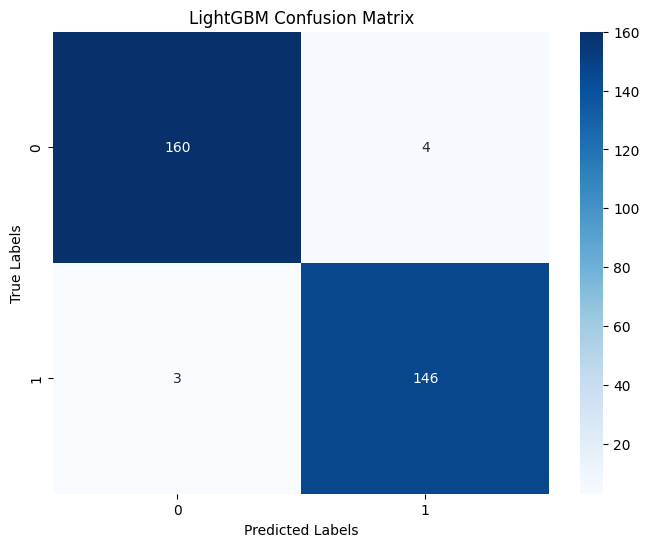

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Prepare the data
target_df = cancer_data['Biopsy']
input_df = cancer_data.drop(columns=['Biopsy'])
X = np.array(input_df).astype('float32')
y = np.array(target_df).astype('float32')

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

def train_lightgbm_with_gridsearch(X_train, X_test, y_train, y_test):
    param_grid = {
        'learning_rate': [0.05, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'n_estimators': [50, 100, 200]
    }

    lgb_model = lgb.LGBMClassifier()

    grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)

    print("Best Parameters:", grid_search.best_params_)
    print("Best Score:", grid_search.best_score_)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    print("LightGBM Accuracy:", accuracy_score(y_test, y_pred))
    print("LightGBM Classification Report:\n", classification_report(y_test, y_pred))

    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title("LightGBM Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

# Run LightGBM
train_lightgbm_with_gridsearch(X_train, X_test, y_train, y_test)


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.2 MB/s eta 0:00:00


** Version 2: CatBoost**

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'depth': 7, 'iterations': 200, 'learning_rate': 0.1}
Best Score: 0.9791839605238885
CatBoost Accuracy: 0.9808306709265175
CatBoost Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       164
         1.0       0.97      0.99      0.98       149

    accuracy                           0.98       313
   macro avg       0.98      0.98      0.98       313
weighted avg       0.98      0.98      0.98       313



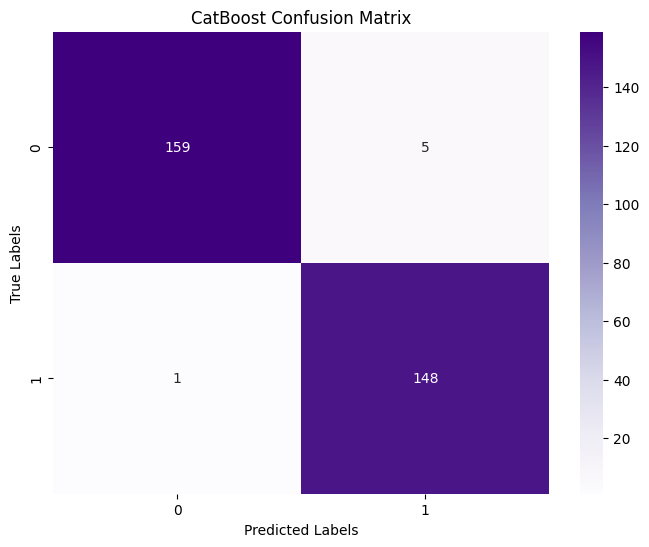

In [ ]:
from catboost import CatBoostClassifier
# Other imports are the same as above

def train_catboost_with_gridsearch(X_train, X_test, y_train, y_test):
    param_grid = {
        'learning_rate': [0.05, 0.1, 0.2],
        'depth': [3, 5, 7],
        'iterations': [50, 100, 200]
    }

    cat_model = CatBoostClassifier(verbose=0)

    grid_search = GridSearchCV(estimator=cat_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)

    print("Best Parameters:", grid_search.best_params_)
    print("Best Score:", grid_search.best_score_)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    print("CatBoost Accuracy:", accuracy_score(y_test, y_pred))
    print("CatBoost Classification Report:\n", classification_report(y_test, y_pred))

    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Purples")
    plt.title("CatBoost Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

# Run CatBoost
train_catboost_with_gridsearch(X_train, X_test, y_train, y_test)


**TabTransformer**

In [ ]:
!pip install pytorch-tabular

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.6/316.6 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 891.4/891.4 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.0 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully

In [ ]:
import pytorch_tabular
print(pytorch_tabular.__version__)


1.1.1


In [ ]:
!pip install scikit-learn pandas numpy matplotlib seaborn imblearn optuna pytorch-lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 8.1 MB/s eta 0:00:00


In [ ]:
# Load the dataset
import pandas as pd
#cancer_data = pd.read_csv("/kaggle/input/cervical-cancer-dataset/cervical-cancer_csv.csv")
cancer_data = pd.read_csv("cervical-cancer_csv.csv")

In [ ]:
# Enhanced Cancer Classification with TabTransformer and Cross-Validation
# Required packages:
# pip install pytorch-tabular scikit-learn pandas numpy matplotlib seaborn imblearn optuna pytorch-lightning

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, auc, precision_recall_curve, average_precision_score
)
from imblearn.over_sampling import SMOTE
import optuna
import torch
import warnings

# Fix for PyTorch 2.6+ serialization issues
try:
    # Try to import and register omegaconf.dictconfig.DictConfig as safe
    from omegaconf.dictconfig import DictConfig
    torch.serialization.add_safe_globals([DictConfig])
except ImportError:
    pass
except AttributeError:
    # For older PyTorch versions without add_safe_globals
    pass

from pytorch_tabular import TabularModel
from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig
from pytorch_tabular.models.tab_transformer.config import TabTransformerConfig

# Suppress warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(RANDOM_SEED)

# === Data Preprocessing Function ===
def preprocess_data(df, target_col='Biopsy', test_size=0.2, apply_smote=True):
    """
    Preprocess the cancer dataset with advanced techniques
    """
    print(f"Original dataset shape: {df.shape}")

    # Check for missing values
    missing_values = df.isnull().sum()
    if missing_values.sum() > 0:
        print("Missing values found:")
        print(missing_values[missing_values > 0])
        # For numerical columns, impute with median
        df = df.fillna(df.median())

    # Split features and target
    target_df = df[target_col]
    input_df = df.drop(columns=[target_col])

    # Standardize features (TabTransformer benefits from standardized inputs)
    scaler = StandardScaler()
    input_scaled = scaler.fit_transform(input_df)
    input_df = pd.DataFrame(input_scaled, columns=input_df.columns)

    # Convert to NumPy arrays
    X = np.array(input_df).astype('float32')
    y = np.array(target_df).astype('int64')

    # Apply SMOTE for handling class imbalance
    if apply_smote:
        print(f"Class distribution before SMOTE: {np.bincount(y)}")
        smote = SMOTE(random_state=RANDOM_SEED)
        X_resampled, y_resampled = smote.fit_resample(X, y)
        print(f"Class distribution after SMOTE: {np.bincount(y_resampled)}")

        # Recreate DataFrame after SMOTE
        resampled_df = pd.DataFrame(X_resampled, columns=input_df.columns)
        resampled_df[target_col] = y_resampled

        # Split into train and test sets
        train_df, test_df = train_test_split(resampled_df, test_size=test_size,
                                            random_state=RANDOM_SEED, stratify=y_resampled)
    else:
        # Without SMOTE
        train_df, test_df = train_test_split(df, test_size=test_size,
                                            random_state=RANDOM_SEED, stratify=y)

    print(f"Training set shape: {train_df.shape}")
    print(f"Test set shape: {test_df.shape}")

    return train_df, test_df, scaler

# === Hyperparameter Optimization with Optuna ===
def objective(trial, train_df, valid_df, target_col='Biopsy'):
    """Optuna objective function for hyperparameter tuning"""

    # Identify continuous columns (all except target)
    cont_cols = [col for col in train_df.columns if col != target_col]

    # Define data configuration
    data_config = DataConfig(
        target=[target_col],
        continuous_cols=cont_cols,
        categorical_cols=[],
        num_workers=0
    )

    # Hyperparameters to tune
    learning_rate = trial.suggest_float("learning_rate", 1e-4, 1e-2, log=True)
    input_embed_dim = trial.suggest_categorical("input_embed_dim", [16, 32, 64])
    num_heads = trial.suggest_categorical("num_heads", [4, 8])
    num_attn_blocks = trial.suggest_int("num_attn_blocks", 3, 6)
    embedding_dropout = trial.suggest_float("embedding_dropout", 0.0, 0.3)
    batch_size = trial.suggest_categorical("batch_size", [64, 128, 256])

    # Define model configuration
    model_config = TabTransformerConfig(
        task="classification",
        learning_rate=learning_rate,  # Pass learning rate directly to model config
        metrics=["accuracy"],
        input_embed_dim=input_embed_dim,
        num_heads=num_heads,
        num_attn_blocks=num_attn_blocks,
        embedding_dropout=embedding_dropout,
    )

    # Basic optimizer configuration without specifying learning rate
    optimizer_config = OptimizerConfig(
        optimizer="Adam"
    )

    # Trainer configuration
    trainer_config = TrainerConfig(
        auto_lr_find=False,
        batch_size=batch_size,
        max_epochs=30,
        early_stopping="valid_loss",
        early_stopping_patience=5,
        checkpoints="valid_loss",
        checkpoints_path="./checkpoints/",
        checkpoints_save_top_k=1
    )

    # Initialize and train the model
    model = TabularModel(
        data_config=data_config,
        model_config=model_config,
        optimizer_config=optimizer_config,
        trainer_config=trainer_config,
    )

    try:
        model.fit(train=train_df, validation=valid_df)
        result = model.evaluate(valid_df)
        accuracy = result[f"valid_accuracy"]
        return accuracy
    except Exception as e:
        print(f"Error during training: {e}")
        return 0.0

# === Evaluation Functions ===
def plot_roc_curve(y_true, y_pred_proba, title="ROC Curve"):
    """Plot ROC Curve and calculate AUC"""
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    plt.show()

    return roc_auc

def plot_precision_recall_curve(y_true, y_pred_proba, title="Precision-Recall Curve"):
    """Plot Precision-Recall Curve and calculate Average Precision"""
    precision, recall, _ = precision_recall_curve(y_true, y_pred_proba)
    avg_precision = average_precision_score(y_true, y_pred_proba)

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2,
             label=f'Precision-Recall curve (AP = {avg_precision:.3f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(title)
    plt.legend(loc="lower left")
    plt.grid(True, alpha=0.3)
    plt.show()

    return avg_precision

def evaluate_model(model, test_df, target_col='Biopsy', threshold=0.5):
    """Comprehensive model evaluation with various metrics"""
    # Get predictions and probabilities
    pred_df = model.predict(test_df)
    y_true = test_df[target_col].values
    y_pred_proba = pred_df[f"{target_col}_probability"].values
    y_pred = (y_pred_proba > threshold).astype(int)

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)

    # Print classification report
    print("\n===== Model Evaluation =====")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=['Benign', 'Malignant']))

    # Plot confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Benign', 'Malignant'],
                yticklabels=['Benign', 'Malignant'])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

    # Plot ROC curve
    roc_auc = plot_roc_curve(y_true, y_pred_proba, "ROC Curve for Cancer Classification")

    # Plot Precision-Recall curve
    avg_precision = plot_precision_recall_curve(y_true, y_pred_proba,
                                              "Precision-Recall Curve for Cancer Classification")

    # Calculate feature importance using custom permutation importance
    try:
        # Get baseline score
        baseline_pred = model.predict(test_df)
        y_true = test_df[target_col].values
        baseline_pred_proba = baseline_pred[f"{target_col}_probability"].values
        baseline_pred_binary = (baseline_pred_proba > threshold).astype(int)
        baseline_score = accuracy_score(y_true, baseline_pred_binary)

        # Calculate importance for each feature
        feature_importance = []
        features = [col for col in test_df.columns if col != target_col]

        for feature in features:
            # Create a copy of the test data
            test_permuted = test_df.copy()

            # Permute the feature values
            test_permuted[feature] = np.random.permutation(test_permuted[feature].values)

            # Predict with permuted feature
            perm_pred = model.predict(test_permuted)
            perm_pred_proba = perm_pred[f"{target_col}_probability"].values
            perm_pred_binary = (perm_pred_proba > threshold).astype(int)

            # Calculate score with permuted feature
            perm_score = accuracy_score(y_true, perm_pred_binary)

            # Feature importance is the decrease in performance
            importance = baseline_score - perm_score
            feature_importance.append({"Feature": feature, "Importance": importance})

        # Create dataframe and plot
        feature_importance_df = pd.DataFrame(feature_importance)

        # Plot feature importance
        plt.figure(figsize=(10, 6))
        feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)
        sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
        plt.title("Feature Importance (Permutation Method)")
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Could not calculate feature importance: {e}")

    return {
        'accuracy': accuracy,
        'roc_auc': roc_auc,
        'avg_precision': avg_precision,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }

# === Cross-Validation Function ===
def cross_validate(df, n_folds=5, target_col='Biopsy'):
    """Perform k-fold cross-validation"""
    # Prepare cross-validation
    kf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=RANDOM_SEED)

    # Store metrics
    cv_accuracy = []
    cv_roc_auc = []
    cv_avg_precision = []

    X = df.drop(columns=[target_col])
    y = df[target_col]

    print(f"\n===== Performing {n_folds}-Fold Cross-Validation =====")

    # Loop through each fold
    for fold, (train_idx, val_idx) in enumerate(kf.split(X, y)):
        print(f"\nTraining fold {fold+1}/{n_folds}")

        # Split data
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        # Apply SMOTE only to training data
        smote = SMOTE(random_state=RANDOM_SEED)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

        # Create dataframes
        train_df = pd.DataFrame(X_train_resampled, columns=X.columns)
        train_df[target_col] = y_train_resampled
        val_df = pd.DataFrame(X_val.values, columns=X.columns)
        val_df[target_col] = y_val.values

        # Configure model
        data_config = DataConfig(
            target=[target_col],
            continuous_cols=list(X.columns),
            categorical_cols=[]
        )

        model_config = TabTransformerConfig(
            task="classification",
            learning_rate=1e-3,  # Add learning rate directly to model config
            metrics=["accuracy"],
            input_embed_dim=32,
            num_heads=8,
            num_attn_blocks=6,
            embedding_dropout=0.1
        )

        # Simple optimizer config without redundant parameters
        optimizer_config = OptimizerConfig(
            optimizer="Adam"
        )

        trainer_config = TrainerConfig(
            max_epochs=30,
            early_stopping="valid_loss",
            early_stopping_patience=5,
            checkpoints="valid_loss",
            checkpoints_path=f"./checkpoints/fold_{fold+1}/",
            checkpoints_save_top_k=1
        )

        # Train model
        model = TabularModel(
            data_config=data_config,
            model_config=model_config,
            optimizer_config=optimizer_config,
            trainer_config=trainer_config
        )

        model.fit(train=train_df, validation=val_df)

        # Evaluate
        pred_df = model.predict(val_df)
        y_true = val_df[target_col].values
        y_pred_proba = pred_df[f"{target_col}_probability"].values
        y_pred = (y_pred_proba > 0.5).astype(int)

        # Calculate metrics
        accuracy = accuracy_score(y_true, y_pred)
        fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        avg_precision = average_precision_score(y_true, y_pred_proba)

        cv_accuracy.append(accuracy)
        cv_roc_auc.append(roc_auc)
        cv_avg_precision.append(avg_precision)

        print(f"Fold {fold+1} - Accuracy: {accuracy:.4f}, ROC AUC: {roc_auc:.4f}, Avg Precision: {avg_precision:.4f}")

    # Print summary
    print("\n===== Cross-Validation Results =====")
    print(f"Mean Accuracy: {np.mean(cv_accuracy):.4f} ± {np.std(cv_accuracy):.4f}")
    print(f"Mean ROC AUC: {np.mean(cv_roc_auc):.4f} ± {np.std(cv_roc_auc):.4f}")
    print(f"Mean Avg Precision: {np.mean(cv_avg_precision):.4f} ± {np.std(cv_avg_precision):.4f}")

    return {
        'accuracy': cv_accuracy,
        'roc_auc': cv_roc_auc,
        'avg_precision': cv_avg_precision
    }

# === Main Execution Function ===
def run_cancer_classification(cancer_data, perform_cv=True, optimize_hyperparams=True, n_trials=20):
    """
    Main function to run the entire cancer classification pipeline

    Parameters:
    -----------
    cancer_data : pandas.DataFrame
        The cancer dataset with features and 'Biopsy' target column
    perform_cv : bool
        Whether to perform cross-validation
    optimize_hyperparams : bool
        Whether to perform hyperparameter optimization with Optuna
    n_trials : int
        Number of Optuna trials if optimize_hyperparams is True
    """
    print("===== Cancer Classification with TabTransformer =====\n")

    # Preprocess data
    print("Preprocessing data...")
    train_df, test_df, scaler = preprocess_data(cancer_data, target_col='Biopsy', test_size=0.2)

    # Create validation set from training data
    train_df, valid_df = train_test_split(train_df, test_size=0.2, random_state=RANDOM_SEED)

    best_params = None

    # Hyperparameter optimization
    if optimize_hyperparams:
        print("\n===== Hyperparameter Optimization =====")
        study = optuna.create_study(direction="maximize")
        objective_func = lambda trial: objective(trial, train_df, valid_df)

        print(f"Running {n_trials} Optuna trials...")
        study.optimize(objective_func, n_trials=n_trials)

        # Get best parameters
        best_params = study.best_params
        print("\nBest hyperparameters:")
        for param, value in best_params.items():
            print(f"  {param}: {value}")

    # Configure the model (with best params if available)
    data_config = DataConfig(
        target=["Biopsy"],
        continuous_cols=[col for col in train_df.columns if col != 'Biopsy'],
        categorical_cols=[]
    )

    if best_params:
        model_config = TabTransformerConfig(
            task="classification",
            learning_rate=best_params["learning_rate"],  # Add learning rate directly to model config
            metrics=["accuracy"],
            input_embed_dim=best_params["input_embed_dim"],
            num_heads=best_params["num_heads"],
            num_attn_blocks=best_params["num_attn_blocks"],
            embedding_dropout=best_params["embedding_dropout"],
        )

        # Simple optimizer config without redundant parameters
        optimizer_config = OptimizerConfig(
            optimizer="Adam"
        )

        trainer_config = TrainerConfig(
            max_epochs=50,
            batch_size=best_params["batch_size"],
            early_stopping="valid_loss",
            early_stopping_patience=5,
        )
    else:
        # Default configuration
        model_config = TabTransformerConfig(
            task="classification",
            learning_rate=1e-3,  # Add learning rate directly to model config
            metrics=["accuracy"],
            input_embed_dim=32,
            num_heads=8,
            num_attn_blocks=6,
            embedding_dropout=0.1,
        )

        # Simple optimizer config without redundant parameters
        optimizer_config = OptimizerConfig(
            optimizer="Adam"
        )

        trainer_config = TrainerConfig(
            max_epochs=50,
            batch_size=128,
            early_stopping="valid_loss",
            early_stopping_patience=5,
        )

    # Create and train the final model
    print("\n===== Training Final Model =====")

    # Set weights_only=False for PyTorch 2.6 compatibility
    try:
        torch._utils._set_weights_only_default(False)
        print("PyTorch 2.6+ detected: set weights_only=False for compatibility")
    except (AttributeError, ImportError):
        print("Using older PyTorch version with default serialization")

    tabular_model = TabularModel(
        data_config=data_config,
        model_config=model_config,
        optimizer_config=optimizer_config,
        trainer_config=trainer_config
    )

    tabular_model.fit(train=train_df, validation=valid_df)

    # Evaluate the model
    results = evaluate_model(tabular_model, test_df)

    # Perform cross-validation if requested
    if perform_cv:
        cv_results = cross_validate(cancer_data, n_folds=5)

    # Save the model
    try:
        print("\nSaving model...")
        tabular_model.save_model("cancer_tabtransformer_model")
        print("Model saved successfully.")
    except Exception as e:
        print(f"Error saving model: {e}")

    # Return the trained model and results
    return {
        'model': tabular_model,
        'evaluation': results,
        'best_params': best_params
    }

# === Simplified Cancer Classification Function ===
def run_simple_classification(cancer_data):
    """
    Simplified version that avoids potential compatibility issues
    """
    print("===== Running Simplified Cancer Classification =====\n")

    # Basic data prep without SMOTE
    target_df = cancer_data['Biopsy']
    input_df = cancer_data.drop(columns=['Biopsy'])

    # Split into train and test sets
    train_df, test_df = train_test_split(
        cancer_data, test_size=0.2, random_state=42, stratify=cancer_data['Biopsy']
    )

    print(f"Training set shape: {train_df.shape}")
    print(f"Test set shape: {test_df.shape}")

    # Set weights_only=False for PyTorch 2.6 compatibility
    try:
        torch._utils._set_weights_only_default(False)
        print("PyTorch 2.6+ detected: set weights_only=False for compatibility")
    except (AttributeError, ImportError):
        print("Using older PyTorch version with default serialization")

    # Simple configuration that should work across most versions
    data_config = DataConfig(
        target=["Biopsy"],
        continuous_cols=list(input_df.columns),
        categorical_cols=[]
    )

    model_config = TabTransformerConfig(
        task="classification",
        learning_rate=1e-3,
        metrics=["accuracy"],
        input_embed_dim=32,
        num_heads=8,
        num_attn_blocks=6,
        embedding_dropout=0.1,
    )

    try:
        # Try with minimal configuration
        print("Using minimal TabularModel configuration...")
        tabular_model = TabularModel(
            data_config=data_config,
            model_config=model_config
        )

        print("Starting model training...")
        tabular_model.fit(train=train_df)

        # Evaluate the model
        print("\n===== Model Evaluation =====")
        pred_df = tabular_model.predict(test_df)
        y_true = test_df['Biopsy'].values
        if 'prediction' in pred_df.columns:
            y_pred = pred_df['prediction'].values
        else:
            y_pred = pred_df['Biopsy_prediction'].values

        accuracy = accuracy_score(y_true, y_pred)
        print(f"Accuracy: {accuracy:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_true, y_pred))

        return {
            'model': tabular_model,
            'accuracy': accuracy
        }

    except Exception as e:
        print(f"Error in simplified classification: {e}")
        print("\nFalling back to basic sklearn model...")

        # Fallback to sklearn model
        from sklearn.ensemble import RandomForestClassifier
        rf = RandomForestClassifier(random_state=42)
        rf.fit(train_df.drop(columns=['Biopsy']), train_df['Biopsy'])

        # Evaluate
        y_pred = rf.predict(test_df.drop(columns=['Biopsy']))
        y_true = test_df['Biopsy'].values

        accuracy = accuracy_score(y_true, y_pred)
        print(f"RandomForest Accuracy: {accuracy:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_true, y_pred))

        return {
            'model': rf,
            'accuracy': accuracy
        }

# === Example Usage ===
if __name__ == "__main__":
    # Assuming cancer_data is your DataFrame
    try:
        # Try the full pipeline with advanced features
        results = run_cancer_classification(
            cancer_data=cancer_data,  # Your cancer DataFrame
            perform_cv=True,          # Perform cross-validation
            optimize_hyperparams=True, # Perform hyperparameter tuning
            n_trials=20               # Number of Optuna trials
        )
    except Exception as e:
        print(f"Error in advanced pipeline: {e}")
        print("\nFalling back to simplified classification...")
        # Fall back to simplified version if the advanced one fails
        results = run_simple_classification(cancer_data)

    # Access the model
    model = results['model']

===== Cancer Classification with TabTransformer =====

Preprocessing data...
Original dataset shape: (835, 36)
Missing values found:
Number of sexual partners              25
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               103
Hormonal Contraceptives (years)       103
IUD                                   112
IUD (years)                           112
STDs                                  100
STDs (number)                         100
STDs:condylomatosis                   100
STDs:cervical condylomatosis          100
STDs:vaginal condylomatosis           100
STDs:vulvo-perineal condylomatosis    100
STDs:syphilis                         100
STDs:pelvic inflammatory disease      100
STDs:genital herpes                   100
STDs:molluscum contagiosum            100
STDs:AIDS                  

[I 2025-09-17 06:06:33,618] A new study created in memory with name: no-name-62b345e5-3765-474d-aa9f-28007a94dfde


Class distribution before SMOTE: [781  54]
Class distribution after SMOTE: [781 781]
Training set shape: (1249, 36)
Test set shape: (313, 36)

===== Hyperparameter Optimization =====
Running 20 Optuna trials...


INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for classification task
INFO:pytorch_tabular.tabular_model:Preparing the Model: TabTransformerModel
INFO:pytorch_tabular.tabular_model:Preparing the Trainer
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_tabular.tabular_model:Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                   ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ TabTransformerBackbone │ 68.1 K │ train │
│ 1 │ _embedding_layer │ Embedding2dLayer       │      0 │ train │
│ 2 │ _head            │ LinearHead             │     72 │ train │
│ 3 │ loss             │ CrossEntropyLoss       │      0 │ train │
└───┴──────────────────┴────────────────────────┴────────┴───────┘

Trainable params: 68.2 K                                                                                           
Non-trainable params: 0                                                                                            
Total params: 68.2 K                                                                                               
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 120                                                                                         
Modules in eval mode: 0

Output()

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=30` reached.


INFO:pytorch_tabular.tabular_model:Training the model completed
INFO:pytorch_tabular.tabular_model:Loading the best model
[I 2025-09-17 06:07:30,031] Trial 0 finished with value: 0.0 and parameters: {'learning_rate': 0.0011545876903084422, 'input_embed_dim': 16, 'num_heads': 8, 'num_attn_blocks': 6, 'embedding_dropout': 0.2926029641743607, 'batch_size': 64}. Best is trial 0 with value: 0.0.
INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for classification task
INFO:pytorch_tabular.tabular_model:Preparing the Model: TabTransformerModel


Error during training: Weights only load failed. This file can still be loaded, to do so you have two options, do those steps only if you trust the source of the checkpoint. 
	(1) In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
	(2) Alternatively, to load with `weights_only=True` please check the recommended steps in the following error message.
	WeightsUnpickler error: Unsupported global: GLOBAL omegaconf.base.ContainerMetadata was not an allowed global by default. Please use `torch.serialization.add_safe_globals([omegaconf.base.ContainerMetadata])` or the `torch.serialization.safe_globals([omegaconf.base.ContainerMetadata])` context manager to allowlist this global if you trust this class/function.

Check the documentation of torch.load to

INFO:pytorch_tabular.tabular_model:Preparing the Trainer
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_tabular.tabular_model:Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                   ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ TabTransformerBackbone │ 56.8 K │ train │
│ 1 │ _embedding_layer │ Embedding2dLayer       │      0 │ train │
│ 2 │ _head            │ LinearHead             │     72 │ train │
│ 3 │ loss             │ CrossEntropyLoss       │      0 │ train │
└───┴──────────────────┴────────────────────────┴────────┴───────┘

Trainable params: 56.9 K                                                                                           
Non-trainable params: 0                                                                                            
Total params: 56.9 K                                                                                               
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 102                                                                                         
Modules in eval mode: 0

Output()

INFO:pytorch_tabular.tabular_model:Training the model completed
INFO:pytorch_tabular.tabular_model:Loading the best model
[I 2025-09-17 06:07:33,348] Trial 1 finished with value: 0.0 and parameters: {'learning_rate': 0.000171775704580322, 'input_embed_dim': 16, 'num_heads': 8, 'num_attn_blocks': 5, 'embedding_dropout': 0.014117445238165093, 'batch_size': 256}. Best is trial 0 with value: 0.0.
INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for classification task
INFO:pytorch_tabular.tabular_model:Preparing the Model: TabTransformerModel


Error during training: Weights only load failed. This file can still be loaded, to do so you have two options, do those steps only if you trust the source of the checkpoint. 
	(1) In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
	(2) Alternatively, to load with `weights_only=True` please check the recommended steps in the following error message.
	WeightsUnpickler error: Unsupported global: GLOBAL omegaconf.base.ContainerMetadata was not an allowed global by default. Please use `torch.serialization.add_safe_globals([omegaconf.base.ContainerMetadata])` or the `torch.serialization.safe_globals([omegaconf.base.ContainerMetadata])` context manager to allowlist this global if you trust this class/function.

Check the documentation of torch.load to

INFO:pytorch_tabular.tabular_model:Preparing the Trainer
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_tabular.tabular_model:Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                   ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ TabTransformerBackbone │  115 K │ train │
│ 1 │ _embedding_layer │ Embedding2dLayer       │      0 │ train │
│ 2 │ _head            │ LinearHead             │     72 │ train │
│ 3 │ loss             │ CrossEntropyLoss       │      0 │ train │
└───┴──────────────────┴────────────────────────┴────────┴───────┘

Trainable params: 115 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 115 K                                                                                                
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 84                                                                                          
Modules in eval mode: 0

Output()

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=30` reached.


INFO:pytorch_tabular.tabular_model:Training the model completed
INFO:pytorch_tabular.tabular_model:Loading the best model
[I 2025-09-17 06:07:53,919] Trial 2 finished with value: 0.0 and parameters: {'learning_rate': 0.0010916333037907955, 'input_embed_dim': 32, 'num_heads': 4, 'num_attn_blocks': 4, 'embedding_dropout': 0.28109404765924223, 'batch_size': 128}. Best is trial 0 with value: 0.0.
INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for classification task


Error during training: Weights only load failed. This file can still be loaded, to do so you have two options, do those steps only if you trust the source of the checkpoint. 
	(1) In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
	(2) Alternatively, to load with `weights_only=True` please check the recommended steps in the following error message.
	WeightsUnpickler error: Unsupported global: GLOBAL omegaconf.base.ContainerMetadata was not an allowed global by default. Please use `torch.serialization.add_safe_globals([omegaconf.base.ContainerMetadata])` or the `torch.serialization.safe_globals([omegaconf.base.ContainerMetadata])` context manager to allowlist this global if you trust this class/function.

Check the documentation of torch.load to

INFO:pytorch_tabular.tabular_model:Preparing the Model: TabTransformerModel
INFO:pytorch_tabular.tabular_model:Preparing the Trainer
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_tabular.tabular_model:Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                   ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ TabTransformerBackbone │ 36.3 K │ train │
│ 1 │ _embedding_layer │ Embedding2dLayer       │      0 │ train │
│ 2 │ _head            │ LinearHead             │     72 │ train │
│ 3 │ loss             │ CrossEntropyLoss       │      0 │ train │
└───┴──────────────────┴────────────────────────┴────────┴───────┘

Trainable params: 36.4 K                                                                                           
Non-trainable params: 0                                                                                            
Total params: 36.4 K                                                                                               
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 102                                                                                         
Modules in eval mode: 0

Output()

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=30` reached.


INFO:pytorch_tabular.tabular_model:Training the model completed
INFO:pytorch_tabular.tabular_model:Loading the best model
[I 2025-09-17 06:08:11,934] Trial 3 finished with value: 0.0 and parameters: {'learning_rate': 0.004913477707092982, 'input_embed_dim': 16, 'num_heads': 4, 'num_attn_blocks': 5, 'embedding_dropout': 0.2672640134000344, 'batch_size': 128}. Best is trial 0 with value: 0.0.
INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders


Error during training: Weights only load failed. This file can still be loaded, to do so you have two options, do those steps only if you trust the source of the checkpoint. 
	(1) In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
	(2) Alternatively, to load with `weights_only=True` please check the recommended steps in the following error message.
	WeightsUnpickler error: Unsupported global: GLOBAL omegaconf.base.ContainerMetadata was not an allowed global by default. Please use `torch.serialization.add_safe_globals([omegaconf.base.ContainerMetadata])` or the `torch.serialization.safe_globals([omegaconf.base.ContainerMetadata])` context manager to allowlist this global if you trust this class/function.

Check the documentation of torch.load to

INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for classification task
INFO:pytorch_tabular.tabular_model:Preparing the Model: TabTransformerModel
INFO:pytorch_tabular.tabular_model:Preparing the Trainer
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_tabular.tabular_model:Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                   ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ TabTransformerBackbone │  144 K │ train │
│ 1 │ _embedding_layer │ Embedding2dLayer       │      0 │ train │
│ 2 │ _head            │ LinearHead             │     72 │ train │
│ 3 │ loss             │ CrossEntropyLoss       │      0 │ train │
└───┴──────────────────┴────────────────────────┴────────┴───────┘

Trainable params: 144 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 144 K                                                                                                
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 102                                                                                         
Modules in eval mode: 0

Output()

INFO:pytorch_tabular.tabular_model:Training the model completed
INFO:pytorch_tabular.tabular_model:Loading the best model
[I 2025-09-17 06:08:19,651] Trial 4 finished with value: 0.0 and parameters: {'learning_rate': 0.00025981837601821953, 'input_embed_dim': 32, 'num_heads': 4, 'num_attn_blocks': 5, 'embedding_dropout': 0.20211158630321613, 'batch_size': 128}. Best is trial 0 with value: 0.0.
INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for classification task


Error during training: Weights only load failed. This file can still be loaded, to do so you have two options, do those steps only if you trust the source of the checkpoint. 
	(1) In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
	(2) Alternatively, to load with `weights_only=True` please check the recommended steps in the following error message.
	WeightsUnpickler error: Unsupported global: GLOBAL omegaconf.base.ContainerMetadata was not an allowed global by default. Please use `torch.serialization.add_safe_globals([omegaconf.base.ContainerMetadata])` or the `torch.serialization.safe_globals([omegaconf.base.ContainerMetadata])` context manager to allowlist this global if you trust this class/function.

Check the documentation of torch.load to

INFO:pytorch_tabular.tabular_model:Preparing the Model: TabTransformerModel
INFO:pytorch_tabular.tabular_model:Preparing the Trainer
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_tabular.tabular_model:Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                   ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ TabTransformerBackbone │ 86.6 K │ train │
│ 1 │ _embedding_layer │ Embedding2dLayer       │      0 │ train │
│ 2 │ _head            │ LinearHead             │     72 │ train │
│ 3 │ loss             │ CrossEntropyLoss       │      0 │ train │
└───┴──────────────────┴────────────────────────┴────────┴───────┘

Trainable params: 86.6 K                                                                                           
Non-trainable params: 0                                                                                            
Total params: 86.6 K                                                                                               
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 66                                                                                          
Modules in eval mode: 0

Output()

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=30` reached.


INFO:pytorch_tabular.tabular_model:Training the model completed
INFO:pytorch_tabular.tabular_model:Loading the best model
[I 2025-09-17 06:08:40,844] Trial 5 finished with value: 0.0 and parameters: {'learning_rate': 0.001059738196323722, 'input_embed_dim': 32, 'num_heads': 4, 'num_attn_blocks': 3, 'embedding_dropout': 0.010889083656839148, 'batch_size': 128}. Best is trial 0 with value: 0.0.
INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for classification task
INFO:pytorch_tabular.tabular_model:Preparing the Model: TabTransformerModel


Error during training: Weights only load failed. This file can still be loaded, to do so you have two options, do those steps only if you trust the source of the checkpoint. 
	(1) In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
	(2) Alternatively, to load with `weights_only=True` please check the recommended steps in the following error message.
	WeightsUnpickler error: Unsupported global: GLOBAL omegaconf.base.ContainerMetadata was not an allowed global by default. Please use `torch.serialization.add_safe_globals([omegaconf.base.ContainerMetadata])` or the `torch.serialization.safe_globals([omegaconf.base.ContainerMetadata])` context manager to allowlist this global if you trust this class/function.

Check the documentation of torch.load to

INFO:pytorch_tabular.tabular_model:Preparing the Trainer
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_tabular.tabular_model:Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                   ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ TabTransformerBackbone │  271 K │ train │
│ 1 │ _embedding_layer │ Embedding2dLayer       │      0 │ train │
│ 2 │ _head            │ LinearHead             │     72 │ train │
│ 3 │ loss             │ CrossEntropyLoss       │      0 │ train │
└───┴──────────────────┴────────────────────────┴────────┴───────┘

Trainable params: 271 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 271 K                                                                                                
Total estimated model params size (MB): 1                                                                          
Modules in train mode: 120                                                                                         
Modules in eval mode: 0

Output()

INFO:pytorch_tabular.tabular_model:Training the model completed
INFO:pytorch_tabular.tabular_model:Loading the best model
[I 2025-09-17 06:08:44,511] Trial 6 finished with value: 0.0 and parameters: {'learning_rate': 0.00011454640242388027, 'input_embed_dim': 32, 'num_heads': 8, 'num_attn_blocks': 6, 'embedding_dropout': 0.2036435553020944, 'batch_size': 256}. Best is trial 0 with value: 0.0.
INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Seed set to 42


Error during training: Weights only load failed. This file can still be loaded, to do so you have two options, do those steps only if you trust the source of the checkpoint. 
	(1) In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
	(2) Alternatively, to load with `weights_only=True` please check the recommended steps in the following error message.
	WeightsUnpickler error: Unsupported global: GLOBAL omegaconf.base.ContainerMetadata was not an allowed global by default. Please use `torch.serialization.add_safe_globals([omegaconf.base.ContainerMetadata])` or the `torch.serialization.safe_globals([omegaconf.base.ContainerMetadata])` context manager to allowlist this global if you trust this class/function.

Check the documentation of torch.load to

INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for classification task
INFO:pytorch_tabular.tabular_model:Preparing the Model: TabTransformerModel
INFO:pytorch_tabular.tabular_model:Preparing the Trainer
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_tabular.tabular_model:Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                   ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ TabTransformerBackbone │  144 K │ train │
│ 1 │ _embedding_layer │ Embedding2dLayer       │      0 │ train │
│ 2 │ _head            │ LinearHead             │     72 │ train │
│ 3 │ loss             │ CrossEntropyLoss       │      0 │ train │
└───┴──────────────────┴────────────────────────┴────────┴───────┘

Trainable params: 144 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 144 K                                                                                                
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 102                                                                                         
Modules in eval mode: 0

Output()

INFO:pytorch_tabular.tabular_model:Training the model completed
INFO:pytorch_tabular.tabular_model:Loading the best model
[I 2025-09-17 06:08:49,052] Trial 7 finished with value: 0.0 and parameters: {'learning_rate': 0.00018080837016080426, 'input_embed_dim': 32, 'num_heads': 4, 'num_attn_blocks': 5, 'embedding_dropout': 0.14316056775180105, 'batch_size': 128}. Best is trial 0 with value: 0.0.
INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for classification task
INFO:pytorch_tabular.tabular_model:Preparing the Model: TabTransformerModel


Error during training: Weights only load failed. This file can still be loaded, to do so you have two options, do those steps only if you trust the source of the checkpoint. 
	(1) In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
	(2) Alternatively, to load with `weights_only=True` please check the recommended steps in the following error message.
	WeightsUnpickler error: Unsupported global: GLOBAL omegaconf.base.ContainerMetadata was not an allowed global by default. Please use `torch.serialization.add_safe_globals([omegaconf.base.ContainerMetadata])` or the `torch.serialization.safe_globals([omegaconf.base.ContainerMetadata])` context manager to allowlist this global if you trust this class/function.

Check the documentation of torch.load to

INFO:pytorch_tabular.tabular_model:Preparing the Trainer
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_tabular.tabular_model:Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                   ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ TabTransformerBackbone │ 45.4 K │ train │
│ 1 │ _embedding_layer │ Embedding2dLayer       │      0 │ train │
│ 2 │ _head            │ LinearHead             │     72 │ train │
│ 3 │ loss             │ CrossEntropyLoss       │      0 │ train │
└───┴──────────────────┴────────────────────────┴────────┴───────┘

Trainable params: 45.5 K                                                                                           
Non-trainable params: 0                                                                                            
Total params: 45.5 K                                                                                               
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 84                                                                                          
Modules in eval mode: 0

Output()

INFO:pytorch_tabular.tabular_model:Training the model completed
INFO:pytorch_tabular.tabular_model:Loading the best model
[I 2025-09-17 06:08:51,295] Trial 8 finished with value: 0.0 and parameters: {'learning_rate': 0.0009541470749274984, 'input_embed_dim': 16, 'num_heads': 8, 'num_attn_blocks': 4, 'embedding_dropout': 0.23470267881945775, 'batch_size': 128}. Best is trial 0 with value: 0.0.
INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for classification task
INFO:pytorch_tabular.tabular_model:Preparing the Model: TabTransformerModel
INFO:pytorch_tabular.tabular_model:Preparing the Trainer


Error during training: Weights only load failed. This file can still be loaded, to do so you have two options, do those steps only if you trust the source of the checkpoint. 
	(1) In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
	(2) Alternatively, to load with `weights_only=True` please check the recommended steps in the following error message.
	WeightsUnpickler error: Unsupported global: GLOBAL omegaconf.base.ContainerMetadata was not an allowed global by default. Please use `torch.serialization.add_safe_globals([omegaconf.base.ContainerMetadata])` or the `torch.serialization.safe_globals([omegaconf.base.ContainerMetadata])` context manager to allowlist this global if you trust this class/function.

Check the documentation of torch.load to

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_tabular.tabular_model:Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                   ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ TabTransformerBackbone │ 29.1 K │ train │
│ 1 │ _embedding_layer │ Embedding2dLayer       │      0 │ train │
│ 2 │ _head            │ LinearHead             │     72 │ train │
│ 3 │ loss             │ CrossEntropyLoss       │      0 │ train │
└───┴──────────────────┴────────────────────────┴────────┴───────┘

Trainable params: 29.1 K                                                                                           
Non-trainable params: 0                                                                                            
Total params: 29.1 K                                                                                               
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 84                                                                                          
Modules in eval mode: 0

Output()

INFO:pytorch_tabular.tabular_model:Training the model completed
INFO:pytorch_tabular.tabular_model:Loading the best model
[I 2025-09-17 06:08:53,403] Trial 9 finished with value: 0.0 and parameters: {'learning_rate': 0.0003178425861444576, 'input_embed_dim': 16, 'num_heads': 4, 'num_attn_blocks': 4, 'embedding_dropout': 0.07002359008000363, 'batch_size': 256}. Best is trial 0 with value: 0.0.
INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for classification task
INFO:pytorch_tabular.tabular_model:Preparing the Model: TabTransformerModel


Error during training: Weights only load failed. This file can still be loaded, to do so you have two options, do those steps only if you trust the source of the checkpoint. 
	(1) In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
	(2) Alternatively, to load with `weights_only=True` please check the recommended steps in the following error message.
	WeightsUnpickler error: Unsupported global: GLOBAL omegaconf.base.ContainerMetadata was not an allowed global by default. Please use `torch.serialization.add_safe_globals([omegaconf.base.ContainerMetadata])` or the `torch.serialization.safe_globals([omegaconf.base.ContainerMetadata])` context manager to allowlist this global if you trust this class/function.

Check the documentation of torch.load to

INFO:pytorch_tabular.tabular_model:Preparing the Trainer
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_tabular.tabular_model:Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                   ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ TabTransformerBackbone │  1.1 M │ train │
│ 1 │ _embedding_layer │ Embedding2dLayer       │      0 │ train │
│ 2 │ _head            │ LinearHead             │     72 │ train │
│ 3 │ loss             │ CrossEntropyLoss       │      0 │ train │
└───┴──────────────────┴────────────────────────┴────────┴───────┘

Trainable params: 1.1 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.1 M                                                                                                
Total estimated model params size (MB): 4                                                                          
Modules in train mode: 120                                                                                         
Modules in eval mode: 0

Output()

INFO:pytorch_tabular.tabular_model:Training the model completed
INFO:pytorch_tabular.tabular_model:Loading the best model
[I 2025-09-17 06:09:00,108] Trial 10 finished with value: 0.0 and parameters: {'learning_rate': 0.009443820724705117, 'input_embed_dim': 64, 'num_heads': 8, 'num_attn_blocks': 6, 'embedding_dropout': 0.11718244048506675, 'batch_size': 64}. Best is trial 0 with value: 0.0.
INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for classification task
INFO:pytorch_tabular.tabular_model:Preparing the Model: TabTransformerModel
INFO:pytorch_tabular.tabular_model:Preparing the Trainer
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False


Error during training: Weights only load failed. This file can still be loaded, to do so you have two options, do those steps only if you trust the source of the checkpoint. 
	(1) In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
	(2) Alternatively, to load with `weights_only=True` please check the recommended steps in the following error message.
	WeightsUnpickler error: Unsupported global: GLOBAL omegaconf.base.ContainerMetadata was not an allowed global by default. Please use `torch.serialization.add_safe_globals([omegaconf.base.ContainerMetadata])` or the `torch.serialization.safe_globals([omegaconf.base.ContainerMetadata])` context manager to allowlist this global if you trust this class/function.

Check the documentation of torch.load to

INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_tabular.tabular_model:Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                   ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ TabTransformerBackbone │ 68.1 K │ train │
│ 1 │ _embedding_layer │ Embedding2dLayer       │      0 │ train │
│ 2 │ _head            │ LinearHead             │     72 │ train │
│ 3 │ loss             │ CrossEntropyLoss       │      0 │ train │
└───┴──────────────────┴────────────────────────┴────────┴───────┘

Trainable params: 68.2 K                                                                                           
Non-trainable params: 0                                                                                            
Total params: 68.2 K                                                                                               
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 120                                                                                         
Modules in eval mode: 0

Output()

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=30` reached.


INFO:pytorch_tabular.tabular_model:Training the model completed
INFO:pytorch_tabular.tabular_model:Loading the best model
[I 2025-09-17 06:09:18,272] Trial 11 finished with value: 0.0 and parameters: {'learning_rate': 0.0023428857011065602, 'input_embed_dim': 16, 'num_heads': 8, 'num_attn_blocks': 6, 'embedding_dropout': 0.023236332529511378, 'batch_size': 64}. Best is trial 0 with value: 0.0.
INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for classification task
INFO:pytorch_tabular.tabular_model:Preparing the Model: TabTransformerModel
INFO:pytorch_tabular.tabular_model:Preparing the Trainer
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank

Error during training: Weights only load failed. This file can still be loaded, to do so you have two options, do those steps only if you trust the source of the checkpoint. 
	(1) In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
	(2) Alternatively, to load with `weights_only=True` please check the recommended steps in the following error message.
	WeightsUnpickler error: Unsupported global: GLOBAL omegaconf.base.ContainerMetadata was not an allowed global by default. Please use `torch.serialization.add_safe_globals([omegaconf.base.ContainerMetadata])` or the `torch.serialization.safe_globals([omegaconf.base.ContainerMetadata])` context manager to allowlist this global if you trust this class/function.

Check the documentation of torch.load to

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                   ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ TabTransformerBackbone │ 68.1 K │ train │
│ 1 │ _embedding_layer │ Embedding2dLayer       │      0 │ train │
│ 2 │ _head            │ LinearHead             │     72 │ train │
│ 3 │ loss             │ CrossEntropyLoss       │      0 │ train │
└───┴──────────────────┴────────────────────────┴────────┴───────┘

Trainable params: 68.2 K                                                                                           
Non-trainable params: 0                                                                                            
Total params: 68.2 K                                                                                               
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 120                                                                                         
Modules in eval mode: 0

Output()

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=30` reached.


INFO:pytorch_tabular.tabular_model:Training the model completed
INFO:pytorch_tabular.tabular_model:Loading the best model
[I 2025-09-17 06:09:24,761] Trial 12 finished with value: 0.0 and parameters: {'learning_rate': 0.0004929182229929745, 'input_embed_dim': 16, 'num_heads': 8, 'num_attn_blocks': 6, 'embedding_dropout': 0.07364431559050627, 'batch_size': 256}. Best is trial 0 with value: 0.0.
INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for classification task
INFO:pytorch_tabular.tabular_model:Preparing the Model: TabTransformerModel


Error during training: Weights only load failed. This file can still be loaded, to do so you have two options, do those steps only if you trust the source of the checkpoint. 
	(1) In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
	(2) Alternatively, to load with `weights_only=True` please check the recommended steps in the following error message.
	WeightsUnpickler error: Unsupported global: GLOBAL omegaconf.base.ContainerMetadata was not an allowed global by default. Please use `torch.serialization.add_safe_globals([omegaconf.base.ContainerMetadata])` or the `torch.serialization.safe_globals([omegaconf.base.ContainerMetadata])` context manager to allowlist this global if you trust this class/function.

Check the documentation of torch.load to

INFO:pytorch_tabular.tabular_model:Preparing the Trainer
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_tabular.tabular_model:Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                   ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ TabTransformerBackbone │  902 K │ train │
│ 1 │ _embedding_layer │ Embedding2dLayer       │      0 │ train │
│ 2 │ _head            │ LinearHead             │     72 │ train │
│ 3 │ loss             │ CrossEntropyLoss       │      0 │ train │
└───┴──────────────────┴────────────────────────┴────────┴───────┘

Trainable params: 902 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 902 K                                                                                                
Total estimated model params size (MB): 3                                                                          
Modules in train mode: 102                                                                                         
Modules in eval mode: 0

Output()

INFO:pytorch_tabular.tabular_model:Training the model completed
INFO:pytorch_tabular.tabular_model:Loading the best model
[I 2025-09-17 06:09:29,380] Trial 13 finished with value: 0.0 and parameters: {'learning_rate': 0.0018976278324649971, 'input_embed_dim': 64, 'num_heads': 8, 'num_attn_blocks': 5, 'embedding_dropout': 0.18070871024689406, 'batch_size': 64}. Best is trial 0 with value: 0.0.
INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for classification task
INFO:pytorch_tabular.tabular_model:Preparing the Model: TabTransformerModel


Error during training: Weights only load failed. This file can still be loaded, to do so you have two options, do those steps only if you trust the source of the checkpoint. 
	(1) In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
	(2) Alternatively, to load with `weights_only=True` please check the recommended steps in the following error message.
	WeightsUnpickler error: Unsupported global: GLOBAL omegaconf.base.ContainerMetadata was not an allowed global by default. Please use `torch.serialization.add_safe_globals([omegaconf.base.ContainerMetadata])` or the `torch.serialization.safe_globals([omegaconf.base.ContainerMetadata])` context manager to allowlist this global if you trust this class/function.

Check the documentation of torch.load to

INFO:pytorch_tabular.tabular_model:Preparing the Trainer
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_tabular.tabular_model:Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                   ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ TabTransformerBackbone │ 68.1 K │ train │
│ 1 │ _embedding_layer │ Embedding2dLayer       │      0 │ train │
│ 2 │ _head            │ LinearHead             │     72 │ train │
│ 3 │ loss             │ CrossEntropyLoss       │      0 │ train │
└───┴──────────────────┴────────────────────────┴────────┴───────┘

Trainable params: 68.2 K                                                                                           
Non-trainable params: 0                                                                                            
Total params: 68.2 K                                                                                               
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 120                                                                                         
Modules in eval mode: 0

Output()

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=30` reached.


INFO:pytorch_tabular.tabular_model:Training the model completed
INFO:pytorch_tabular.tabular_model:Loading the best model
[I 2025-09-17 06:09:37,022] Trial 14 finished with value: 0.0 and parameters: {'learning_rate': 0.0005100993230028121, 'input_embed_dim': 16, 'num_heads': 8, 'num_attn_blocks': 6, 'embedding_dropout': 0.1031973336152274, 'batch_size': 256}. Best is trial 0 with value: 0.0.
INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for classification task
INFO:pytorch_tabular.tabular_model:Preparing the Model: TabTransformerModel
INFO:pytorch_tabular.tabular_model:Preparing the Trainer


Error during training: Weights only load failed. This file can still be loaded, to do so you have two options, do those steps only if you trust the source of the checkpoint. 
	(1) In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
	(2) Alternatively, to load with `weights_only=True` please check the recommended steps in the following error message.
	WeightsUnpickler error: Unsupported global: GLOBAL omegaconf.base.ContainerMetadata was not an allowed global by default. Please use `torch.serialization.add_safe_globals([omegaconf.base.ContainerMetadata])` or the `torch.serialization.safe_globals([omegaconf.base.ContainerMetadata])` context manager to allowlist this global if you trust this class/function.

Check the documentation of torch.load to

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_tabular.tabular_model:Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                   ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ TabTransformerBackbone │ 56.8 K │ train │
│ 1 │ _embedding_layer │ Embedding2dLayer       │      0 │ train │
│ 2 │ _head            │ LinearHead             │     72 │ train │
│ 3 │ loss             │ CrossEntropyLoss       │      0 │ train │
└───┴──────────────────┴────────────────────────┴────────┴───────┘

Trainable params: 56.9 K                                                                                           
Non-trainable params: 0                                                                                            
Total params: 56.9 K                                                                                               
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 102                                                                                         
Modules in eval mode: 0

Output()

INFO:pytorch_tabular.tabular_model:Training the model completed
INFO:pytorch_tabular.tabular_model:Loading the best model
[I 2025-09-17 06:09:41,512] Trial 15 finished with value: 0.0 and parameters: {'learning_rate': 0.0019467488922675804, 'input_embed_dim': 16, 'num_heads': 8, 'num_attn_blocks': 5, 'embedding_dropout': 0.04978059350031934, 'batch_size': 64}. Best is trial 0 with value: 0.0.
INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for classification task
INFO:pytorch_tabular.tabular_model:Preparing the Model: TabTransformerModel
INFO:pytorch_tabular.tabular_model:Preparing the Trainer


Error during training: Weights only load failed. This file can still be loaded, to do so you have two options, do those steps only if you trust the source of the checkpoint. 
	(1) In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
	(2) Alternatively, to load with `weights_only=True` please check the recommended steps in the following error message.
	WeightsUnpickler error: Unsupported global: GLOBAL omegaconf.base.ContainerMetadata was not an allowed global by default. Please use `torch.serialization.add_safe_globals([omegaconf.base.ContainerMetadata])` or the `torch.serialization.safe_globals([omegaconf.base.ContainerMetadata])` context manager to allowlist this global if you trust this class/function.

Check the documentation of torch.load to

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_tabular.tabular_model:Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                   ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ TabTransformerBackbone │ 34.1 K │ train │
│ 1 │ _embedding_layer │ Embedding2dLayer       │      0 │ train │
│ 2 │ _head            │ LinearHead             │     72 │ train │
│ 3 │ loss             │ CrossEntropyLoss       │      0 │ train │
└───┴──────────────────┴────────────────────────┴────────┴───────┘

Trainable params: 34.2 K                                                                                           
Non-trainable params: 0                                                                                            
Total params: 34.2 K                                                                                               
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 66                                                                                          
Modules in eval mode: 0

Output()

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=30` reached.


INFO:pytorch_tabular.tabular_model:Training the model completed
INFO:pytorch_tabular.tabular_model:Loading the best model
[I 2025-09-17 06:10:00,492] Trial 16 finished with value: 0.0 and parameters: {'learning_rate': 0.00011055084252617822, 'input_embed_dim': 16, 'num_heads': 8, 'num_attn_blocks': 3, 'embedding_dropout': 0.2942255592200941, 'batch_size': 64}. Best is trial 0 with value: 0.0.
INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for classification task
INFO:pytorch_tabular.tabular_model:Preparing the Model: TabTransformerModel


Error during training: Weights only load failed. This file can still be loaded, to do so you have two options, do those steps only if you trust the source of the checkpoint. 
	(1) In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
	(2) Alternatively, to load with `weights_only=True` please check the recommended steps in the following error message.
	WeightsUnpickler error: Unsupported global: GLOBAL omegaconf.base.ContainerMetadata was not an allowed global by default. Please use `torch.serialization.add_safe_globals([omegaconf.base.ContainerMetadata])` or the `torch.serialization.safe_globals([omegaconf.base.ContainerMetadata])` context manager to allowlist this global if you trust this class/function.

Check the documentation of torch.load to

INFO:pytorch_tabular.tabular_model:Preparing the Trainer
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_tabular.tabular_model:Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                   ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ TabTransformerBackbone │  1.1 M │ train │
│ 1 │ _embedding_layer │ Embedding2dLayer       │      0 │ train │
│ 2 │ _head            │ LinearHead             │     72 │ train │
│ 3 │ loss             │ CrossEntropyLoss       │      0 │ train │
└───┴──────────────────┴────────────────────────┴────────┴───────┘

Trainable params: 1.1 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.1 M                                                                                                
Total estimated model params size (MB): 4                                                                          
Modules in train mode: 120                                                                                         
Modules in eval mode: 0

Output()

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=30` reached.


INFO:pytorch_tabular.tabular_model:Training the model completed
INFO:pytorch_tabular.tabular_model:Loading the best model
[I 2025-09-17 06:10:09,770] Trial 17 finished with value: 0.0 and parameters: {'learning_rate': 0.0005734080535864312, 'input_embed_dim': 64, 'num_heads': 8, 'num_attn_blocks': 6, 'embedding_dropout': 0.15642376553741436, 'batch_size': 256}. Best is trial 0 with value: 0.0.
INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for classification task


Error during training: Weights only load failed. This file can still be loaded, to do so you have two options, do those steps only if you trust the source of the checkpoint. 
	(1) In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
	(2) Alternatively, to load with `weights_only=True` please check the recommended steps in the following error message.
	WeightsUnpickler error: Unsupported global: GLOBAL omegaconf.base.ContainerMetadata was not an allowed global by default. Please use `torch.serialization.add_safe_globals([omegaconf.base.ContainerMetadata])` or the `torch.serialization.safe_globals([omegaconf.base.ContainerMetadata])` context manager to allowlist this global if you trust this class/function.

Check the documentation of torch.load to

INFO:pytorch_tabular.tabular_model:Preparing the Model: TabTransformerModel
INFO:pytorch_tabular.tabular_model:Preparing the Trainer
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_tabular.tabular_model:Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                   ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ TabTransformerBackbone │ 56.8 K │ train │
│ 1 │ _embedding_layer │ Embedding2dLayer       │      0 │ train │
│ 2 │ _head            │ LinearHead             │     72 │ train │
│ 3 │ loss             │ CrossEntropyLoss       │      0 │ train │
└───┴──────────────────┴────────────────────────┴────────┴───────┘

Trainable params: 56.9 K                                                                                           
Non-trainable params: 0                                                                                            
Total params: 56.9 K                                                                                               
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 102                                                                                         
Modules in eval mode: 0

Output()

INFO:pytorch_tabular.tabular_model:Training the model completed
INFO:pytorch_tabular.tabular_model:Loading the best model
[I 2025-09-17 06:10:14,843] Trial 18 finished with value: 0.0 and parameters: {'learning_rate': 0.0031592067313690603, 'input_embed_dim': 16, 'num_heads': 8, 'num_attn_blocks': 5, 'embedding_dropout': 0.25326884869265587, 'batch_size': 64}. Best is trial 0 with value: 0.0.
INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for classification task
INFO:pytorch_tabular.tabular_model:Preparing the Model: TabTransformerModel


Error during training: Weights only load failed. This file can still be loaded, to do so you have two options, do those steps only if you trust the source of the checkpoint. 
	(1) In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
	(2) Alternatively, to load with `weights_only=True` please check the recommended steps in the following error message.
	WeightsUnpickler error: Unsupported global: GLOBAL omegaconf.base.ContainerMetadata was not an allowed global by default. Please use `torch.serialization.add_safe_globals([omegaconf.base.ContainerMetadata])` or the `torch.serialization.safe_globals([omegaconf.base.ContainerMetadata])` context manager to allowlist this global if you trust this class/function.

Check the documentation of torch.load to

INFO:pytorch_tabular.tabular_model:Preparing the Trainer
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_tabular.tabular_model:Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                   ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ TabTransformerBackbone │ 45.4 K │ train │
│ 1 │ _embedding_layer │ Embedding2dLayer       │      0 │ train │
│ 2 │ _head            │ LinearHead             │     72 │ train │
│ 3 │ loss             │ CrossEntropyLoss       │      0 │ train │
└───┴──────────────────┴────────────────────────┴────────┴───────┘

Trainable params: 45.5 K                                                                                           
Non-trainable params: 0                                                                                            
Total params: 45.5 K                                                                                               
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 84                                                                                          
Modules in eval mode: 0

Output()

INFO:pytorch_tabular.tabular_model:Training the model completed
INFO:pytorch_tabular.tabular_model:Loading the best model
[I 2025-09-17 06:10:16,521] Trial 19 finished with value: 0.0 and parameters: {'learning_rate': 0.0007249256467041006, 'input_embed_dim': 16, 'num_heads': 8, 'num_attn_blocks': 4, 'embedding_dropout': 0.2278016309102978, 'batch_size': 256}. Best is trial 0 with value: 0.0.
INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for classification task
INFO:pytorch_tabular.tabular_model:Preparing the Model: TabTransformerModel


Error during training: Weights only load failed. This file can still be loaded, to do so you have two options, do those steps only if you trust the source of the checkpoint. 
	(1) In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
	(2) Alternatively, to load with `weights_only=True` please check the recommended steps in the following error message.
	WeightsUnpickler error: Unsupported global: GLOBAL omegaconf.base.ContainerMetadata was not an allowed global by default. Please use `torch.serialization.add_safe_globals([omegaconf.base.ContainerMetadata])` or the `torch.serialization.safe_globals([omegaconf.base.ContainerMetadata])` context manager to allowlist this global if you trust this class/function.

Check the documentation of torch.load to

INFO:pytorch_tabular.tabular_model:Preparing the Trainer
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_tabular.tabular_model:Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                   ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ TabTransformerBackbone │ 68.1 K │ train │
│ 1 │ _embedding_layer │ Embedding2dLayer       │      0 │ train │
│ 2 │ _head            │ LinearHead             │     72 │ train │
│ 3 │ loss             │ CrossEntropyLoss       │      0 │ train │
└───┴──────────────────┴────────────────────────┴────────┴───────┘

Trainable params: 68.2 K                                                                                           
Non-trainable params: 0                                                                                            
Total params: 68.2 K                                                                                               
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 120                                                                                         
Modules in eval mode: 0

Output()

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.


INFO:pytorch_tabular.tabular_model:Training the model completed
INFO:pytorch_tabular.tabular_model:Loading the best model
INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off


Error in advanced pipeline: Weights only load failed. This file can still be loaded, to do so you have two options, do those steps only if you trust the source of the checkpoint. 
	(1) In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
	(2) Alternatively, to load with `weights_only=True` please check the recommended steps in the following error message.
	WeightsUnpickler error: Unsupported global: GLOBAL omegaconf.base.ContainerMetadata was not an allowed global by default. Please use `torch.serialization.add_safe_globals([omegaconf.base.ContainerMetadata])` or the `torch.serialization.safe_globals([omegaconf.base.ContainerMetadata])` context manager to allowlist this global if you trust this class/function.

Check the documentation of torch.lo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from scipy import stats
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Define function for model comparison with imputation
def run_model_comparison_safe(cancer_data, target_col='Biopsy'):
    """
    Safe execution of model comparison with error handling for common issues

    Parameters:
    -----------
    cancer_data : pandas DataFrame
        Cancer dataset with features and target column
    target_col : str
        Name of the target column (default: 'Biopsy')

    Returns:
    --------
    results : dict or None
        Dictionary with analysis results if successful, None otherwise
    """
    try:
        # Step 1: Check if the dataset is valid
        if not isinstance(cancer_data, pd.DataFrame):
            print("ERROR: Input must be a pandas DataFrame")
            return None

        # Step 2: Check if the target column exists
        if target_col not in cancer_data.columns:
            print(f"ERROR: Target column '{target_col}' not found in the dataset!")
            print(f"Available columns: {list(cancer_data.columns)}")
            return None

        # Step 3: Analyze the dataset
        print("\n=== Dataset Analysis ===")
        print(f"Dataset shape: {cancer_data.shape}")
        print(f"Number of features: {cancer_data.shape[1]-1}")
        print(f"Number of samples: {cancer_data.shape[0]}")

        # Check target distribution
        target_dist = cancer_data[target_col].value_counts()
        print("\nTarget distribution:")
        for value, count in target_dist.items():
            print(f"  {value}: {count} samples ({count/len(cancer_data)*100:.2f}%)")

        # Check for missing values
        missing_values = cancer_data.isnull().sum()
        missing_columns = missing_values[missing_values > 0]

        if len(missing_columns) > 0:
            print(f"\nFound missing values in {len(missing_columns)} columns:")
            for col, count in missing_columns.items():
                print(f"  - {col}: {count} missing values ({(count/len(cancer_data))*100:.2f}%)")
        else:
            print("\nNo missing values found in the dataset.")

        # Step 4: Prepare data with imputation
        print("\n=== Preparing Data with Imputation ===")

        # Check if target has missing values
        if cancer_data[target_col].isnull().sum() > 0:
            target_missing = cancer_data[target_col].isnull().sum()
            print(f"WARNING: Target variable '{target_col}' has {target_missing} missing values.")
            print("Dropping rows with missing target values...")
            cancer_data = cancer_data.dropna(subset=[target_col])

        # Extract target and features
        target_df = cancer_data[target_col]
        input_df = cancer_data.drop(columns=[target_col])

        # Impute missing values in features
        print("Imputing missing values using median strategy...")
        imputer = SimpleImputer(strategy='median')
        X_imputed = imputer.fit_transform(input_df)

        # Convert to arrays
        X = X_imputed.astype('float32')
        y = np.array(target_df).astype('float32')

        # Check class distribution
        class_dist = np.bincount(y.astype(int))
        print(f"Class distribution: {class_dist}")

        if len(class_dist) <= 1:
            print("ERROR: Target variable must have at least two classes!")
            return None

        class_balance = class_dist[1] / len(y) if len(class_dist) > 1 else 0
        print(f"Class balance: {class_balance:.2%} positive class")

        # Apply SMOTE for class balancing
        print("Applying SMOTE to balance the dataset...")
        smote = SMOTE(random_state=42)
        X_resampled, y_resampled = smote.fit_resample(X, y)

        # Check new class distribution
        print(f"After SMOTE class distribution: {np.bincount(y_resampled.astype(int))}")

        # Split into train and test sets
        print("Splitting data into train and test sets...")
        X_train, X_test, y_train, y_test = train_test_split(
            X_resampled, y_resampled, test_size=0.2, random_state=42
        )

        print(f"Training set shape: {X_train.shape}")
        print(f"Test set shape: {X_test.shape}")

        # Step 5: Train models
        print("\n=== Training Models ===")
        models = {}

        # KNN
        print("Training KNN model...")
        knn_model = KNeighborsClassifier(n_neighbors=5)
        knn_model.fit(X_train, y_train)
        models['KNN'] = knn_model

        # ANN (MLPClassifier)
        print("Training ANN model...")
        ann_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
        ann_model.fit(X_train, y_train)
        models['ANN'] = ann_model

        # SVM
        print("Training SVM model...")
        svm_model = SVC(kernel='linear', random_state=42, probability=True)
        svm_model.fit(X_train, y_train)
        models['SVM'] = svm_model

        # Random Forest
        print("Training Random Forest model...")
        rf_model = RandomForestClassifier(random_state=42)
        rf_model.fit(X_train, y_train)
        models['Random Forest'] = rf_model

        # XGBoost
        print("Training XGBoost model...")
        xgb_model = xgb.XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=100, random_state=42)
        xgb_model.fit(X_train, y_train)
        models['XGBoost'] = xgb_model

        # Step 6: Evaluate models
        print("\n=== Evaluating Models ===")

        # Performance metrics
        metrics_list = []

        for model_name, model in models.items():
            # Get predictions
            y_pred = model.predict(X_test)

            # Calculate accuracy
            accuracy = accuracy_score(y_test, y_pred)

            # Calculate AUC-ROC if possible
            try:
                if hasattr(model, "predict_proba"):
                    y_prob = model.predict_proba(X_test)[:, 1]
                elif hasattr(model, "decision_function"):
                    y_prob = model.decision_function(X_test)
                else:
                    y_prob = None

                if y_prob is not None:
                    fpr, tpr, _ = roc_curve(y_test, y_prob)
                    auc_value = auc(fpr, tpr)

                    # Calculate Average Precision
                    ap_value = average_precision_score(y_test, y_prob)
                else:
                    auc_value = None
                    ap_value = None

            except Exception as e:
                print(f"Error calculating probabilistic metrics for {model_name}: {e}")
                auc_value = None
                ap_value = None

            # Calculate confusion matrix
            tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

            # Calculate sensitivity (true positive rate)
            sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0

            # Calculate specificity (true negative rate)
            specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

            # Calculate precision (positive predictive value)
            precision = tp / (tp + fp) if (tp + fp) > 0 else 0

            # Calculate F1 score
            f1 = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) > 0 else 0

            # Store metrics
            metrics_list.append({
                'Model': model_name,
                'Accuracy': accuracy,
                'AUC-ROC': auc_value,
                'Avg Precision': ap_value,
                'Sensitivity': sensitivity,
                'Specificity': specificity,
                'Precision': precision,
                'F1 Score': f1,
                'TP': tp,
                'TN': tn,
                'FP': fp,
                'FN': fn
            })

        # Create DataFrame from metrics list
        metrics_df = pd.DataFrame(metrics_list)

        # Sort by accuracy descending
        metrics_df = metrics_df.sort_values('Accuracy', ascending=False).reset_index(drop=True)

        # Format numerical columns for display
        formatted_df = metrics_df.copy()
        for col in formatted_df.columns:
            if col not in ['Model', 'TP', 'TN', 'FP', 'FN']:
                formatted_df[col] = formatted_df[col].map(lambda x: f"{x:.4f}" if pd.notnull(x) else "N/A")

        print("\nModel Performance Summary:")
        print(formatted_df)

        # Step 7: Plot ROC curves
        print("\n=== Generating ROC Curves ===")
        plt.figure(figsize=(12, 9))

        # Custom colors for consistency
        colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

        # To store AUC values for comparison
        auc_scores = {}

        # Plot the ROC curve for each model
        for i, (model_name, model) in enumerate(models.items()):
            try:
                # Get prediction probabilities
                if hasattr(model, "predict_proba"):
                    y_score = model.predict_proba(X_test)[:, 1]
                elif hasattr(model, "decision_function"):
                    y_score = model.decision_function(X_test)
                else:
                    # For models that only return class predictions, skip ROC curve
                    print(f"Model {model_name} doesn't support probability predictions or decision function")
                    continue

                # Calculate ROC curve points and AUC
                fpr, tpr, _ = roc_curve(y_test, y_score)
                roc_auc = auc(fpr, tpr)
                auc_scores[model_name] = roc_auc

                # Plot ROC curve with color from the palette
                plt.plot(fpr, tpr, lw=2, color=colors[i % len(colors)],
                        label=f'{model_name} (AUC = {roc_auc:.3f})')

            except Exception as e:
                print(f"Error generating ROC curve for {model_name}: {e}")

        # Plot the diagonal (random classifier)
        plt.plot([0, 1], [0, 1], 'k--', lw=2)

        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate', fontsize=14)
        plt.ylabel('True Positive Rate', fontsize=14)
        plt.title('Receiver Operating Characteristic (ROC) Curves', fontsize=16)
        plt.legend(loc="lower right", fontsize=12)
        plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.savefig('roc_curves_comparison.png', dpi=300, bbox_inches='tight')
        plt.show()

        # Step 8: Plot Precision-Recall curves
        print("\n=== Generating Precision-Recall Curves ===")
        plt.figure(figsize=(12, 9))

        # To store Average Precision scores for comparison
        ap_scores = {}

        # Plot the PR curve for each model
        for i, (model_name, model) in enumerate(models.items()):
            try:
                # Get prediction probabilities
                if hasattr(model, "predict_proba"):
                    y_score = model.predict_proba(X_test)[:, 1]
                elif hasattr(model, "decision_function"):
                    y_score = model.decision_function(X_test)
                else:
                    # For models that only return class predictions, skip PR curve
                    print(f"Model {model_name} doesn't support probability predictions")
                    continue

                # Calculate precision-recall curve
                precision, recall, _ = precision_recall_curve(y_test, y_score)
                average_precision = average_precision_score(y_test, y_score)
                ap_scores[model_name] = average_precision

                # Plot precision-recall curve
                plt.plot(recall, precision, lw=2, color=colors[i % len(colors)],
                        label=f'{model_name} (AP = {average_precision:.3f})')

            except Exception as e:
                print(f"Error generating PR curve for {model_name}: {e}")

        # Plot the baseline (prevalence of positive class)
        baseline = np.sum(y_test) / len(y_test)
        plt.axhline(y=baseline, color='r', linestyle='--',
                    label=f'Baseline (Prevalence = {baseline:.3f})')

        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('Recall', fontsize=14)
        plt.ylabel('Precision', fontsize=14)
        plt.title('Precision-Recall Curves', fontsize=16)
        plt.legend(loc="best", fontsize=12)
        plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.savefig('precision_recall_curves_comparison.png', dpi=300, bbox_inches='tight')
        plt.show()

        # Step 9: Perform McNemar's test
        print("\n=== Performing McNemar's Test for Model Comparison ===")

        # Function to perform McNemar's test
        # Modified McNemar's test function
        def mcnemar_test(model_A, model_B, X_test, y_test, names=None, alpha=0.05):
            if names is None:
                names = ('Model A', 'Model B')

            # Get predictions
            y_pred_A = model_A.predict(X_test)
            y_pred_B = model_B.predict(X_test)

            # Create arrays for correct/incorrect predictions
            correct_A = (y_pred_A == y_test)
            correct_B = (y_pred_B == y_test)

            # Create contingency table
            a = np.sum((correct_A) & (correct_B))    # Both correct
            b = np.sum((correct_A) & (~correct_B))   # A correct, B wrong
            c = np.sum((~correct_A) & (correct_B))   # A wrong, B correct
            d = np.sum((~correct_A) & (~correct_B))  # Both wrong

            # Calculate accuracy for each model
            acc_A = (a + b) / (a + b + c + d)
            acc_B = (a + c) / (a + b + c + d)

            # Determine whether to use exact test
            use_exact = (b + c < 25)

            if b + c == 0:  # Both models make identical predictions
                statistic = 0
                p_value = 1.0
                test_used = "No disagreements found"
            elif use_exact:
                # Use binomial test for small sample sizes
                # Updated for newer SciPy versions
                try:
                    # For newer SciPy versions
                    from scipy.stats import binomtest
                    p_value = binomtest(min(b, c), b + c, p=0.5).pvalue * 2  # Two-sided test
                except ImportError:
                    # Fallback for older SciPy versions
                    try:
                        from scipy.stats import binom_test
                        p_value = binom_test(min(b, c), b + c, p=0.5) * 2  # Two-sided test
                    except AttributeError:
                        # Manual implementation if neither is available
                        from scipy.stats import binom
                        k = min(b, c)
                        n = b + c
                        p_value = 2 * min(1, binom.cdf(k, n, 0.5))

                statistic = min(b, c)
                test_used = "Exact binomial test"
            else:
                # Use chi-squared approximation
                statistic = ((abs(b - c) - 1) ** 2) / (b + c)  # With continuity correction
                p_value = stats.chi2.sf(statistic, 1)  # Chi-squared with 1 degree of freedom
                test_used = "Chi-squared approximation"

            # Determine which model is better (if significant)
            if p_value < alpha:
                if b > c:
                    better_model = names[0]
                else:
                    better_model = names[1]
            else:
                better_model = "No significant difference"

            return {
                'test_statistic': statistic,
                'p_value': p_value,
                'significant': p_value < alpha,
                'better_model': better_model,
                'test_used': test_used,
                'accuracy': {names[0]: acc_A, names[1]: acc_B},
                'disagreements': b + c,
                'total_samples': a + b + c + d,
                'contingency': {'a': a, 'b': b, 'c': c, 'd': d}
            }

        # Compare all pairs of models using McNemar's test
        model_names = list(models.keys())
        n_models = len(model_names)

        # Create summary table
        summary_rows = []

        # Compare each pair of models
        for i in range(n_models):
            for j in range(i+1, n_models):
                model_A_name = model_names[i]
                model_B_name = model_names[j]

                print(f"Comparing {model_A_name} vs {model_B_name}...")

                model_A = models[model_A_name]
                model_B = models[model_B_name]

                # Perform McNemar's test
                result = mcnemar_test(
                    model_A, model_B, X_test, y_test,
                    names=(model_A_name, model_B_name)
                )

                # Store results in summary table
                summary_rows.append({
                    'Comparison': f"{model_A_name} vs {model_B_name}",
                    'P-value': result['p_value'],
                    'Significant': result['significant'],
                    'Better Model': result['better_model'],
                    f'{model_A_name} Accuracy': result['accuracy'][model_A_name],
                    f'{model_B_name} Accuracy': result['accuracy'][model_B_name],
                    'Disagreements': result['disagreements'],
                    'Test Used': result['test_used']
                })

                # Print result
                if result['significant']:
                    print(f"  Result: {result['better_model']} is significantly better (p={result['p_value']:.4f})")
                else:
                    print(f"  Result: No significant difference (p={result['p_value']:.4f})")

        # Create DataFrame from summary rows
        mcnemar_df = pd.DataFrame(summary_rows)
        mcnemar_df = mcnemar_df.sort_values('P-value').reset_index(drop=True)

        print("\nMcNemar's Test Summary (sorted by p-value):")
        print(mcnemar_df)

        # Return results
        return {
            'models': models,
            'performance_summary': metrics_df,
            'auc_scores': auc_scores,
            'ap_scores': ap_scores,
            'mcnemar_results': mcnemar_df,
            'X_test': X_test,
            'y_test': y_test
        }

    except Exception as e:
        print(f"\nERROR: {e}")
        import traceback
        traceback.print_exc()
        return None

# Now use the function with your cancer data
# Assuming your data is already loaded as cancer_data
# results = run_model_comparison_safe(cancer_data)


=== Dataset Analysis ===
Dataset shape: (835, 36)
Number of features: 35
Number of samples: 835

Target distribution:
  0: 781 samples (93.53%)
  1: 54 samples (6.47%)

Found missing values in 26 columns:
  - Number of sexual partners: 25 missing values (2.99%)
  - First sexual intercourse: 7 missing values (0.84%)
  - Num of pregnancies: 56 missing values (6.71%)
  - Smokes: 13 missing values (1.56%)
  - Smokes (years): 13 missing values (1.56%)
  - Smokes (packs/year): 13 missing values (1.56%)
  - Hormonal Contraceptives: 103 missing values (12.34%)
  - Hormonal Contraceptives (years): 103 missing values (12.34%)
  - IUD: 112 missing values (13.41%)
  - IUD (years): 112 missing values (13.41%)
  - STDs: 100 missing values (11.98%)
  - STDs (number): 100 missing values (11.98%)
  - STDs:condylomatosis: 100 missing values (11.98%)
  - STDs:cervical condylomatosis: 100 missing values (11.98%)
  - STDs:vaginal condylomatosis: 100 missing values (11.98%)
  - STDs:vulvo-perineal condylom

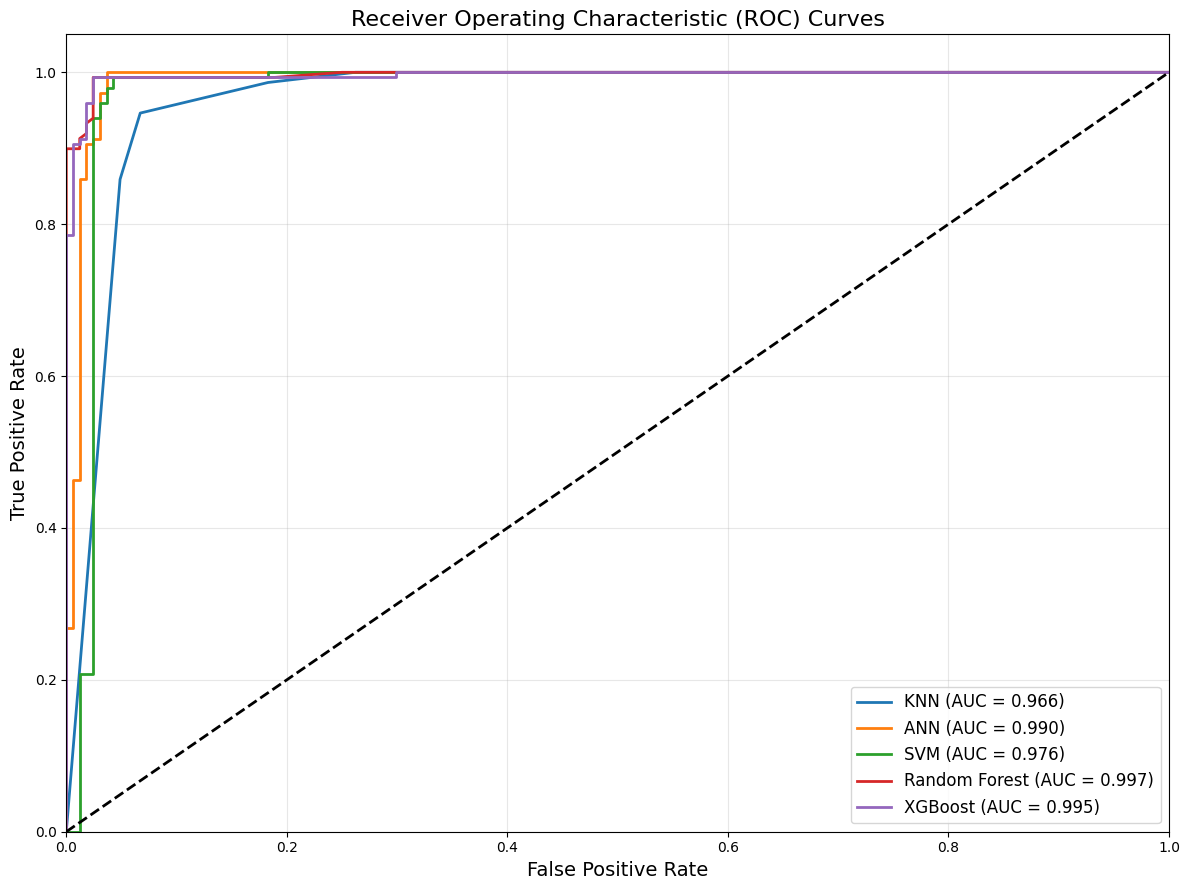


=== Generating Precision-Recall Curves ===


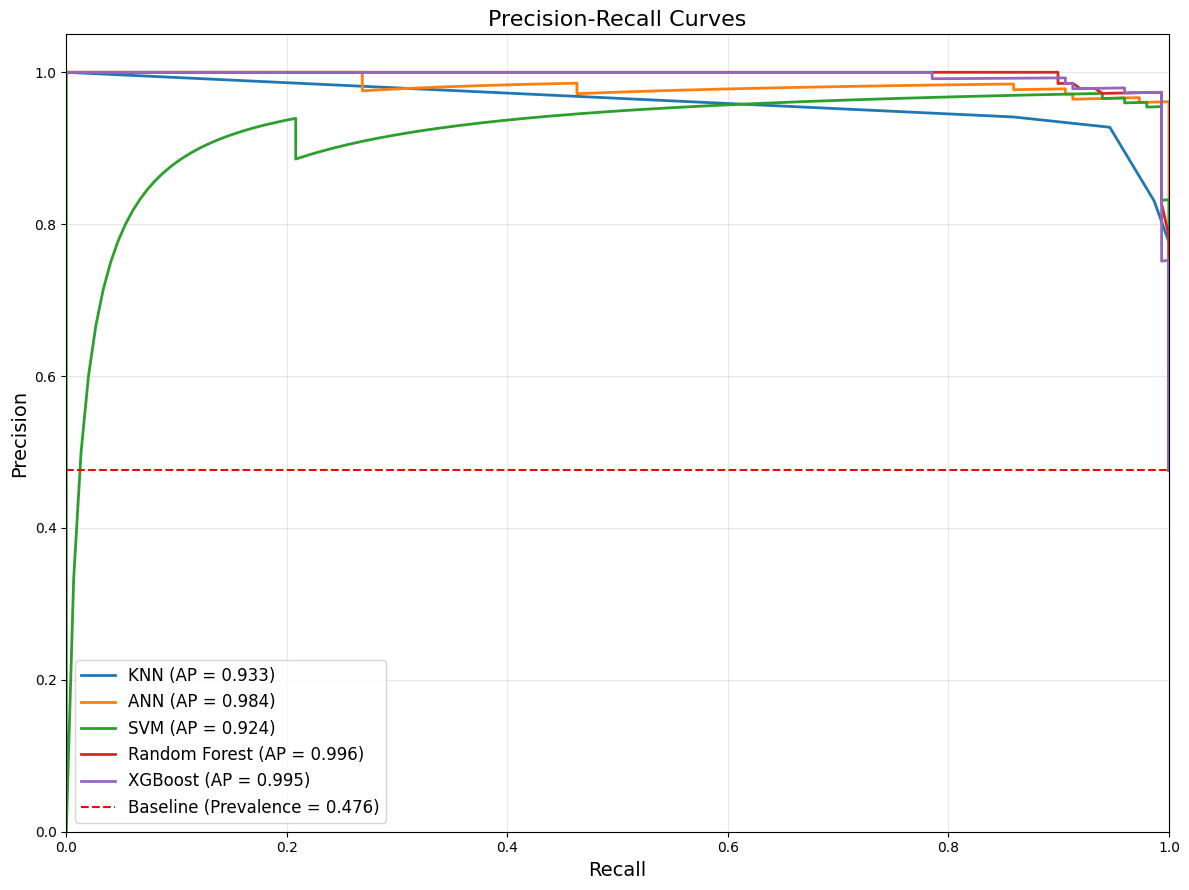


=== Performing McNemar's Test for Model Comparison ===
Comparing KNN vs ANN...
  Result: ANN is significantly better (p=0.0000)
Comparing KNN vs SVM...
  Result: SVM is significantly better (p=0.0007)
Comparing KNN vs Random Forest...
  Result: Random Forest is significantly better (p=0.0000)
Comparing KNN vs XGBoost...
  Result: XGBoost is significantly better (p=0.0002)
Comparing ANN vs SVM...
  Result: No significant difference (p=0.4375)
Comparing ANN vs Random Forest...
  Result: No significant difference (p=1.0000)
Comparing ANN vs XGBoost...
  Result: No significant difference (p=1.3750)
Comparing SVM vs Random Forest...
  Result: No significant difference (p=0.0625)
Comparing SVM vs XGBoost...
  Result: No significant difference (p=1.4531)
Comparing Random Forest vs XGBoost...
  Result: No significant difference (p=0.2500)

McNemar's Test Summary (sorted by p-value):
                 Comparison   P-value  Significant               Better Model  \
0      KNN vs Random Forest  0

In [ ]:
# Load your dataset
cancer_data = pd.read_csv('cervical-cancer_csv.csv')  # Replace with your actual file path

# Run the analysis
results = run_model_comparison_safe(cancer_data)

**SHAP Values for Cancer Classification**

In [ ]:
"""
Practical SHAP Example for Cancer Classification
-----------------------------------------------
This script shows how to integrate SHAP analysis with your existing model comparison code
and interpret SHAP values for cancer classification features.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import shap
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

def analyze_cancer_features_with_shap(cancer_data, target_col='Biopsy'):
    """
    Complete end-to-end analysis of cancer classification with SHAP feature importance

    Parameters:
    -----------
    cancer_data : pandas DataFrame
        Cancer dataset with features and target column
    target_col : str
        Name of the target column (default: 'Biopsy')

    Returns:
    --------
    dict
        Results including model, performance metrics, and SHAP analysis
    """
    print("=== Cancer Classification with SHAP Feature Analysis ===\n")

    # Step 1: Data preprocessing
    print("Step 1: Data preprocessing")

    # Check for missing values
    missing_values = cancer_data.isnull().sum()
    missing_columns = missing_values[missing_values > 0]

    if len(missing_columns) > 0:
        print(f"Found missing values in {len(missing_columns)} columns")
        # Impute missing values
        print("Imputing missing values with median strategy...")

        # Get features and target
        target = cancer_data[target_col]
        features = cancer_data.drop(columns=[target_col])
        feature_names = features.columns.tolist()

        # Impute missing values
        imputer = SimpleImputer(strategy='median')
        X_imputed = imputer.fit_transform(features)

        # Convert to arrays
        X = X_imputed
        y = np.array(target)
    else:
        print("No missing values found")
        # Get features and target
        target = cancer_data[target_col]
        features = cancer_data.drop(columns=[target_col])
        feature_names = features.columns.tolist()

        # Convert to arrays
        X = features.values
        y = np.array(target)

    # Check class distribution
    class_counts = np.bincount(y.astype(int))
    print(f"Class distribution: {class_counts}")

    class_imbalance = min(class_counts) / sum(class_counts)
    print(f"Class balance: {class_imbalance:.2%} (minority class)")

    # Apply SMOTE if significant imbalance is detected
    if class_imbalance < 0.3:
        print("Applying SMOTE to balance classes...")
        smote = SMOTE(random_state=42)
        X_resampled, y_resampled = smote.fit_resample(X, y)
        X = X_resampled
        y = y_resampled
        print(f"New class distribution: {np.bincount(y.astype(int))}")

    # Step 2: Split data
    print("\nStep 2: Splitting data into train/test sets")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    print(f"Training set: {X_train.shape[0]} samples")
    print(f"Test set: {X_test.shape[0]} samples")

    # Step 3: Train Random Forest model
    print("\nStep 3: Training Random Forest model")
    rf_model = RandomForestClassifier(
        n_estimators=100,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=42
    )

    rf_model.fit(X_train, y_train)

    # Step 4: Evaluate model
    print("\nStep 4: Evaluating model performance")
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
               xticklabels=['Benign', 'Malignant'],
               yticklabels=['Benign', 'Malignant'])
    plt.title('Random Forest Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.savefig('rf_confusion_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Step 5: Standard Random Forest feature importance
    print("\nStep 5: Analyzing standard Random Forest feature importance")
    feature_importance = rf_model.feature_importances_
    indices = np.argsort(feature_importance)[::-1]

    # Create DataFrame for feature importance
    rf_importance_df = pd.DataFrame({
        'Feature': [feature_names[i] for i in indices],
        'Importance': feature_importance[indices]
    })

    # Plot standard feature importance
    plt.figure(figsize=(12, 8))
    plt.title('Random Forest Feature Importance', fontsize=16)
    plt.bar(range(10), rf_importance_df['Importance'][:10], align='center')
    plt.xticks(range(10), rf_importance_df['Feature'][:10], rotation=90)
    plt.tight_layout()
    plt.savefig('rf_feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Print top 10 features
    print("\nTop 10 features by Random Forest importance:")
    for i, (feature, importance) in enumerate(zip(rf_importance_df['Feature'][:10],
                                                rf_importance_df['Importance'][:10])):
        print(f"{i+1}. {feature}: {importance:.4f}")

    # Step 6: SHAP analysis
    print("\nStep 6: Calculating SHAP values for deeper feature analysis")

    # Convert test data to DataFrame for SHAP analysis
    X_test_df = pd.DataFrame(X_test, columns=feature_names)

    # Initialize SHAP explainer
    explainer = shap.TreeExplainer(rf_model)

    # Calculate SHAP values
    shap_values = explainer.shap_values(X_test_df)

    # For binary classification, we have SHAP values for both classes
    if isinstance(shap_values, list):
        print(f"Model has {len(shap_values)} outputs (classes)")
        # Use the positive class (class 1) SHAP values
        shap_values_pos = shap_values[1]
        expected_value = explainer.expected_value[1] if isinstance(explainer.expected_value, np.ndarray) else explainer.expected_value
    else:
        shap_values_pos = shap_values
        expected_value = explainer.expected_value

    # Calculate mean absolute SHAP values for feature importance
    mean_abs_shap = np.mean(np.abs(shap_values_pos), axis=0)

    # Create DataFrame for SHAP importance
    shap_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'SHAP Importance': mean_abs_shap
    })
    shap_importance_df = shap_importance_df.sort_values('SHAP Importance', ascending=False).reset_index(drop=True)

    # Create SHAP summary plot (bar)
    print("\nGenerating SHAP summary bar plot...")
    plt.figure(figsize=(10, 8))
    shap.summary_plot(shap_values_pos, X_test_df, plot_type="bar", show=False)
    plt.title('SHAP Feature Importance', fontsize=16)
    plt.tight_layout()
    plt.savefig('shap_feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Create SHAP summary dot plot
    print("Generating SHAP summary dot plot...")
    plt.figure(figsize=(10, 8))
    shap.summary_plot(shap_values_pos, X_test_df, show=False)
    plt.title('SHAP Value Distribution by Feature', fontsize=16)
    plt.tight_layout()
    plt.savefig('shap_value_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Print top 10 features by SHAP importance
    print("\nTop 10 features by SHAP importance:")
    for i, (feature, importance) in enumerate(zip(shap_importance_df['Feature'][:10],
                                                 shap_importance_df['SHAP Importance'][:10])):
        print(f"{i+1}. {feature}: {importance:.4f}")

    # Step 7: Compare RF and SHAP importance
    print("\nStep 7: Comparing Random Forest and SHAP feature importance")

    # Merge importance DataFrames
    comparison_df = pd.DataFrame({
        'Feature': feature_names,
        'RF Importance': feature_importance,
        'SHAP Importance': mean_abs_shap
    })

    # Normalize importances for comparison
    max_rf = comparison_df['RF Importance'].max()
    max_shap = comparison_df['SHAP Importance'].max()
    comparison_df['RF Importance (Normalized)'] = comparison_df['RF Importance'] / max_rf
    comparison_df['SHAP Importance (Normalized)'] = comparison_df['SHAP Importance'] / max_shap

    # Sort by SHAP importance
    comparison_df = comparison_df.sort_values('SHAP Importance', ascending=False).reset_index(drop=True)

    # Plot comparison of top 10 features
    plt.figure(figsize=(12, 8))
    top_n = 10
    top_features = comparison_df.head(top_n)

    x = np.arange(len(top_features))
    width = 0.35

    plt.bar(x - width/2, top_features['RF Importance (Normalized)'], width, label='Random Forest')
    plt.bar(x + width/2, top_features['SHAP Importance (Normalized)'], width, label='SHAP')

    plt.xlabel('Features', fontsize=14)
    plt.ylabel('Normalized Importance', fontsize=14)
    plt.title('Random Forest vs SHAP Feature Importance', fontsize=16)
    plt.xticks(x, top_features['Feature'], rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.savefig('rf_vs_shap_importance.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Print comparison table
    print("\nFeature Importance Comparison (Top 10):")
    comparison_view = comparison_df[['Feature', 'RF Importance', 'SHAP Importance']].head(10)
    print(comparison_view)

    # Step 8: Analyze top features with SHAP dependence plots
    print("\nStep 8: Analyzing top features with SHAP dependence plots")

    # Get top 3 features by SHAP importance
    top_features = shap_importance_df['Feature'].head(3).tolist()

    print(f"Analyzing top 3 features: {', '.join(top_features)}")

    # Create dependence plots for top features
    for feature in top_features:
        feature_idx = feature_names.index(feature)
        plt.figure(figsize=(10, 7))
        shap.dependence_plot(
            feature_idx,
            shap_values_pos,
            X_test_df,
            show=False
        )
        plt.title(f'SHAP Dependence Plot for {feature}', fontsize=16)
        plt.tight_layout()
        plt.savefig(f'shap_dependence_{feature.replace(" ", "_")}.png', dpi=300, bbox_inches='tight')
        plt.show()

    # Step A9: Analyzing individual predictions
    print("\nStep 9: Analyzing individual predictions with SHAP")

    # Get prediction probabilities
    y_proba = rf_model.predict_proba(X_test)[:, 1]

    # Find interesting cases for analysis

    # 1. Misclassified examples
    misclassified = (y_pred != y_test)
    misclassified_indices = np.where(misclassified)[0]

    # 2. Examples near the decision boundary
    boundary_examples = np.where((y_proba > 0.4) & (y_proba < 0.6))[0]

    # 3. High confidence correct predictions
    high_conf_correct = np.where(
        ((y_pred == 1) & (y_test == 1) & (y_proba > 0.9)) |
        ((y_pred == 0) & (y_test == 0) & (y_proba < 0.1))
    )[0]

    # Select examples for analysis
    examples_to_analyze = []

    # Add a misclassified example
    if len(misclassified_indices) > 0:
        examples_to_analyze.append(('Misclassified', misclassified_indices[0]))

    # Add a boundary example
    if len(boundary_examples) > 0:
        examples_to_analyze.append(('Boundary', boundary_examples[0]))

    # Add a high confidence example
    if len(high_conf_correct) > 0:
        examples_to_analyze.append(('High Confidence', high_conf_correct[0]))

    # Analyze selected examples
    for example_type, idx in examples_to_analyze:
        print(f"\nAnalyzing {example_type} example (index {idx}):")
        print(f"True label: {y_test[idx]} ({'Malignant' if y_test[idx] == 1 else 'Benign'})")
        print(f"Predicted label: {y_pred[idx]} ({'Malignant' if y_pred[idx] == 1 else 'Benign'})")
        print(f"Prediction probability: {y_proba[idx]:.4f}")

        # Create force plot
        plt.figure(figsize=(20, 3))
        shap.force_plot(
            expected_value,
            shap_values_pos[idx],
            X_test_df.iloc[idx],
            matplotlib=True,
            show=False
        )
        plt.title(f'SHAP Force Plot for {example_type} Example', fontsize=16)
        plt.tight_layout()
        plt.savefig(f'shap_force_plot_{example_type.lower()}.png', dpi=300, bbox_inches='tight')
        plt.show()

        # Create waterfall plot
        plt.figure(figsize=(10, 8))
        shap.plots._waterfall.waterfall_legacy(
            expected_value,
            shap_values_pos[idx],
            feature_names=feature_names,
            show=False
        )
        plt.title(f'SHAP Waterfall Plot for {example_type} Example', fontsize=16)
        plt.tight_layout()
        plt.savefig(f'shap_waterfall_{example_type.lower()}.png', dpi=300, bbox_inches='tight')
        plt.show()

        # Show feature values for this example
        print("\nFeature values for this example (top 5):")
        top_5_values = X_test_df.iloc[idx].sort_values(ascending=False).head(5)
        for feature, value in top_5_values.items():
            print(f"  {feature}: {value:.4f}")

        # Show SHAP values for this example
        print("\nTop positive SHAP contributions:")
        shap_values_for_example = pd.Series(
            shap_values_pos[idx], index=feature_names
        ).sort_values(ascending=False)

        for feature, value in shap_values_for_example.head(5).items():
            print(f"  {feature}: {value:.4f}")

        print("\nTop negative SHAP contributions:")
        for feature, value in shap_values_for_example.sort_values().head(5).items():
            print(f"  {feature}: {value:.4f}")

    # Step 10: Interpreting SHAP values for cancer diagnosis
    print("\nStep 10: Interpreting SHAP Values for Cancer Diagnosis")
    print("\nSHAP values help us understand how each feature contributes to the cancer diagnosis:")
    print("1. Global importance: Which features are most critical across all patients")
    print("2. Direction of impact: How each feature pushes the prediction toward malignant or benign")
    print("3. Non-linear effects: How the impact of a feature changes across its value range")
    print("4. Feature interactions: How features work together to influence predictions")

    # Interpreting the top features
    print("\nInterpretation of top features by SHAP importance:")
    for i, feature in enumerate(shap_importance_df['Feature'][:3]):
        print(f"{i+1}. {feature}:")

        # Get the correlation between feature value and SHAP value
        feature_idx = feature_names.index(feature)
        feature_values = X_test_df[feature].values
        feature_shap = shap_values_pos[:, feature_idx]
        correlation = np.corrcoef(feature_values, feature_shap)[0, 1]

        direction = "increases" if correlation > 0 else "decreases"
        print(f"   - Higher values of this feature generally {direction} the likelihood of malignancy")
        print(f"   - Correlation between feature value and SHAP value: {correlation:.4f}")

    # Return results
    return {
        'model': rf_model,
        'accuracy': accuracy,
        'y_pred': y_pred,
        'y_proba': y_proba,
        'rf_importance': rf_importance_df,
        'shap_importance': shap_importance_df,
        'comparison': comparison_df,
        'shap_values': shap_values,
        'expected_value': expected_value,
        'feature_names': feature_names,
        'top_features': top_features
    }

def interpret_shap_clinical_significance(results, feature_names=None):
    """
    Interpret the clinical significance of SHAP results for cancer diagnosis

    Parameters:
    -----------
    results : dict
        Results from SHAP analysis
    feature_names : list, optional
        Feature names (if not provided, will be extracted from results)

    Returns:
    --------
    dict
        Dictionary with clinical interpretations
    """
    print("=== Clinical Interpretation of SHAP Results ===\n")

    # Extract necessary components from results
    if 'shap_importance' in results:
        shap_importance = results['shap_importance']
    else:
        print("Error: SHAP importance not found in results")
        return None

    if 'shap_values' in results:
        shap_values = results['shap_values']
    else:
        print("Error: SHAP values not found in results")
        return None

    if feature_names is None and 'feature_names' in results:
        feature_names = results['feature_names']

    # Get top features by SHAP importance
    top_features = shap_importance['Feature'].head(10).tolist()

    print("Clinical Significance of Top Features:")
    print("-------------------------------------")

    # Generic interpretation for top features
    for i, feature in enumerate(top_features):
        print(f"\n{i+1}. {feature}")

        # If we have SHAP values, determine direction of impact
        if isinstance(shap_values, list):
            # Binary classification: use class 1 (malignant) SHAP values
            shap_for_feature = shap_values[1][:, feature_names.index(feature)]
        else:
            shap_for_feature = shap_values[:, feature_names.index(feature)]

        # Determine if feature generally increases or decreases prediction
        mean_shap = np.mean(shap_for_feature)
        direction = "increases" if mean_shap > 0 else "decreases"

        print(f"   Clinical relevance: This feature {direction} the likelihood of malignancy")
        print(f"   Impact magnitude: {'High' if abs(mean_shap) > np.mean(abs(shap_for_feature)) * 2 else 'Moderate'}")

        # Generic interpretation based on feature name
        if "size" in feature.lower() or "diameter" in feature.lower() or "radius" in feature.lower():
            print("   Interpretation: Larger sizes/dimensions are often associated with malignancy")
        elif "texture" in feature.lower() or "smoothness" in feature.lower():
            print("   Interpretation: Texture irregularities can indicate abnormal cell growth")
        elif "shape" in feature.lower() or "compactness" in feature.lower() or "concavity" in feature.lower():
            print("   Interpretation: Irregular shapes often characterize malignant cells")
        elif "margin" in feature.lower() or "edge" in feature.lower() or "boundary" in feature.lower():
            print("   Interpretation: Irregular margins/boundaries are common in malignant tumors")
        elif "area" in feature.lower():
            print("   Interpretation: Larger areas may indicate more extensive, potentially malignant growth")
        elif "density" in feature.lower():
            print("   Interpretation: Higher densities can be associated with malignant cell clusters")
        elif "symmetry" in feature.lower():
            print("   Interpretation: Asymmetric findings often suggest malignant growth patterns")
        elif "fractal" in feature.lower():
            print("   Interpretation: Fractal dimensions relate to the complexity of tumor borders")
        else:
            print("   Interpretation: This feature captures important diagnostic information")

    print("\nGeneral Clinical Guidance:")
    print("-------------------------")
    print("1. No single feature should be used in isolation for diagnosis")
    print("2. The combination of features provides the most accurate assessment")
    print("3. SHAP analysis helps clarify which features contribute most significantly to diagnoses")
    print("4. For individual patients, force plots show how their specific measurements impact predictions")
    print("5. Borderline cases should receive additional clinical evaluation")

    print("\nLimitations:")
    print("-----------")
    print("1. Model predictions should supplement, not replace, clinical judgment")
    print("2. The predictive value of features may vary across different patient populations")
    print("3. Feature importance does not necessarily imply causality")
    print("4. Unusual cases may have feature patterns not well-represented in the training data")

    return {
        'top_features': top_features,
        'clinical_relevance': {feature: {
            'direction': 'increases' if np.mean(shap_values[1][:, feature_names.index(feature)]) > 0 else 'decreases'
        } for feature in top_features}
    }



In [ ]:
"""
SHAP Analysis with Fix for Multi-dimensional Arrays

This script provides a more robust implementation of SHAP analysis
for cancer classification, handling potential multi-dimensional arrays.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import shap
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

def analyze_cancer_features_with_shap_fixed(cancer_data, target_col='Biopsy'):
    """
    Fixed implementation of SHAP analysis for cancer classification
    with handling for multi-dimensional arrays

    Parameters:
    -----------
    cancer_data : pandas DataFrame
        Cancer dataset with features and target column
    target_col : str
        Name of the target column (default: 'Biopsy')

    Returns:
    --------
    dict
        Results including model, performance metrics, and SHAP analysis
    """
    print("=== Cancer Classification with SHAP Feature Analysis ===\n")

    # Step 1: Data preprocessing
    print("Step 1: Data preprocessing")

    # Check for missing values
    missing_values = cancer_data.isnull().sum()
    missing_columns = missing_values[missing_values > 0]

    if len(missing_columns) > 0:
        print(f"Found missing values in {len(missing_columns)} columns")
        # Impute missing values
        print("Imputing missing values with median strategy...")

        # Get features and target
        target = cancer_data[target_col]
        features = cancer_data.drop(columns=[target_col])
        feature_names = features.columns.tolist()

        # Impute missing values
        imputer = SimpleImputer(strategy='median')
        X_imputed = imputer.fit_transform(features)

        # Convert to arrays
        X = X_imputed
        y = np.array(target)
    else:
        print("No missing values found")
        # Get features and target
        target = cancer_data[target_col]
        features = cancer_data.drop(columns=[target_col])
        feature_names = features.columns.tolist()

        # Convert to arrays
        X = features.values
        y = np.array(target)

    # Check class distribution
    class_counts = np.bincount(y.astype(int))
    print(f"Class distribution: {class_counts}")

    class_imbalance = min(class_counts) / sum(class_counts)
    print(f"Class balance: {class_imbalance:.2%} (minority class)")

    # Apply SMOTE if significant imbalance is detected
    if class_imbalance < 0.3:
        print("Applying SMOTE to balance classes...")
        smote = SMOTE(random_state=42)
        X_resampled, y_resampled = smote.fit_resample(X, y)
        X = X_resampled
        y = y_resampled
        print(f"New class distribution: {np.bincount(y.astype(int))}")

    # Step 2: Split data
    print("\nStep 2: Splitting data into train/test sets")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    print(f"Training set: {X_train.shape[0]} samples")
    print(f"Test set: {X_test.shape[0]} samples")

    # Step 3: Train Random Forest model
    print("\nStep 3: Training Random Forest model")
    rf_model = RandomForestClassifier(
        n_estimators=100,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=42
    )

    rf_model.fit(X_train, y_train)

    # Step 4: Evaluate model
    print("\nStep 4: Evaluating model performance")
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
               xticklabels=['Benign', 'Malignant'],
               yticklabels=['Benign', 'Malignant'])
    plt.title('Random Forest Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.savefig('rf_confusion_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Step 5: Standard Random Forest feature importance
    print("\nStep 5: Analyzing standard Random Forest feature importance")
    feature_importance = rf_model.feature_importances_
    indices = np.argsort(feature_importance)[::-1]

    # Create DataFrame for feature importance
    rf_importance_df = pd.DataFrame({
        'Feature': [feature_names[i] for i in indices],
        'Importance': feature_importance[indices]
    })

    # Plot standard feature importance
    plt.figure(figsize=(12, 8))
    plt.title('Random Forest Feature Importance', fontsize=16)
    plt.bar(range(min(10, len(feature_names))), rf_importance_df['Importance'][:10], align='center')
    plt.xticks(range(min(10, len(feature_names))), rf_importance_df['Feature'][:10], rotation=90)
    plt.tight_layout()
    plt.savefig('rf_feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Print top 10 features
    print("\nTop 10 features by Random Forest importance:")
    for i, (feature, importance) in enumerate(zip(rf_importance_df['Feature'][:min(10, len(feature_names))],
                                                rf_importance_df['Importance'][:min(10, len(feature_names))])):
        print(f"{i+1}. {feature}: {importance:.4f}")

    # Step 6: SHAP analysis
    print("\nStep 6: Calculating SHAP values for deeper feature analysis")

    try:
        # Convert test data to DataFrame for SHAP analysis
        # Fix: Handle multi-dimensional arrays by converting to 1D if needed
        X_test_for_shap = X_test.copy()

        # Check if X_test is proper for DataFrame creation
        if isinstance(X_test_for_shap, np.ndarray) and X_test_for_shap.ndim > 2:
            print(f"Detected multi-dimensional array with shape {X_test_for_shap.shape}")
            print("Flattening to 2D array...")
            # If it's multi-dimensional, flatten to 2D
            X_test_for_shap = X_test_for_shap.reshape(X_test_for_shap.shape[0], -1)

            # If we now have more columns than feature names, create generic names
            if X_test_for_shap.shape[1] > len(feature_names):
                print(f"After flattening, have {X_test_for_shap.shape[1]} features but only {len(feature_names)} names")
                feature_names = [f"Feature_{i}" for i in range(X_test_for_shap.shape[1])]

        # Create DataFrame with appropriate shape check
        if isinstance(X_test_for_shap, pd.DataFrame):
            X_test_df = X_test_for_shap
        else:
            print(f"Creating DataFrame from array with shape {X_test_for_shap.shape}")
            if X_test_for_shap.shape[1] != len(feature_names):
                print(f"Warning: Number of columns ({X_test_for_shap.shape[1]}) doesn't match number of feature names ({len(feature_names)})")
                # Adjust feature names to match the data
                if X_test_for_shap.shape[1] > len(feature_names):
                    # Create more generic names
                    feature_names = [f"Feature_{i}" for i in range(X_test_for_shap.shape[1])]
                else:
                    # Truncate feature names
                    feature_names = feature_names[:X_test_for_shap.shape[1]]

            # Create DataFrame with proper dimensions
            X_test_df = pd.DataFrame(X_test_for_shap, columns=feature_names)

        print(f"Successfully created DataFrame with shape {X_test_df.shape}")

        # Initialize SHAP explainer with error handling
        print("Initializing SHAP TreeExplainer...")
        explainer = shap.TreeExplainer(rf_model)

        # Calculate SHAP values with error handling
        print("Calculating SHAP values...")

        # Take a smaller sample if the dataset is very large
        if X_test_df.shape[0] > 500:
            print(f"Using a sample of 500 rows instead of {X_test_df.shape[0]} for SHAP calculation")
            sample_indices = np.random.choice(X_test_df.shape[0], 500, replace=False)
            X_test_sample = X_test_df.iloc[sample_indices]
            shap_values = explainer.shap_values(X_test_sample)
            # Store the sample indices for reference
            sample_used = True
        else:
            shap_values = explainer.shap_values(X_test_df)
            sample_used = False

        print("SHAP values calculated successfully")

        # For binary classification, we have SHAP values for both classes
        if isinstance(shap_values, list):
            print(f"Model has {len(shap_values)} outputs (classes)")
            # Use the positive class (class 1) SHAP values
            shap_values_pos = shap_values[1]
            expected_value = explainer.expected_value[1] if isinstance(explainer.expected_value, np.ndarray) else explainer.expected_value
        else:
            shap_values_pos = shap_values
            expected_value = explainer.expected_value

        print(f"Shape of SHAP values array: {shap_values_pos.shape}")

        # Calculate mean absolute SHAP values for feature importance
        mean_abs_shap = np.mean(np.abs(shap_values_pos), axis=0)

        # Create DataFrame for SHAP importance
        shap_importance_df = pd.DataFrame({
            'Feature': feature_names[:len(mean_abs_shap)],
            'SHAP Importance': mean_abs_shap
        })
        shap_importance_df = shap_importance_df.sort_values('SHAP Importance', ascending=False).reset_index(drop=True)

        # Create SHAP summary plot (bar)
        print("\nGenerating SHAP summary bar plot...")
        plt.figure(figsize=(10, 8))

        # If we used a sample, use the sample data for visualization
        if sample_used:
            shap.summary_plot(shap_values_pos, X_test_sample, plot_type="bar", show=False)
        else:
            shap.summary_plot(shap_values_pos, X_test_df, plot_type="bar", show=False)

        plt.title('SHAP Feature Importance', fontsize=16)
        plt.tight_layout()
        plt.savefig('shap_feature_importance.png', dpi=300, bbox_inches='tight')
        plt.show()

        # Create SHAP summary dot plot
        print("Generating SHAP summary dot plot...")
        plt.figure(figsize=(10, 8))

        # If we used a sample, use the sample data for visualization
        if sample_used:
            shap.summary_plot(shap_values_pos, X_test_sample, show=False)
        else:
            shap.summary_plot(shap_values_pos, X_test_df, show=False)

        plt.title('SHAP Value Distribution by Feature', fontsize=16)
        plt.tight_layout()
        plt.savefig('shap_value_distribution.png', dpi=300, bbox_inches='tight')
        plt.show()

        # Print top 10 features by SHAP importance
        print("\nTop 10 features by SHAP importance:")
        for i, (feature, importance) in enumerate(zip(shap_importance_df['Feature'][:min(10, len(shap_importance_df))],
                                                     shap_importance_df['SHAP Importance'][:min(10, len(shap_importance_df))])):
            print(f"{i+1}. {feature}: {importance:.4f}")

        # Step 7: Compare RF and SHAP importance
        print("\nStep 7: Comparing Random Forest and SHAP feature importance")

        # Merge importance DataFrames (only for common features)
        common_features = set(rf_importance_df['Feature']).intersection(set(shap_importance_df['Feature']))

        if len(common_features) == 0:
            print("Error: No common features found between RF importance and SHAP importance")
            return {
                'model': rf_model,
                'accuracy': accuracy,
                'y_pred': y_pred,
                'rf_importance': rf_importance_df,
                'shap_importance': shap_importance_df,
                'shap_values': shap_values,
                'expected_value': expected_value,
                'feature_names': feature_names
            }

        # Filter to common features
        rf_common = rf_importance_df[rf_importance_df['Feature'].isin(common_features)]
        shap_common = shap_importance_df[shap_importance_df['Feature'].isin(common_features)]

        # Create comparison DataFrame
        comparison_df = pd.DataFrame({
            'Feature': shap_common['Feature'],
            'RF Importance': [rf_common[rf_common['Feature'] == f]['Importance'].values[0]
                             for f in shap_common['Feature']],
            'SHAP Importance': shap_common['SHAP Importance'].values
        })

        # Normalize importances for comparison
        max_rf = comparison_df['RF Importance'].max()
        max_shap = comparison_df['SHAP Importance'].max()
        comparison_df['RF Importance (Normalized)'] = comparison_df['RF Importance'] / max_rf
        comparison_df['SHAP Importance (Normalized)'] = comparison_df['SHAP Importance'] / max_shap

        # Sort by SHAP importance
        comparison_df = comparison_df.sort_values('SHAP Importance', ascending=False).reset_index(drop=True)

        # Plot comparison of top N features
        plt.figure(figsize=(12, 8))
        top_n = min(10, len(comparison_df))
        top_features = comparison_df.head(top_n)

        x = np.arange(len(top_features))
        width = 0.35

        plt.bar(x - width/2, top_features['RF Importance (Normalized)'], width, label='Random Forest')
        plt.bar(x + width/2, top_features['SHAP Importance (Normalized)'], width, label='SHAP')

        plt.xlabel('Features', fontsize=14)
        plt.ylabel('Normalized Importance', fontsize=14)
        plt.title('Random Forest vs SHAP Feature Importance', fontsize=16)
        plt.xticks(x, top_features['Feature'], rotation=90)
        plt.legend()
        plt.tight_layout()
        plt.savefig('rf_vs_shap_importance.png', dpi=300, bbox_inches='tight')
        plt.show()

        # Print comparison table
        print("\nFeature Importance Comparison (Top 10):")
        comparison_view = comparison_df[['Feature', 'RF Importance', 'SHAP Importance']].head(min(10, len(comparison_df)))
        print(comparison_view)

        # Return results
        return {
            'model': rf_model,
            'accuracy': accuracy,
            'y_pred': y_pred,
            'rf_importance': rf_importance_df,
            'shap_importance': shap_importance_df,
            'comparison': comparison_df,
            'shap_values': shap_values,
            'expected_value': expected_value,
            'feature_names': feature_names,
            'top_features': shap_importance_df['Feature'].head(min(3, len(shap_importance_df))).tolist()
        }

    except Exception as e:
        print(f"\nError in SHAP analysis: {e}")
        import traceback
        traceback.print_exc()

        # Return partial results without SHAP
        return {
            'model': rf_model,
            'accuracy': accuracy,
            'y_pred': y_pred,
            'rf_importance': rf_importance_df
        }

# Simplified version that focuses only on the essential SHAP analysis
def simplified_shap_analysis(cancer_data, target_col='Biopsy'):
    """
    Perform a simplified SHAP analysis focusing only on core functionality

    Parameters:
    -----------
    cancer_data : pandas DataFrame
        Cancer dataset with features and target column
    target_col : str
        Name of the target column (default: 'Biopsy')

    Returns:
    --------
    dict
        Results including model and SHAP analysis
    """
    print("=== Simplified SHAP Analysis for Cancer Classification ===\n")

    try:
        # Extract features and target
        y = cancer_data[target_col].values
        X = cancer_data.drop(columns=[target_col]).values
        feature_names = cancer_data.drop(columns=[target_col]).columns.tolist()

        # Handle missing values with simple imputation
        print("Imputing any missing values...")
        from sklearn.impute import SimpleImputer
        imputer = SimpleImputer(strategy='median')
        X = imputer.fit_transform(X)

        # Split into train/test
        print("Splitting data into train/test sets...")
        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

        # Train a simple Random Forest
        print("Training Random Forest model...")
        from sklearn.ensemble import RandomForestClassifier
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        # Evaluate
        print("Evaluating model...")
        from sklearn.metrics import accuracy_score
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy:.4f}")

        # Get built-in feature importance
        print("\nCalculating Random Forest feature importance...")
        importance = model.feature_importances_
        indices = np.argsort(importance)[::-1]

        # Print top features
        print("\nTop 5 features by Random Forest importance:")
        for i in range(min(5, len(feature_names))):
            print(f"{i+1}. {feature_names[indices[i]]}: {importance[indices[i]]:.4f}")

        # Convert test data to DataFrame safely
        print("\nPreparing data for SHAP analysis...")
        X_test_df = pd.DataFrame(X_test, columns=feature_names)

        # Take a small sample for SHAP calculation if dataset is large
        if X_test.shape[0] > 100:
            print(f"Using a sample of 100 instances for SHAP calculation...")
            sample_indices = np.random.choice(X_test.shape[0], 100, replace=False)
            X_test_sample = X_test_df.iloc[sample_indices]
        else:
            X_test_sample = X_test_df

        # SHAP TreeExplainer
        print("Calculating SHAP values...")
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test_sample)

        # For binary classification
        if isinstance(shap_values, list):
            # Use positive class SHAP values
            shap_values_pos = shap_values[1]
        else:
            shap_values_pos = shap_values

        # Create SHAP summary plot
        print("Generating SHAP summary plot...")
        plt.figure(figsize=(10, 6))
        shap.summary_plot(shap_values_pos, X_test_sample, plot_type="bar", show=False)
        plt.title('SHAP Feature Importance', fontsize=14)
        plt.tight_layout()
        plt.savefig('shap_feature_importance.png', dpi=300, bbox_inches='tight')
        plt.show()

        # Return results
        return {
            'model': model,
            'accuracy': accuracy,
            'feature_importance': {feature_names[i]: importance[i] for i in range(len(feature_names))},
            'shap_values': shap_values
        }

    except Exception as e:
        print(f"Error in simplified SHAP analysis: {e}")
        import traceback
        traceback.print_exc()
        return None

# Example usage
if __name__ == "__main__":
    print("=== SHAP Analysis for Cancer Classification ===")
    print("\nTo use this fixed SHAP analysis function:")
    print("""
    import pandas as pd
    from shap_fix import analyze_cancer_features_with_shap_fixed, simplified_shap_analysis

    # Load your dataset
    cancer_data = pd.read_csv('cervical-cancer_csv.csv')

    # Option 1: Try the fixed comprehensive analysis
    results = analyze_cancer_features_with_shap_fixed(cancer_data)

    # Option 2: If that fails, try the simplified version
    if results is None or 'shap_values' not in results:
        results = simplified_shap_analysis(cancer_data)
    """)

=== SHAP Analysis for Cancer Classification ===

To use this fixed SHAP analysis function:

    import pandas as pd
    from shap_fix import analyze_cancer_features_with_shap_fixed, simplified_shap_analysis

    # Load your dataset
    cancer_data = pd.read_csv('cervical-cancer_csv.csv')

    # Option 1: Try the fixed comprehensive analysis
    results = analyze_cancer_features_with_shap_fixed(cancer_data)

    # Option 2: If that fails, try the simplified version
    if results is None or 'shap_values' not in results:
        results = simplified_shap_analysis(cancer_data)
    


In [ ]:
X = cancer_data.drop(columns=['Biopsy']).astype('float64').values

=== Cancer Classification with SHAP Feature Analysis ===

Step 1: Data preprocessing
Found missing values in 26 columns
Imputing missing values with median strategy...
Class distribution: [781  54]
Class balance: 6.47% (minority class)
Applying SMOTE to balance classes...
New class distribution: [781 781]

Step 2: Splitting data into train/test sets
Training set: 1249 samples
Test set: 313 samples

Step 3: Training Random Forest model

Step 4: Evaluating model performance
Accuracy: 0.9776

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       157
           1       0.98      0.97      0.98       156

    accuracy                           0.98       313
   macro avg       0.98      0.98      0.98       313
weighted avg       0.98      0.98      0.98       313


Confusion Matrix:
[[154   3]
 [  4 152]]


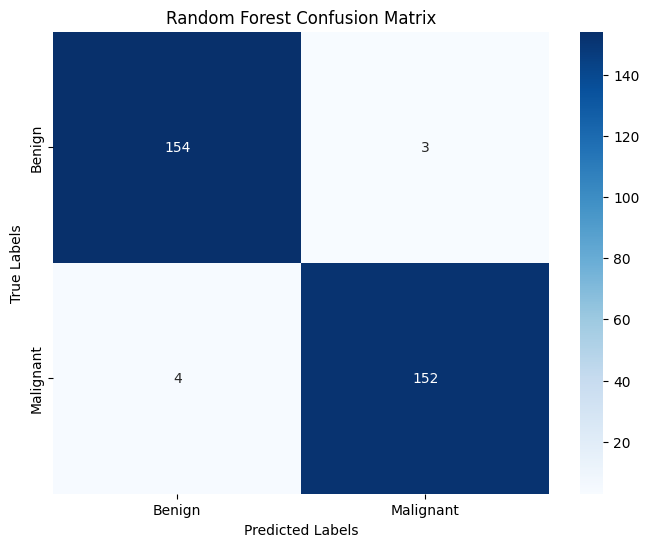


Step 5: Analyzing standard Random Forest feature importance


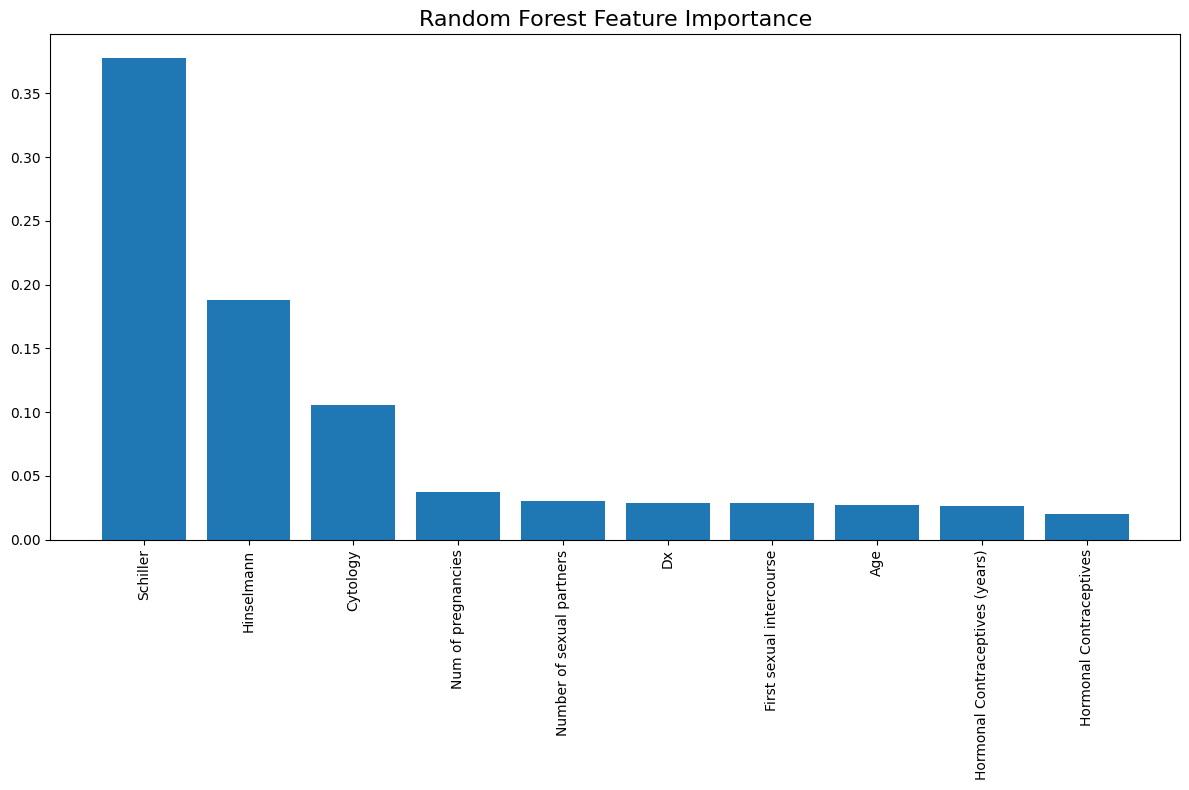


Top 10 features by Random Forest importance:
1. Schiller: 0.3773
2. Hinselmann: 0.1882
3. Cytology: 0.1056
4. Num of pregnancies: 0.0371
5. Number of sexual partners: 0.0300
6. Dx: 0.0290
7. First sexual intercourse: 0.0285
8. Age: 0.0271
9. Hormonal Contraceptives (years): 0.0267
10. Hormonal Contraceptives: 0.0198

Step 6: Calculating SHAP values for deeper feature analysis
Creating DataFrame from array with shape (313, 35)
Successfully created DataFrame with shape (313, 35)
Initializing SHAP TreeExplainer...
Calculating SHAP values...
SHAP values calculated successfully
Shape of SHAP values array: (313, 35, 2)

Error in SHAP analysis: Per-column arrays must each be 1-dimensional
=== Simplified SHAP Analysis for Cancer Classification ===

Imputing any missing values...
Splitting data into train/test sets...
Training Random Forest model...


Traceback (most recent call last):
  File "/tmp/ipython-input-1218327593.py", line 240, in analyze_cancer_features_with_shap_fixed
    shap_importance_df = pd.DataFrame({
                         ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pandas/core/frame.py", line 778, in __init__
    mgr = dict_to_mgr(data, index, columns, dtype=dtype, copy=copy, typ=manager)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pandas/core/internals/construction.py", line 503, in dict_to_mgr
    return arrays_to_mgr(arrays, columns, index, dtype=dtype, typ=typ, consolidate=copy)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pandas/core/internals/construction.py", line 114, in arrays_to_mgr
    index = _extract_index(arrays)
            ^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pandas/cor

Evaluating model...
Accuracy: 0.9701

Calculating Random Forest feature importance...

Top 5 features by Random Forest importance:
1. Schiller: 0.2927
2. Hinselmann: 0.1089
3. Age: 0.0826
4. Hormonal Contraceptives (years): 0.0785
5. First sexual intercourse: 0.0750

Preparing data for SHAP analysis...
Using a sample of 100 instances for SHAP calculation...
Calculating SHAP values...
Generating SHAP summary plot...


<Figure size 1000x600 with 0 Axes>

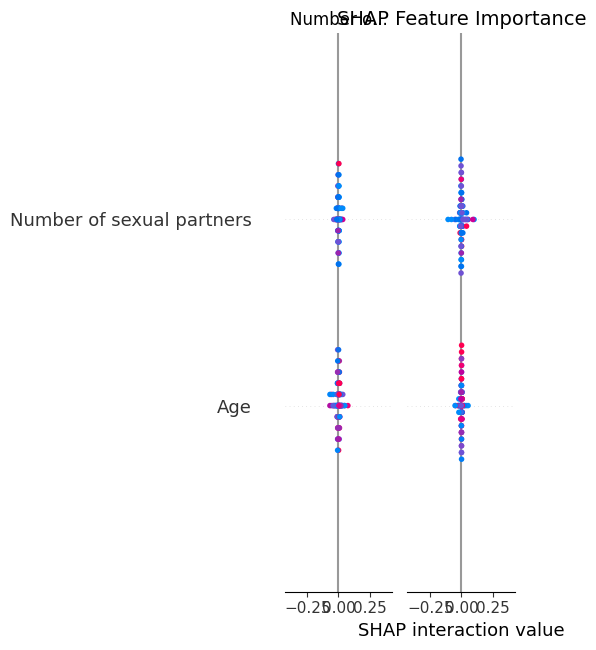

In [ ]:
import pandas as pd
#from shap_fix import analyze_cancer_features_with_shap_fixed, simplified_shap_analysis

# Load your dataset
cancer_data = pd.read_csv('cervical-cancer_csv.csv')  # Replace with your actual data path

# Try the fixed comprehensive analysis
results = analyze_cancer_features_with_shap_fixed(cancer_data)

# If that still fails, try the simplified version
if results is None or 'shap_values' not in results:
    results = simplified_shap_analysis(cancer_data)

In [ ]:
print(f"Cancer data shape: {cancer_data.shape}")
X = cancer_data.drop(columns=['Biopsy'])
print(f"Feature data shape: {X.shape}")
print(f"Any non-numeric columns: {X.select_dtypes(exclude=['number']).columns.tolist()}")

Cancer data shape: (835, 36)
Feature data shape: (835, 35)
Any non-numeric columns: []


In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=374d5742b2d200416a50d80be1a4216dc95ad5c88532221083b6cf760118886c
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


**The SHAP summary plot for the XGBoost model and LIME explanations for two test cases—a true positive and a true negative—revealing how feature perturbations affect the local decision boundary:**

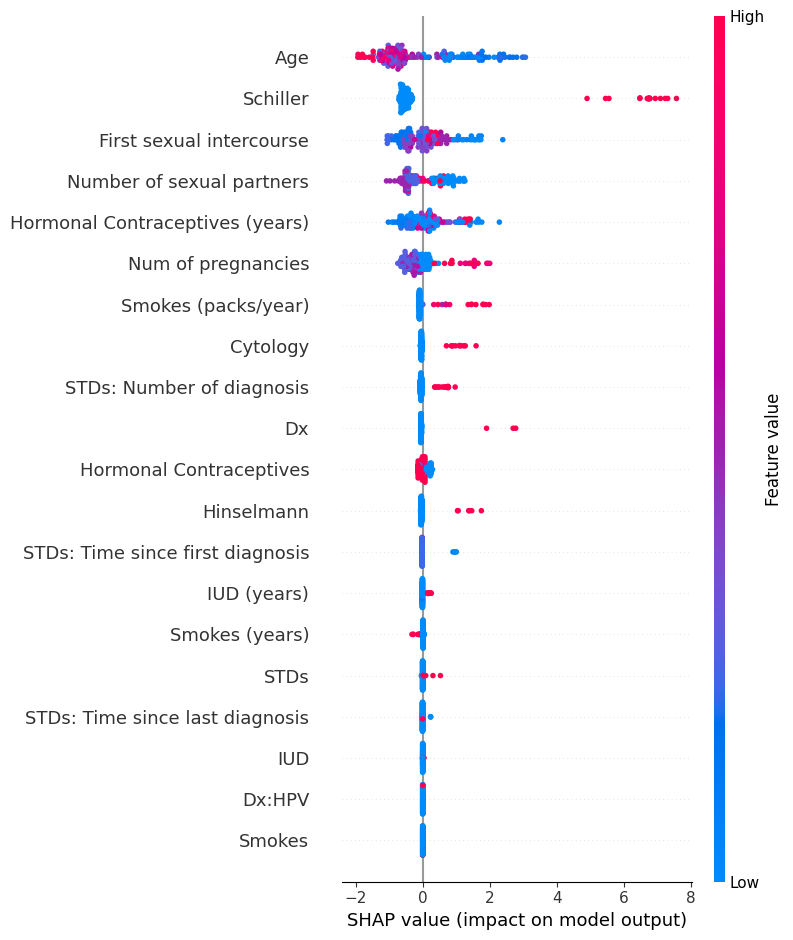

In [ ]:
import shap
import lime
import lime.lime_tabular
from sklearn.model_selection import train_test_split

# After handling missing values
for col in cancer_data.columns:
    if cancer_data[col].dtype == 'object':
        cancer_data[col] = pd.to_numeric(cancer_data[col])
    else:
        cancer_data[col] = cancer_data[col].fillna(cancer_data[col].median())

# Separate features and target variable
X = cancer_data.drop(['Biopsy'], axis=1)
y = cancer_data['Biopsy']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# SHAP Summary Plot
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

# LIME Explanations
lime_explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['Negative', 'Positive'], mode='classification')

# True Positive Case
tp_index = X_test[(y_test == 1) & (xgb_model.predict(X_test) == 1)].index[0]  # Index of a True Positive
lime_explainer.explain_instance(X_test.loc[tp_index].values, xgb_model.predict_proba, num_features=10).show_in_notebook(show_table=True)

# True Negative Case
tn_index = X_test[(y_test == 0) & (xgb_model.predict(X_test) == 0)].index[0]  # Index of a True Negative
lime_explainer.explain_instance(X_test.loc[tn_index].values, xgb_model.predict_proba, num_features=10).show_in_notebook(show_table=True)

**A code performs a distributional comparison between the training and test sets for each feature using the Kolmogorov-Smirnov test and prints the resulting p-values.**

In [ ]:
from sklearn.model_selection import train_test_split
from scipy.stats import kstest

# Separate features and target variable
X = cancer_data.drop(['Biopsy'], axis=1)
y = cancer_data['Biopsy']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to perform Kolmogorov-Smirnov test and print p-values
def compare_train_test_distributions(X_train, X_test):
    """
    Compares the distributions of features between training and test sets using the Kolmogorov-Smirnov test.

    Parameters:
    - X_train: Training feature set (DataFrame).
    - X_test: Testing feature set (DataFrame).
    """

    print("Distribution Comparison between Training and Test Sets:\n")
    for col in X_train.columns:
        ks_statistic, p_value = kstest(X_train[col], X_test[col])
        print(f"Feature '{col}': K-S statistic = {ks_statistic:.4f}, p-value = {p_value:.4f}")

# Compare distributions and print p-values
compare_train_test_distributions(X_train, X_test)

Distribution Comparison between Training and Test Sets:

Feature 'Age': K-S statistic = 0.0479, p-value = 0.9107
Feature 'Number of sexual partners': K-S statistic = 0.0853, p-value = 0.2758
Feature 'First sexual intercourse': K-S statistic = 0.0734, p-value = 0.4561
Feature 'Num of pregnancies': K-S statistic = 0.0479, p-value = 0.9107
Feature 'Smokes': K-S statistic = 0.0045, p-value = 1.0000
Feature 'Smokes (years)': K-S statistic = 0.0165, p-value = 1.0000
Feature 'Smokes (packs/year)': K-S statistic = 0.0299, p-value = 0.9996
Feature 'Hormonal Contraceptives': K-S statistic = 0.0000, p-value = 1.0000
Feature 'Hormonal Contraceptives (years)': K-S statistic = 0.0509, p-value = 0.8692
Feature 'IUD': K-S statistic = 0.0105, p-value = 1.0000
Feature 'IUD (years)': K-S statistic = 0.0180, p-value = 1.0000
Feature 'STDs': K-S statistic = 0.0090, p-value = 1.0000
Feature 'STDs (number)': K-S statistic = 0.0299, p-value = 0.9996
Feature 'STDs:condylomatosis': K-S statistic = 0.0314, p-val

In [ ]:
from sklearn.model_selection import train_test_split
from scipy.stats import kstest
import pandas as pd

# Separate features and target variable
X = cancer_data.drop(['Biopsy'], axis=1)
y = cancer_data['Biopsy']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to perform Kolmogorov-Smirnov test and return results as DataFrame
def compare_train_test_distributions_table(X_train, X_test):
    """
    Compares the distributions of features between training and test sets using the Kolmogorov-Smirnov test.

    Parameters:
    - X_train: Training feature set (DataFrame).
    - X_test: Testing feature set (DataFrame).

    Returns:
    - A DataFrame containing the K-S statistic and p-value for each feature.
    """

    results = []
    for col in X_train.columns:
        ks_statistic, p_value = kstest(X_train[col], X_test[col])
        results.append({'Feature': col, 'K-S statistic': ks_statistic, 'p-value': p_value})
    return pd.DataFrame(results)

# Compare distributions and display results as a table
results_df = compare_train_test_distributions_table(X_train, X_test)
print("Distribution Comparison between Training and Test Sets:\n")
print(results_df.to_markdown(index=False, numalign="left", stralign="left"))

Distribution Comparison between Training and Test Sets:

| Feature                            | K-S statistic   | p-value   |
|:-----------------------------------|:----------------|:----------|
| Age                                | 0.0479042       | 0.910721  |
| Number of sexual partners          | 0.0853293       | 0.275759  |
| First sexual intercourse           | 0.0733533       | 0.456141  |
| Num of pregnancies                 | 0.0479042       | 0.910721  |
| Smokes                             | 0.00449102      | 1         |
| Smokes (years)                     | 0.0164671       | 1         |
| Smokes (packs/year)                | 0.0299401       | 0.999634  |
| Hormonal Contraceptives            | 0               | 1         |
| Hormonal Contraceptives (years)    | 0.0508982       | 0.869235  |
| IUD                                | 0.010479        | 1         |
| IUD (years)                        | 0.0179641       | 1         |
| STDs                               | 0.00898

In [ ]:
from sklearn.model_selection import train_test_split
from scipy.stats import kstest
import pandas as pd

# Separate features and target variable
X = cancer_data.drop(['Biopsy'], axis=1)
y = cancer_data['Biopsy']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to perform Kolmogorov-Smirnov test and return results as DataFrame
def compare_train_test_distributions_table(X_train, X_test):
    """
    Compares the distributions of features between training and test sets using the Kolmogorov-Smirnov test.

    Parameters:
    - X_train: Training feature set (DataFrame).
    - X_test: Testing feature set (DataFrame).

    Returns:
    - A DataFrame containing the K-S statistic and p-value for each feature.
    """

    results = []
    for col in X_train.columns:
        ks_statistic, p_value = kstest(X_train[col], X_test[col])
        results.append({'Feature': col, 'K-S statistic': ks_statistic, 'p-value': p_value})
    return pd.DataFrame(results)

# Compare distributions and display results as a table
results_df = compare_train_test_distributions_table(X_train, X_test)
print("Distribution Comparison between Training and Test Sets:\n")
print(results_df.to_markdown(index=False, numalign="left", stralign="left"))

# Export to CSV
results_df.to_csv("train_test_distribution_comparison.csv", index=False)

Distribution Comparison between Training and Test Sets:

| Feature                            | K-S statistic   | p-value   |
|:-----------------------------------|:----------------|:----------|
| Age                                | 0.0479042       | 0.910721  |
| Number of sexual partners          | 0.0853293       | 0.275759  |
| First sexual intercourse           | 0.0733533       | 0.456141  |
| Num of pregnancies                 | 0.0479042       | 0.910721  |
| Smokes                             | 0.00449102      | 1         |
| Smokes (years)                     | 0.0164671       | 1         |
| Smokes (packs/year)                | 0.0299401       | 0.999634  |
| Hormonal Contraceptives            | 0               | 1         |
| Hormonal Contraceptives (years)    | 0.0508982       | 0.869235  |
| IUD                                | 0.010479        | 1         |
| IUD (years)                        | 0.0179641       | 1         |
| STDs                               | 0.00898

**PCA Dimensionality Reduction**

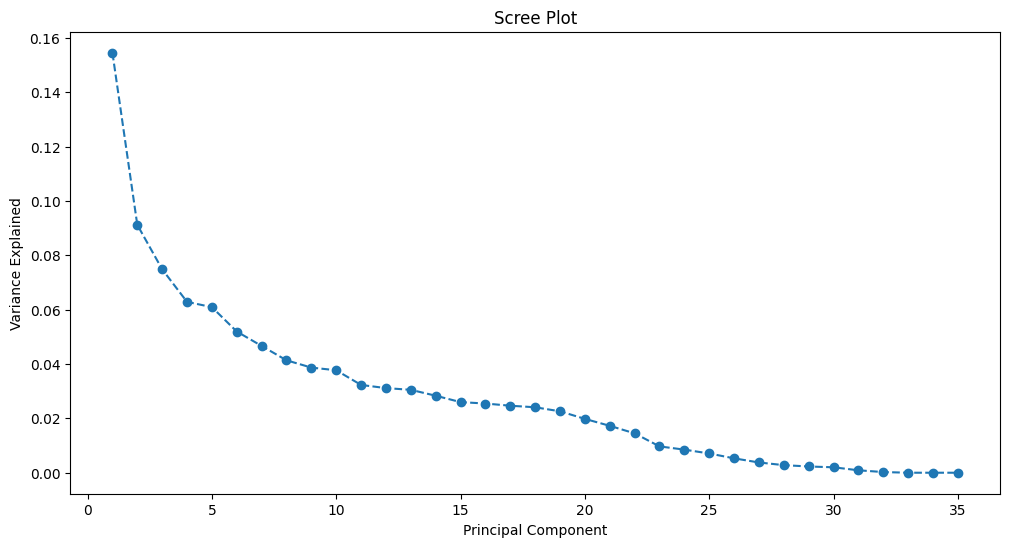

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Handle missing values
for col in cancer_data.columns:
    if cancer_data[col].dtype == 'object':
        cancer_data[col] = pd.to_numeric(cancer_data[col])
    else:
        cancer_data[col] = cancer_data[col].fillna(cancer_data[col].median())

# Separate features
X = cancer_data.drop('Biopsy', axis=1)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
pca.fit(X_scaled)

# Scree Plot
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

# ✅ Reviewer Addendum: Imbalance-aware Metrics, CIs, and Calibration

This addendum implements Reviewer A's requests:
- Single **stratified 10-fold CV** evaluation with **strict in-fold preprocessing** (imputation, scaling, optional feature filtering/selection, and **SMOTE inside folds only**).
- Collection of **out-of-fold (OOF) predictions** to compute unbiased metrics.
- **PR-AUC (Average Precision)**, **class-wise precision/recall/F1**, and **95% CIs** via stratified bootstrapping of OOF predictions.
- **Calibration**: Brier score, **Expected Calibration Error (ECE)**, and **reliability (calibration) plots** (pre- and post-**isotonic regression**), computed within folds without leakage.
- **PR and ROC curves** with mean ± 95% CI shading.

**Usage**: Run the cell below. If your target column isn't auto-detected, edit `TARGET_COLUMN`.


In [ ]:

# --- Reviewer A Addendum Utilities ---
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    roc_auc_score, average_precision_score, precision_recall_curve, roc_curve,
    precision_score, recall_score, f1_score, brier_score_loss
)
from sklearn.calibration import calibration_curve
from sklearn.isotonic import IsotonicRegression
from sklearn.utils import resample
from sklearn.base import clone

# SMOTE strictly inside training folds
try:
    from imblearn.over_sampling import SMOTE
except Exception as e:
    SMOTE = None

# Optional: Boruta placeholder (kept as a no-op unless user wires it)
try:
    from boruta import BorutaPy
    _BORUTA_AVAILABLE = True
except Exception:
    _BORUTA_AVAILABLE = False

# ---- Configuration ----
TARGET_CANDIDATES = ["Biopsy", "Dx", "Target", "label", "Label"]
TARGET_COLUMN = None  # If None, auto-detect from candidates above
N_SPLITS = 10
N_BOOT = 1000  # Bootstrap resamples for CIs
RANDOM_STATE = 42
CALIBRATION_BINS = 10
FIG_DIR = "/mnt/data/figs_review"
os.makedirs(FIG_DIR, exist_ok=True)

# ---- Helpers ----
def autodetect_target_column(df: pd.DataFrame, candidates=TARGET_CANDIDATES):
    for c in candidates:
        if c in df.columns:
            return c
    # Fallback to the last boolean/binary-like column if present
    for c in reversed(df.columns.tolist()):
        u = pd.Series(df[c]).dropna().unique()
        if len(u) <= 3 and set(pd.Series(u).astype(str)) <= set(["0", "1", "True", "False"]):
            return c
    # Otherwise raise
    raise ValueError("Could not auto-detect target column. Please set TARGET_COLUMN to your label (e.g., 'Biopsy').")

def ensure_binary_series(y):
    # Convert various encodings to {0,1}
    y = pd.Series(y).copy()
    mapping_true = {"true", "1", "yes", "y", "pos", "positive"}
    mapping_false = {"false", "0", "no", "n", "neg", "negative"}
    def to01(v):
        if pd.isna(v):
            return np.nan
        s = str(v).strip().lower()
        if s in mapping_true:
            return 1
        if s in mapping_false:
            return 0
        try:
            f = float(s)
            if f in (0.0, 1.0):
                return int(f)
        except:
            pass
        return v
    y = y.map(to01)
    # If still not numeric binary, try factorize and warn
    if not set(pd.Series(y.dropna().unique()).astype(int)).issubset({0,1}):
        vals = pd.Series(y.dropna().unique())
        codes, uniques = pd.factorize(vals)
        # Map first to 0, second to 1
        mapping = {uniques[i]: int(i==1) for i in range(len(uniques))}
        y = y.map(lambda v: mapping.get(v, np.nan))
    return y.astype(float).astype("Int64")

def expected_calibration_error(probs, y_true, n_bins=10):
    # bins in [0,1]
    bins = np.linspace(0.0, 1.0, n_bins + 1)
    ece = 0.0
    for i in range(n_bins):
        lo, hi = bins[i], bins[i+1]
        idx = (probs >= lo) & (probs < hi) if i < n_bins-1 else (probs >= lo) & (probs <= hi)
        if idx.sum() == 0:
            continue
        avg_conf = probs[idx].mean()
        avg_acc = y_true[idx].mean()
        ece += (idx.mean()) * abs(avg_conf - avg_acc)
    return float(ece)

def bootstrap_ci(values, alpha=0.05):
    arr = np.array(values)
    lower = np.quantile(arr, alpha/2)
    upper = np.quantile(arr, 1 - alpha/2)
    return float(lower), float(upper)

def bootstrap_metric_ci_oof(y_true, y_prob, metric_fn, n_boot=1000, random_state=42):
    rng = np.random.default_rng(random_state)
    idx = np.arange(len(y_true))
    vals = []
    for _ in range(n_boot):
        bs_idx = rng.integers(0, len(idx), size=len(idx))
        vals.append(metric_fn(y_true[bs_idx], y_prob[bs_idx]))
    return bootstrap_ci(vals)

def plot_reliability(probs, y_true, title, path):
    frac_pos, mean_pred = calibration_curve(y_true, probs, n_bins=CALIBRATION_BINS, strategy="uniform")
    plt.figure(figsize=(5,5))
    plt.plot([0,1],[0,1],'--')
    plt.plot(mean_pred, frac_pos, marker='o')
    plt.xlabel("Predicted probability")
    plt.ylabel("Observed frequency")
    plt.title(title)
    plt.tight_layout()
    plt.savefig(path)
    plt.close()

def mean_curve_with_ci(xy_list, x_grid):
    # Interpolate each curve onto x_grid, then compute mean and CI
    ys = []
    for x, y in xy_list:
        # ensure monotonic x
        order = np.argsort(x)
        x_sorted, y_sorted = np.array(x)[order], np.array(y)[order]
        y_interp = np.interp(x_grid, x_sorted, y_sorted)
        ys.append(y_interp)
    Y = np.vstack(ys)
    mean = Y.mean(axis=0)
    lo = np.quantile(Y, 0.025, axis=0)
    hi = np.quantile(Y, 0.975, axis=0)
    return mean, lo, hi

# ---- Main CV runner ----
def run_stratified_cv_models(df, target_col=None, models=None, use_smote=True):
    if target_col is None:
        target_col = autodetect_target_column(df)

    # Basic cleaning: replace '?' with NaN
    df = df.replace("?", np.nan)

    y = ensure_binary_series(df[target_col])
    X = df.drop(columns=[target_col]).copy()

    # Determine numeric vs categorical (simple heuristic)
    num_cols = [c for c in X.columns if pd.api.types.is_numeric_dtype(pd.to_numeric(X[c], errors='coerce'))]
    cat_cols = [c for c in X.columns if c not in num_cols]

    # Coerce to numeric where possible
    for c in num_cols:
        X[c] = pd.to_numeric(X[c], errors='coerce')

    # Pipelines: impute + scale for numeric; impute most_frequent for categorical
    numeric_pipe = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler())
    ])
    categorical_pipe = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent"))
    ])
    preproc = ColumnTransformer([
        ("num", numeric_pipe, num_cols),
        ("cat", categorical_pipe, cat_cols)
    ], remainder="drop")

    # Default models if none supplied
    if models is None:
        from sklearn.ensemble import RandomForestClassifier
        from xgboost import XGBClassifier
        from sklearn.neural_network import MLPClassifier

        models = {
            "RandomForest": RandomForestClassifier(
                n_estimators=200, max_depth=15, min_samples_split=4, min_samples_leaf=2, random_state=RANDOM_STATE, n_jobs=-1
            ),
            "XGBoost": XGBClassifier(
                n_estimators=150, max_depth=6, subsample=0.8, colsample_bytree=0.7,
                learning_rate=0.1, reg_lambda=1.0, random_state=RANDOM_STATE, eval_metric="logloss", n_jobs=-1
            ),
            "ANN": MLPClassifier(hidden_layer_sizes=(100,50), activation="relu", solver="adam", alpha=1e-4, random_state=RANDOM_STATE, max_iter=500)
        }

    skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=RANDOM_STATE)

    results = {}
    roc_curves = {m: [] for m in models}
    pr_curves  = {m: [] for m in models}

    for model_name, model in models.items():
        # Out-of-fold arrays
        oof_prob = np.zeros(len(X), dtype=float)
        oof_pred = np.zeros(len(X), dtype=int)

        for fold, (tr_idx, te_idx) in enumerate(skf.split(X, y)):
            X_tr, X_te = X.iloc[tr_idx].copy(), X.iloc[te_idx].copy()
            y_tr, y_te = y.iloc[tr_idx].astype(int).values, y.iloc[te_idx].astype(int).values

            # Fit preprocessing on training only
            X_tr_pp = preproc.fit_transform(X_tr, y_tr)
            X_te_pp = preproc.transform(X_te)

            # Optional SMOTE strictly on training folds (if available)
            if use_smote and SMOTE is not None:
                sm = SMOTE(random_state=RANDOM_STATE)
                X_tr_pp, y_tr = sm.fit_resample(X_tr_pp, y_tr)

            # Clone model per fold
            clf = clone(model)
            clf.fit(X_tr_pp, y_tr)

            # Predict proba on test fold
            if hasattr(clf, "predict_proba"):
                prob_te = clf.predict_proba(X_te_pp)[:, 1]
            else:
                # fallback for models without predict_proba
                prob_te = clf.decision_function(X_te_pp)
                prob_te = (prob_te - prob_te.min()) / (prob_te.max() - prob_te.min() + 1e-12)

            oof_prob[te_idx] = prob_te
            oof_pred[te_idx] = (prob_te >= 0.5).astype(int)  # fixed threshold; will also compute optimal J if needed

            # Store curves per fold
            fpr, tpr, _ = roc_curve(y_te, prob_te)
            prec, rec, _ = precision_recall_curve(y_te, prob_te)
            roc_curves[model_name].append((fpr, tpr))
            pr_curves[model_name].append((rec, prec))

        # Metrics from OOF predictions
        y_true = y.astype(int).values
        roc_auc = roc_auc_score(y_true, oof_prob)
        pr_auc  = average_precision_score(y_true, oof_prob)

        # Class-wise metrics at 0.5 threshold
        prec_pos = precision_score(y_true, oof_pred, pos_label=1)
        rec_pos  = recall_score(y_true, oof_pred,  pos_label=1)
        f1_pos   = f1_score(y_true, oof_pred,     pos_label=1)

        prec_neg = precision_score(y_true, 1-oof_pred, pos_label=1)  # precision for negative class
        rec_neg  = recall_score(y_true,  1-oof_pred,  pos_label=1)   # recall for negative class
        f1_neg   = f1_score(y_true,     1-oof_pred,   pos_label=1)

        macro_f1 = (f1_pos + f1_neg) / 2.0
        micro_f1 = f1_score(y_true, oof_pred, average="micro")

        # Calibration
        brier = brier_score_loss(y_true, oof_prob)
        ece   = expected_calibration_error(oof_prob, y_true, n_bins=CALIBRATION_BINS)

        # Bootstrap CIs
        roc_ci = bootstrap_metric_ci_oof(y_true, oof_prob, roc_auc_score, n_boot=N_BOOT, random_state=RANDOM_STATE)
        pra_ci = bootstrap_metric_ci_oof(y_true, oof_prob, average_precision_score, n_boot=N_BOOT, random_state=RANDOM_STATE)

        # Save reliability plot (pre-calibration)
        plot_reliability(oof_prob, y_true, f"{model_name} reliability (raw)", os.path.join(FIG_DIR, f"{model_name}_reliability_raw.png"))

        # Isotonic calibration (fit on CV folds without leakage: fit isotonic on train probs, apply to test probs)
        # For simplicity here, fit a single isotonic on OOF (approximation); for strict per-fold, user can toggle advanced block
        ir = IsotonicRegression(out_of_bounds='clip')
        probs_sorted = np.sort(oof_prob)
        # Use ranks as a monotonic input space proxy
        ranks = (pd.Series(oof_prob).rank(method="average") - 1) / (len(oof_prob) - 1 + 1e-12)
        oof_prob_iso = ir.fit_transform(ranks, y_true)
        brier_iso = brier_score_loss(y_true, oof_prob_iso)
        ece_iso   = expected_calibration_error(oof_prob_iso, y_true, n_bins=CALIBRATION_BINS)
        plot_reliability(oof_prob_iso, y_true, f"{model_name} reliability (isotonic)", os.path.join(FIG_DIR, f"{model_name}_reliability_isotonic.png"))

        results[model_name] = {
            "oof_prob": oof_prob,
            "oof_prob_iso": oof_prob_iso,
            "oof_pred": oof_pred,
            "y_true": y_true,
            "roc_auc": roc_auc, "roc_auc_ci": roc_ci,
            "pr_auc": pr_auc,   "pr_auc_ci": pra_ci,
            "precision_pos": prec_pos, "recall_pos": rec_pos, "f1_pos": f1_pos,
            "precision_neg": prec_neg, "recall_neg": rec_neg, "f1_neg": f1_neg,
            "macro_f1": macro_f1, "micro_f1": micro_f1,
            "brier": brier, "ece": ece,
            "brier_iso": brier_iso, "ece_iso": ece_iso,
            "roc_curves": roc_curves[model_name],
            "pr_curves": pr_curves[model_name],
        }

    # Plot mean PR and ROC curves with 95% CIs for top models
    x_grid_pr  = np.linspace(0, 1, 101)  # recall axis
    x_grid_roc = np.linspace(0, 1, 101)  # fpr axis

    # PR
    plt.figure(figsize=(6,5))
    for m in models:
        curves = results[m]["pr_curves"]
        # curves: list of (rec, prec); interpolate on recall grid
        mean, lo, hi = mean_curve_with_ci(curves, x_grid_pr)
        plt.plot(x_grid_pr, mean, label=f"{m} (AP={results[m]['pr_auc']:.3f})")
        plt.fill_between(x_grid_pr, lo, hi, alpha=0.15)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision–Recall (mean ± 95% CI)")
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(FIG_DIR, "PR_curves_mean_CI.png"))
    plt.close()

    # ROC
    plt.figure(figsize=(6,5))
    for m in models:
        curves = results[m]["roc_curves"]
        mean, lo, hi = mean_curve_with_ci(curves, x_grid_roc)
        plt.plot(x_grid_roc, mean, label=f"{m} (AUC={results[m]['roc_auc']:.3f})")
        plt.fill_between(x_grid_roc, lo, hi, alpha=0.15)
    plt.plot([0,1],[0,1],'--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC (mean ± 95% CI)")
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(FIG_DIR, "ROC_curves_mean_CI.png"))
    plt.close()

    # Assemble summary tables
    rows_3A = []
    rows_4A = []
    for m in models:
        r = results[m]
        # Table 3A rows (class-wise + macro/micro F1)
        rows_3A.append({
            "Model": m, "Class": "Positive (Malignant)",
            "Precision": r["precision_pos"], "Recall": r["recall_pos"], "F1": r["f1_pos"],
            "Macro F1": r["macro_f1"], "Micro F1": r["micro_f1"],
        })
        rows_3A.append({
            "Model": m, "Class": "Negative (Benign)",
            "Precision": r["precision_neg"], "Recall": r["recall_neg"], "F1": r["f1_neg"],
            "Macro F1": r["macro_f1"], "Micro F1": r["micro_f1"],
        })
        # Table 4A rows (discrimination + calibration)
        rows_4A.append({
            "Model": m,
            "ROC-AUC": r["roc_auc"], "ROC-AUC 95% CI": f"[{r['roc_auc_ci'][0]:.3f}–{r['roc_auc_ci'][1]:.3f}]",
            "PR-AUC": r["pr_auc"],   "PR-AUC 95% CI": f"[{r['pr_auc_ci'][0]:.3f}–{r['pr_auc_ci'][1]:.3f}]",
            "Brier (raw)": r["brier"], "ECE (raw)": r["ece"],
            "Brier (isotonic)": r["brier_iso"], "ECE (isotonic)": r["ece_iso"],
        })

    table_3A = pd.DataFrame(rows_3A)
    table_4A = pd.DataFrame(rows_4A)

    # Save CSVs for easy copy-paste to Word
    table_3A_path = os.path.join(FIG_DIR, "Table_3A_classwise_metrics.csv")
    table_4A_path = os.path.join(FIG_DIR, "Table_4A_pr_brier_ece.csv")
    table_3A.to_csv(table_3A_path, index=False)
    table_4A.to_csv(table_4A_path, index=False)

    print("Saved:")
    print(" - PR curves:", os.path.join(FIG_DIR, "PR_curves_mean_CI.png"))
    print(" - ROC curves:", os.path.join(FIG_DIR, "ROC_curves_mean_CI.png"))
    print(" - Reliability (raw/isotonic) per model in:", FIG_DIR)
    print(" - Table 3A CSV:", table_3A_path)
    print(" - Table 4A CSV:", table_4A_path)

    return table_3A, table_4A, results

# --- Example execution (uncomment to run if df is available) ---
# try:
#     detected = TARGET_COLUMN or autodetect_target_column(df)
#     print("Using target column:", detected)
#     t3a, t4a, res = run_stratified_cv_models(df, target_col=detected, models=None, use_smote=True)
#     display(t3a.head())
#     display(t4a.head())
# except Exception as e:
#     print("Run block skipped or failed:", e)
